In [8]:
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.day_to_day import driver_opt_out, S_driver_opt_out, traveller_opt_out, S_traveller_opt_out
from MaaSSim.day_to_day import traveller_opt_out
from MaaSSim.day_to_day import d2d_kpi_veh
from MaaSSim.day_to_day import d2d_kpi_pax

In [11]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [12]:
# the setting for TRB results do not delete
params = MaaSSim.utils.get_config('glance.json')
params.city = "Amsterdam, Netherlands"
params.paths.G = "../../data/graphs/Amsterdam.graphml"
params.paths.skim = "../../data/graphs/Amsterdam.csv"
params.vehicle_fixed_positions = True
params.times.patience = 600 #second
params.dist_threshold = 20000 #meter
params.dist_threshold_min = 2000 #meter

params.d2d.probabilistic = True
params.d2d.heterogeneous = False
params.d2d.ini_att = 0.01 #0.5
params.d2d.B_income = 1
params.d2d.fuel_cost = 0.25 #euro/km

params.d2d.B_inveh_time = 1
params.d2d.B_exp_time = 2 #1.5 in oded's paper
params.PT_fare = 1 ## euro
params.PT_avg_speed = 6

params.nPM = 1 # number of platforms. platform id starts from 1
params.platforms.base_fare = 1.4 #euro
params.platforms.fare = float(1.20) #euro/km
params.platforms.min_fare = float(2) # euro
params.platforms.comm_rate = float(0.10)
params.platforms.discount = float(0.0) # float(0.0)
params.platforms.daily_marketing = False

params.d2d.learning_d = 1 #for TRB 
params.d2d.B_Experience = 0.80
params.d2d.B_WOM = 0.2
params.d2d.B_Marketing = 0.0
params.d2d.diffusion_speed = 10/100 # speed for M is twice greater than WOM.
params.d2d.m = 5 #for TRB
params.d2d.Eini_att = 0.01
params.d2d.adj_s = 2
params.VoT = 10.63 # value of time per hour
params.seed = 1
params.assert_me = False
params.paths.requests = 'Amsterdam_requests.csv'

params.nP = 2000
params.nV = 200
params.nD = 800
params.simTime = 4
params.d2d.res_wage = params.simTime*10.63 #euro

In [13]:
# sim = MaaSSim.simulators.simulate(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
#                                   kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

sim_rln = MaaSSim.simulators.simulate_RLn(params=params, f_driver_out=S_driver_opt_out,f_trav_out=S_traveller_opt_out,
                                  kpi_veh=d2d_kpi_veh,kpi_pax=d2d_kpi_pax, logger_level=logging.WARNING)

This simulation uses albatros data


[2023-03-27 10:01:10,131] Setting up 4h simulation at 2023-03-27 08:00:56 for 200 vehicles and 2000 passengers in Amsterdam, Netherlands


initialization-----------------------
state_size =  2   action_size =  3   Lever = Commission   step =  0.05
fare =  1.2   comm_rate =  0.1   disc =  0.0   marketing = 0-100
-------------------------------------
Day =  0
comm_rate =  0.1


[2023-03-27 10:01:17,220] simulation time 3.5 s


nP =  0    nV =  0
reward: 0.0
mean reward so far: nan
Day =  1
comm_rate =  0.1


[2023-03-27 10:01:26,330] simulation time 3.9 s


nP =  9    nV =  2
reward: 0.006259790909090909
mean reward so far: 0.0
Day =  2
comm_rate =  0.15


[2023-03-27 10:01:36,299] simulation time 4.6 s


nP =  37    nV =  6
reward: 0.025946970454545457
mean reward so far: 3.6013200000000003
Day =  3
comm_rate =  0.2


[2023-03-27 10:01:46,445] simulation time 5.0 s


nP =  51    nV =  6
reward: 0.03595720909090909
mean reward so far: 16.7285
Day =  4
comm_rate =  0.25


[2023-03-27 10:01:57,220] simulation time 5.4 s


nP =  80    nV =  4
reward: 0.056130856060606055
mean reward so far: 30.750315000000004
Day =  5
comm_rate =  0.25


[2023-03-27 10:02:08,397] simulation time 6.0 s


nP =  88    nV =  10
reward: 0.06906541666666667
mean reward so far: 53.361812
Day =  6
comm_rate =  0.2


[2023-03-27 10:02:19,562] simulation time 5.8 s


nP =  109    nV =  5
reward: 0.06234259696969696
mean reward so far: 70.15501
Day =  7
comm_rate =  0.25


[2023-03-27 10:02:31,420] simulation time 6.3 s


nP =  100    nV =  10
reward: 0.0814554621212121
mean reward so far: 80.87173428571428
Day =  8
comm_rate =  0.2


[2023-03-27 10:02:43,443] simulation time 6.8 s


nP =  125    nV =  10
reward: 0.08133341212121212
mean reward so far: 95.0203425
Day =  9
comm_rate =  0.25


[2023-03-27 10:02:56,353] simulation time 7.4 s


nP =  144    nV =  15
reward: 0.11314784090909089
mean reward so far: 104.40224222222223
Day =  10
comm_rate =  0.25


[2023-03-27 10:03:08,702] simulation time 7.1 s


nP =  136    nV =  11
reward: 0.10600039393939395
mean reward so far: 120.002918
Day =  11
comm_rate =  0.3


[2023-03-27 10:03:21,684] simulation time 7.5 s


nP =  153    nV =  11
reward: 0.1282356136363636
mean reward so far: 132.78512545454544
Day =  12
comm_rate =  0.35


[2023-03-27 10:03:34,402] simulation time 7.1 s


nP =  132    nV =  14
reward: 0.12920713636363634
mean reward so far: 149.6237483333333
Day =  13
comm_rate =  0.3


[2023-03-27 10:03:47,526] simulation time 7.8 s


nP =  161    nV =  15
reward: 0.1401882318181818
mean reward so far: 163.76201384615385
Day =  14
comm_rate =  0.3


[2023-03-27 10:04:00,118] simulation time 7.1 s


nP =  131    nV =  16
reward: 0.12449659545454544
mean reward so far: 177.2627814285714
Day =  15
comm_rate =  0.35


[2023-03-27 10:04:13,248] simulation time 7.7 s


nP =  157    nV =  14
reward: 0.14603364015151515
mean reward so far: 185.77240666666663
Day =  16
comm_rate =  0.3


[2023-03-27 10:04:27,083] simulation time 8.5 s


nP =  182    nV =  24
reward: 0.1691896681818182
mean reward so far: 198.08277499999997
Day =  17
comm_rate =  0.25


[2023-03-27 10:04:40,767] simulation time 8.1 s


nP =  172    nV =  15
reward: 0.13260582575757573
mean reward so far: 209.92233647058822
Day =  18
comm_rate =  0.3


[2023-03-27 10:04:53,810] simulation time 7.5 s


nP =  143    nV =  17
reward: 0.13285091363636362
mean reward so far: 215.9240622222222
Day =  19
comm_rate =  0.35


[2023-03-27 10:05:07,076] simulation time 8.0 s


nP =  165    nV =  16
reward: 0.15786943636363637
mean reward so far: 221.61064631578944
Day =  20
comm_rate =  0.3


[2023-03-27 10:05:20,391] simulation time 7.8 s


nP =  158    nV =  16
reward: 0.14524178636363635
mean reward so far: 231.10692199999994
Day =  21
comm_rate =  0.35


[2023-03-27 10:05:34,032] simulation time 8.1 s


nP =  177    nV =  13
reward: 0.16758202727272725
mean reward so far: 237.61953904761899
Day =  22
comm_rate =  0.4


[2023-03-27 10:05:47,012] simulation time 7.7 s


nP =  152    nV =  13
reward: 0.16553236969696972
mean reward so far: 247.65271272727267
Day =  23
comm_rate =  0.35


[2023-03-27 10:06:00,631] simulation time 8.1 s


nP =  157    nV =  22
reward: 0.1658789856060606
mean reward so far: 257.09225043478256
Day =  24
comm_rate =  0.35


[2023-03-27 10:06:13,629] simulation time 7.5 s


nP =  144    nV =  19
reward: 0.14805389545454545
mean reward so far: 263.5603425
Day =  25
comm_rate =  0.3


[2023-03-27 10:06:27,140] simulation time 8.0 s


nP =  164    nV =  19
reward: 0.14893773181818182
mean reward so far: 267.7949736
Day =  26
comm_rate =  0.35


[2023-03-27 10:06:40,047] simulation time 7.6 s


nP =  147    nV =  15
reward: 0.1484905818181818
mean reward so far: 271.3969038461538
Day =  27
comm_rate =  0.3


[2023-03-27 10:06:53,639] simulation time 8.1 s


nP =  166    nV =  17
reward: 0.14858584999999996
mean reward so far: 275.8638511111111
Day =  28
comm_rate =  0.3


[2023-03-27 10:07:06,921] simulation time 8.0 s


nP =  175    nV =  12
reward: 0.14225887727272726
mean reward so far: 279.23660357142853
Day =  29
comm_rate =  0.25


[2023-03-27 10:07:20,711] simulation time 8.2 s


nP =  175    nV =  17
reward: 0.1380376212121212
mean reward so far: 282.3537372413793
Day =  30
comm_rate =  0.25


[2023-03-27 10:07:33,878] simulation time 7.7 s


nP =  162    nV =  11
reward: 0.11914423863636363
mean reward so far: 283.7895326666666
Day =  31
comm_rate =  0.2


[2023-03-27 10:07:46,589] simulation time 7.4 s


nP =  142    nV =  18
reward: 0.1050376515151515
mean reward so far: 284.16631225806447
Day =  32
comm_rate =  0.2


[2023-03-27 10:07:59,031] simulation time 6.9 s


nP =  148    nV =  7
reward: 0.08897997878787878
mean reward so far: 281.9730525
Day =  33
comm_rate =  0.2


[2023-03-27 10:08:12,093] simulation time 7.8 s


nP =  156    nV =  16
reward: 0.10671443636363635
mean reward so far: 279.8604121212121
Day =  34
comm_rate =  0.2


[2023-03-27 10:08:24,392] simulation time 7.0 s


nP =  125    nV =  19
reward: 0.09688110303030303
mean reward so far: 278.20864
Day =  35
comm_rate =  0.25


[2023-03-27 10:08:37,905] simulation time 7.9 s


nP =  162    nV =  13
reward: 0.12018423863636363
mean reward so far: 275.6078262857143
Day =  36
comm_rate =  0.3


[2023-03-27 10:08:51,050] simulation time 7.9 s


nP =  157    nV =  21
reward: 0.1485408227272727
mean reward so far: 275.95421166666665
Day =  37
comm_rate =  0.35


[2023-03-27 10:09:04,055] simulation time 7.5 s


nP =  145    nV =  18
reward: 0.14791282196969696
mean reward so far: 278.0255562162162
Day =  38
comm_rate =  0.3


[2023-03-27 10:09:17,594] simulation time 8.0 s


nP =  168    nV =  18
reward: 0.14964801818181817
mean reward so far: 280.55081789473684
Day =  39
comm_rate =  0.35


[2023-03-27 10:09:31,133] simulation time 8.3 s


nP =  179    nV =  17
reward: 0.17723834166666666
mean reward so far: 282.7807517948718
Day =  40
comm_rate =  0.3


[2023-03-27 10:09:44,248] simulation time 7.8 s


nP =  156    nV =  21
reward: 0.14489158636363633
mean reward so far: 287.4864195
Day =  41
comm_rate =  0.3


[2023-03-27 10:09:57,753] simulation time 7.9 s


nP =  163    nV =  18
reward: 0.1452839818181818
mean reward so far: 288.75252731707315
Day =  42
comm_rate =  0.35


[2023-03-27 10:10:11,490] simulation time 8.4 s


nP =  170    nV =  15
reward: 0.1582209712121212
mean reward so far: 290.3033757142857
Day =  43
comm_rate =  0.35


[2023-03-27 10:10:24,724] simulation time 7.9 s


nP =  161    nV =  15
reward: 0.16103942348484845
mean reward so far: 293.2193558139535
Day =  44
comm_rate =  0.4


[2023-03-27 10:10:38,637] simulation time 8.5 s


nP =  184    nV =  18
reward: 0.20148350303030305
mean reward so far: 296.36008727272724
Day =  45
comm_rate =  0.45


[2023-03-27 10:10:52,043] simulation time 7.8 s


nP =  160    nV =  20
reward: 0.19536679772727272
mean reward so far: 302.084544
Day =  46
comm_rate =  0.5


[2023-03-27 10:11:04,766] simulation time 7.4 s


nP =  157    nV =  11
reward: 0.19903617424242426
mean reward so far: 307.10781
Day =  47
comm_rate =  0.45


[2023-03-27 10:11:17,602] simulation time 7.2 s


nP =  134    nV =  13
reward: 0.15522323181818182
mean reward so far: 313.3311544680851
Day =  48
comm_rate =  0.5


[2023-03-27 10:11:30,496] simulation time 7.6 s


nP =  147    nV =  19
reward: 0.1962106136363636
mean reward so far: 315.8881045833333
Day =  49
comm_rate =  0.45


[2023-03-27 10:11:43,548] simulation time 7.5 s


nP =  146    nV =  13
reward: 0.1716715909090909
mean reward so far: 320.65260448979586
Day =  50
comm_rate =  0.45


[2023-03-27 10:11:57,395] simulation time 8.5 s


nP =  203    nV =  12
reward: 0.22613481818181816
mean reward so far: 324.06575239999995
Day =  51
comm_rate =  0.45


[2023-03-27 10:12:10,763] simulation time 8.0 s


nP =  163    nV =  21
reward: 0.20629372499999998
mean reward so far: 330.8512396078431
Day =  52
comm_rate =  0.45


[2023-03-27 10:12:24,655] simulation time 8.3 s


nP =  176    nV =  19
reward: 0.2146872340909091
mean reward so far: 335.39276615384614
Day =  53
comm_rate =  0.4


[2023-03-27 10:12:38,100] simulation time 8.1 s


nP =  167    nV =  20
reward: 0.1740444424242424
mean reward so far: 340.43490528301885
Day =  54
comm_rate =  0.35


[2023-03-27 10:12:51,218] simulation time 7.7 s


nP =  157    nV =  10
reward: 0.14647079242424238
mean reward so far: 342.44127814814817
Day =  55
comm_rate =  0.3


[2023-03-27 10:13:05,050] simulation time 8.5 s


nP =  185    nV =  23
reward: 0.167047
mean reward so far: 343.615356
Day =  56
comm_rate =  0.35


[2023-03-27 10:13:18,732] simulation time 8.4 s


nP =  171    nV =  17
reward: 0.16743290227272722
mean reward so far: 344.5371246428571
Day =  57
comm_rate =  0.3


[2023-03-27 10:13:32,215] simulation time 8.1 s


nP =  168    nV =  15
reward: 0.14518152272727272
mean reward so far: 346.18652
Day =  58
comm_rate =  0.35


[2023-03-27 10:13:45,907] simulation time 8.4 s


nP =  175    nV =  13
reward: 0.16217418560606056
mean reward so far: 346.5564868965517
Day =  59
comm_rate =  0.3


[2023-03-27 10:13:59,041] simulation time 7.8 s


nP =  160    nV =  13
reward: 0.13456226818181816
mean reward so far: 348.1247752542373
Day =  60
comm_rate =  0.25


[2023-03-27 10:14:12,979] simulation time 8.6 s


nP =  181    nV =  21
reward: 0.1500103143939394
mean reward so far: 348.0466096666667
Day =  61
comm_rate =  0.2


[2023-03-27 10:14:25,716] simulation time 7.4 s


nP =  145    nV =  11
reward: 0.0923552696969697
mean reward so far: 347.9894340983607
Day =  62
comm_rate =  0.2


[2023-03-27 10:14:39,027] simulation time 8.0 s


nP =  164    nV =  18
reward: 0.11461656666666666
mean reward so far: 345.66789741935486
Day =  63
comm_rate =  0.15


[2023-03-27 10:14:52,738] simulation time 8.1 s


nP =  171    nV =  17
reward: 0.10118751136363636
mean reward so far: 343.9535257142857
Day =  64
comm_rate =  0.15


[2023-03-27 10:15:06,229] simulation time 8.2 s


nP =  170    nV =  17
reward: 0.09894778863636364
mean reward so far: 341.52789093749993
Day =  65
comm_rate =  0.15


[2023-03-27 10:15:19,869] simulation time 8.0 s


nP =  168    nV =  19
reward: 0.10077966136363635
mean reward so far: 339.05564123076914
Day =  66
comm_rate =  0.2


[2023-03-27 10:15:32,840] simulation time 7.7 s


nP =  163    nV =  10
reward: 0.10110152424242425
mean reward so far: 336.6087009090908
Day =  67
comm_rate =  0.2


[2023-03-27 10:15:46,111] simulation time 8.0 s


nP =  160    nV =  12
reward: 0.10001877878787879
mean reward so far: 335.05505343283573
Day =  68
comm_rate =  0.15


[2023-03-27 10:16:00,485] simulation time 9.0 s


nP =  208    nV =  20
reward: 0.12278568181818182
mean reward so far: 333.3456214705881
Day =  69
comm_rate =  0.2


[2023-03-27 10:16:13,465] simulation time 7.6 s


nP =  154    nV =  12
reward: 0.09779762424242423
mean reward so far: 331.8806994202898
Day =  70
comm_rate =  0.25


[2023-03-27 10:16:27,737] simulation time 8.6 s


nP =  186    nV =  22
reward: 0.1488522159090909
mean reward so far: 330.19427571428565
Day =  71
comm_rate =  0.3


[2023-03-27 10:16:41,758] simulation time 8.7 s


nP =  193    nV =  15
reward: 0.15949659090909088
mean reward so far: 330.2155605633802
Day =  72
comm_rate =  0.3


[2023-03-27 10:16:55,519] simulation time 8.4 s


nP =  167    nV =  22
reward: 0.1497353636363636
mean reward so far: 331.28881666666666
Day =  73
comm_rate =  0.3


[2023-03-27 10:17:09,346] simulation time 8.5 s


nP =  190    nV =  14
reward: 0.15434160909090908
mean reward so far: 331.48739178082195
Day =  74
comm_rate =  0.3


[2023-03-27 10:17:24,016] simulation time 9.3 s


nP =  202    nV =  22
reward: 0.1767610590909091
mean reward so far: 332.3511113513514
Day =  75
comm_rate =  0.35


[2023-03-27 10:17:38,017] simulation time 8.3 s


nP =  202    nV =  11
reward: 0.18446757878787878
mean reward so far: 333.6252336
Day =  76
comm_rate =  0.35


[2023-03-27 10:17:51,487] simulation time 8.1 s


nP =  169    nV =  14
reward: 0.1546514333333333
mean reward so far: 336.0670521052632
Day =  77
comm_rate =  0.3


[2023-03-27 10:18:05,311] simulation time 8.5 s


nP =  188    nV =  13
reward: 0.14953867272727273
mean reward so far: 337.007104935065
Day =  78
comm_rate =  0.25


[2023-03-27 10:18:19,521] simulation time 8.5 s


nP =  192    nV =  19
reward: 0.14896595454545453
mean reward so far: 337.6105687179488
Day =  79
comm_rate =  0.3


[2023-03-27 10:18:33,906] simulation time 9.0 s


nP =  207    nV =  24
reward: 0.18091982727272726
mean reward so far: 337.71311341772156
Day =  80
comm_rate =  0.35


[2023-03-27 10:18:47,872] simulation time 8.6 s


nP =  191    nV =  15
reward: 0.17593610984848482
mean reward so far: 338.85984849999994
Day =  81
comm_rate =  0.3


[2023-03-27 10:19:02,430] simulation time 9.1 s


nP =  209    nV =  13
reward: 0.17006359545454544
mean reward so far: 340.4865404938271
Day =  82
comm_rate =  0.3


[2023-03-27 10:19:16,518] simulation time 8.7 s


nP =  195    nV =  16
reward: 0.16454369999999996
mean reward so far: 341.81726024390235
Day =  83
comm_rate =  0.25


[2023-03-27 10:19:30,492] simulation time 8.7 s


nP =  220    nV =  11
reward: 0.1531047462121212
mean reward so far: 342.75604313253
Day =  84
comm_rate =  0.3


[2023-03-27 10:19:44,243] simulation time 8.1 s


nP =  177    nV =  13
reward: 0.14224002272727274
mean reward so far: 343.3272557142856
Day =  85
comm_rate =  0.35


[2023-03-27 10:19:57,802] simulation time 8.2 s


nP =  176    nV =  15
reward: 0.1659380962121212
mean reward so far: 343.5560385882352
Day =  86
comm_rate =  0.3


[2023-03-27 10:20:10,808] simulation time 7.6 s


nP =  180    nV =  9
reward: 0.1440532909090909
mean reward so far: 344.69376860465104
Day =  87
comm_rate =  0.25


[2023-03-27 10:20:25,461] simulation time 9.0 s


nP =  200    nV =  20
reward: 0.15284229924242423
mean reward so far: 345.2207809195401
Day =  88
comm_rate =  0.3


[2023-03-27 10:20:39,582] simulation time 8.7 s


nP =  196    nV =  17
reward: 0.16467851818181817
mean reward so far: 345.27677318181816
Day =  89
comm_rate =  0.35


[2023-03-27 10:20:53,769] simulation time 8.8 s


nP =  198    nV =  15
reward: 0.17698740909090907
mean reward so far: 346.0491896629213
Day =  90
comm_rate =  0.4


[2023-03-27 10:21:08,106] simulation time 8.7 s


nP =  209    nV =  11
reward: 0.20370949696969698
mean reward so far: 347.4333853333333
Day =  91
comm_rate =  0.4


[2023-03-27 10:21:22,567] simulation time 9.0 s


nP =  213    nV =  15
reward: 0.2210575090909091
mean reward so far: 350.0749191208791
Day =  92
comm_rate =  0.45


[2023-03-27 10:21:36,328] simulation time 8.3 s


nP =  182    nV =  15
reward: 0.1987321909090909
mean reward so far: 353.09963
Day =  93
comm_rate =  0.5


[2023-03-27 10:21:50,840] simulation time 8.8 s


nP =  200    nV =  14
reward: 0.23850412121212122
mean reward so far: 355.34250623655913
Day =  94
comm_rate =  0.55


[2023-03-27 10:22:05,186] simulation time 9.0 s


nP =  202    nV =  19
reward: 0.2596238166666666
mean reward so far: 359.08522851063833
Day =  95
comm_rate =  0.5


[2023-03-27 10:22:20,470] simulation time 9.7 s


nP =  239    nV =  21
reward: 0.29213500757575755
mean reward so far: 363.2779385263158
Day =  96
comm_rate =  0.55


[2023-03-27 10:22:35,345] simulation time 9.4 s


nP =  215    nV =  17
reward: 0.27249780833333337
mean reward so far: 368.32463291666664
Day =  97
comm_rate =  0.55


[2023-03-27 10:22:49,254] simulation time 8.5 s


nP =  189    nV =  19
reward: 0.25063397499999995
mean reward so far: 372.87701835051547
Day =  98
comm_rate =  0.5


[2023-03-27 10:23:03,938] simulation time 9.3 s


nP =  220    nV =  16
reward: 0.2667697424242424
mean reward so far: 376.52972653061227
Day =  99
comm_rate =  0.55


[2023-03-27 10:23:18,606] simulation time 9.3 s


nP =  219    nV =  18
reward: 0.293507375
mean reward so far: 380.7176242424243
Day =  100
comm_rate =  0.5


[2023-03-27 10:23:33,557] simulation time 9.5 s


nP =  221    nV =  15
reward: 0.26292259848484845
mean reward so far: 385.722669
Day =  101
comm_rate =  0.5


[2023-03-27 10:23:47,585] simulation time 8.6 s


nP =  207    nV =  12
reward: 0.2417472727272727
mean reward so far: 389.64337326732675
Day =  102
comm_rate =  0.55


[2023-03-27 10:24:01,318] simulation time 8.4 s


nP =  185    nV =  13
reward: 0.23090310833333333
mean reward so far: 392.948281372549
Day =  103
comm_rate =  0.6


[2023-03-27 10:24:15,436] simulation time 8.7 s


nP =  202    nV =  13
reward: 0.27512936363636364
mean reward so far: 395.8578570873786
Day =  104
comm_rate =  0.55


[2023-03-27 10:24:29,614] simulation time 8.8 s


nP =  200    nV =  23
reward: 0.2650126083333333
mean reward so far: 400.2228161538461
Day =  105
comm_rate =  0.6


[2023-03-27 10:24:44,738] simulation time 9.5 s


nP =  223    nV =  22
reward: 0.3220720545454545
mean reward so far: 403.61325580952376
Day =  106
comm_rate =  0.6


[2023-03-27 10:24:59,804] simulation time 9.6 s


nP =  234    nV =  16
reward: 0.31877817272727266
mean reward so far: 408.9004922641509
Day =  107
comm_rate =  0.6


[2023-03-27 10:25:14,012] simulation time 8.9 s


nP =  200    nV =  19
reward: 0.2811825363636363
mean reward so far: 414.2318678504672
Day =  108
comm_rate =  0.6


[2023-03-27 10:25:28,759] simulation time 9.3 s


nP =  223    nV =  15
reward: 0.3020913181818181
mean reward so far: 418.1726031481481
Day =  109
comm_rate =  0.6


[2023-03-27 10:25:43,962] simulation time 9.4 s


nP =  221    nV =  21
reward: 0.30789039090909087
mean reward so far: 422.8527113761467
Day =  110
comm_rate =  0.6


[2023-03-27 10:25:59,142] simulation time 9.8 s


nP =  243    nV =  16
reward: 0.33422528181818184
mean reward so far: 427.3482663636363
Day =  111
comm_rate =  0.6


[2023-03-27 10:26:14,114] simulation time 9.5 s


nP =  247    nV =  13
reward: 0.32314684545454536
mean reward so far: 432.8002992792792
Day =  112
comm_rate =  0.6


[2023-03-27 10:26:29,490] simulation time 9.9 s


nP =  243    nV =  21
reward: 0.3316914818181818
mean reward so far: 437.9132516071428
Day =  113
comm_rate =  0.6


[2023-03-27 10:26:45,427] simulation time 10.2 s


nP =  259    nV =  18
reward: 0.35545845454545455
mean reward so far: 442.8404100884955
Day =  114
comm_rate =  0.6


[2023-03-27 10:27:00,368] simulation time 9.5 s


nP =  230    nV =  17
reward: 0.30798791818181814
mean reward so far: 448.5368766666666
Day =  115
comm_rate =  0.6


[2023-03-27 10:27:15,213] simulation time 9.5 s


nP =  228    nV =  19
reward: 0.3045587181818181
mean reward so far: 452.7693274782608
Day =  116
comm_rate =  0.55


[2023-03-27 10:27:30,113] simulation time 9.5 s


nP =  247    nV =  13
reward: 0.2983141916666666
mean reward so far: 456.7295305172413
Day =  117
comm_rate =  0.6


[2023-03-27 10:27:45,553] simulation time 9.7 s


nP =  231    nV =  16
reward: 0.3045418636363636
mean reward so far: 460.6189907692307
Day =  118
comm_rate =  0.55


[2023-03-27 10:28:00,254] simulation time 9.4 s


nP =  239    nV =  13
reward: 0.2961638833333333
mean reward so far: 464.57445355932197
Day =  119
comm_rate =  0.6


[2023-03-27 10:28:14,995] simulation time 9.4 s


nP =  229    nV =  16
reward: 0.3068912363636363
mean reward so far: 468.30250319327723
Day =  120
comm_rate =  0.55


[2023-03-27 10:28:29,368] simulation time 9.0 s


nP =  210    nV =  13
reward: 0.258105325
mean reward so far: 472.21127833333327
Day =  121
comm_rate =  0.5


[2023-03-27 10:28:45,067] simulation time 10.0 s


nP =  253    nV =  21
reward: 0.2948386515151515
mean reward so far: 474.7639366942148
Day =  122
comm_rate =  0.55


[2023-03-27 10:29:00,514] simulation time 10.0 s


nP =  246    nV =  21
reward: 0.32303812499999995
mean reward so far: 477.83994704918024
Day =  123
comm_rate =  0.6


[2023-03-27 10:29:14,932] simulation time 9.0 s


nP =  225    nV =  13
reward: 0.3027792545454545
mean reward so far: 481.76278894308933
Day =  124
comm_rate =  0.6


[2023-03-27 10:29:29,783] simulation time 9.4 s


nP =  232    nV =  17
reward: 0.3119942909090909
mean reward so far: 485.4669741935483
Day =  125
comm_rate =  0.55


[2023-03-27 10:29:44,916] simulation time 9.7 s


nP =  235    nV =  16
reward: 0.2847796166666666
mean reward so far: 489.17721471999994
Day =  126
comm_rate =  0.55


[2023-03-27 10:30:00,429] simulation time 10.1 s


nP =  247    nV =  16
reward: 0.30724711666666665
mean reward so far: 492.04540222222215
Day =  127
comm_rate =  0.6


[2023-03-27 10:30:15,341] simulation time 9.5 s


nP =  240    nV =  14
reward: 0.3274906909090909
mean reward so far: 495.48216944881887
Day =  128
comm_rate =  0.6


[2023-03-27 10:30:30,401] simulation time 9.7 s


nP =  260    nV =  12
reward: 0.3432361727272727
mean reward so far: 499.58102999999994
Day =  129
comm_rate =  0.55


[2023-03-27 10:30:45,744] simulation time 9.9 s


nP =  253    nV =  16
reward: 0.31927449166666666
mean reward so far: 504.07667534883717
Day =  130
comm_rate =  0.5


[2023-03-27 10:31:00,897] simulation time 9.7 s


nP =  241    nV =  19
reward: 0.2828813106060606
mean reward so far: 507.66440046153843
Day =  131
comm_rate =  0.55


[2023-03-27 10:31:15,885] simulation time 9.6 s


nP =  238    nV =  14
reward: 0.2873863416666667
mean reward so far: 510.07187679389307
Day =  132
comm_rate =  0.6


[2023-03-27 10:31:31,095] simulation time 9.8 s


nP =  240    nV =  16
reward: 0.3275831454545454
mean reward so far: 512.7987342424242
Day =  133
comm_rate =  0.6


[2023-03-27 10:31:46,821] simulation time 10.3 s


nP =  270    nV =  18
reward: 0.3615374181818181
mean reward so far: 516.5308544360902
Day =  134
comm_rate =  0.6


[2023-03-27 10:32:02,568] simulation time 10.3 s


nP =  262    nV =  19
reward: 0.34912089999999996
mean reward so far: 520.9518265671641
Day =  135
comm_rate =  0.55


[2023-03-27 10:32:18,307] simulation time 10.3 s


nP =  267    nV =  18
reward: 0.3364758
mean reward so far: 524.9520477037036
Day =  136
comm_rate =  0.6


[2023-03-27 10:32:33,520] simulation time 9.8 s


nP =  261    nV =  13
reward: 0.34615527272727264
mean reward so far: 528.5635779411764
Day =  137
comm_rate =  0.6


[2023-03-27 10:32:48,551] simulation time 9.5 s


nP =  239    nV =  15
reward: 0.31996939999999996
mean reward so far: 532.6200890510949
Day =  138
comm_rate =  0.55


[2023-03-27 10:33:03,125] simulation time 9.1 s


nP =  227    nV =  13
reward: 0.2745421583333333
mean reward so far: 535.9103701449275
Day =  139
comm_rate =  0.5


[2023-03-27 10:33:16,831] simulation time 8.3 s


nP =  261    nV =  7
reward: 0.28043697727272726
mean reward so far: 538.0509871942445
Day =  140
comm_rate =  0.5


[2023-03-27 10:33:32,542] simulation time 10.2 s


nP =  249    nV =  17
reward: 0.2915576590909091
mean reward so far: 540.4248844285714
Day =  141
comm_rate =  0.5


[2023-03-27 10:33:47,817] simulation time 9.9 s


nP =  250    nV =  17
reward: 0.28815971969696963
mean reward so far: 542.7094923404255
Day =  142
comm_rate =  0.5


[2023-03-27 10:34:01,505] simulation time 8.3 s


nP =  244    nV =  8
reward: 0.2782343106060606
mean reward so far: 544.8676916901408
Day =  143
comm_rate =  0.5


[2023-03-27 10:34:16,490] simulation time 9.6 s


nP =  251    nV =  14
reward: 0.2857626666666666
mean reward so far: 547.1137176223776
Day =  144
comm_rate =  0.45


[2023-03-27 10:34:30,906] simulation time 9.0 s


nP =  240    nV =  11
reward: 0.24356224772727272
mean reward so far: 549.2625056944445
Day =  145
comm_rate =  0.4


[2023-03-27 10:34:46,553] simulation time 10.2 s


nP =  257    nV =  24
reward: 0.2565146606060606
mean reward so far: 550.4439892413793
Day =  146
comm_rate =  0.4


[2023-03-27 10:35:02,215] simulation time 10.2 s


nP =  259    nV =  16
reward: 0.2495687212121212
mean reward so far: 551.3742819178083
Day =  147
comm_rate =  0.35


[2023-03-27 10:35:17,244] simulation time 9.5 s


nP =  229    nV =  17
reward: 0.2029713901515151
mean reward so far: 552.4138876190476
Day =  148
comm_rate =  0.35


[2023-03-27 10:35:32,534] simulation time 9.9 s


nP =  258    nV =  14
reward: 0.2288424318181818
mean reward so far: 552.3284701351351
Day =  149
comm_rate =  0.35


[2023-03-27 10:35:47,803] simulation time 9.8 s


nP =  260    nV =  14
reward: 0.2249907212121212
mean reward so far: 552.9028334228188
Day =  150
comm_rate =  0.3


[2023-03-27 10:36:02,406] simulation time 9.1 s


nP =  272    nV =  9
reward: 0.20182923181818177
mean reward so far: 553.3651526666667
Day =  151
comm_rate =  0.25


[2023-03-27 10:36:17,327] simulation time 9.4 s


nP =  249    nV =  10
reward: 0.1615301136363636
mean reward so far: 553.3852242384106
Day =  152
comm_rate =  0.25


[2023-03-27 10:36:32,600] simulation time 9.8 s


nP =  258    nV =  14
reward: 0.1805889659090909
mean reward so far: 552.4535122368421
Day =  153
comm_rate =  0.25


[2023-03-27 10:36:47,646] simulation time 9.6 s


nP =  231    nV =  23
reward: 0.17492357954545454
mean reward so far: 551.8226010457516
Day =  154
comm_rate =  0.3


[2023-03-27 10:37:01,512] simulation time 8.5 s


nP =  219    nV =  10
reward: 0.17125153636363635
mean reward so far: 550.8297107792208
Day =  155
comm_rate =  0.3


[2023-03-27 10:37:17,255] simulation time 10.3 s


nP =  250    nV =  19
reward: 0.20624913636363634
mean reward so far: 550.2785518709677
Day =  156
comm_rate =  0.35


[2023-03-27 10:37:32,369] simulation time 9.8 s


nP =  243    nV =  16
reward: 0.21574313863636363
mean reward so far: 550.1417637179487
Day =  157
comm_rate =  0.35


[2023-03-27 10:37:47,565] simulation time 9.7 s


nP =  244    nV =  15
reward: 0.21598003333333332
mean reward so far: 550.3681026751592
Day =  158
comm_rate =  0.3


[2023-03-27 10:38:02,954] simulation time 9.8 s


nP =  251    nV =  16
reward: 0.19841682727272725
mean reward so far: 550.629455443038
Day =  159
comm_rate =  0.3


[2023-03-27 10:38:19,570] simulation time 11.0 s


nP =  289    nV =  21
reward: 0.23387628636363633
mean reward so far: 550.4104420125786
Day =  160
comm_rate =  0.25


[2023-03-27 10:38:34,605] simulation time 9.5 s


nP =  244    nV =  13
reward: 0.1684417803030303
mean reward so far: 550.7188534999999
Day =  161
comm_rate =  0.2


[2023-03-27 10:38:49,641] simulation time 9.4 s


nP =  238    nV =  13
reward: 0.14147796969696969
mean reward so far: 549.9298481987578
Day =  162
comm_rate =  0.25


[2023-03-27 10:39:04,780] simulation time 9.6 s


nP =  233    nV =  16
reward: 0.1627523106060606
mean reward so far: 548.5438071604938
Day =  163
comm_rate =  0.25


[2023-03-27 10:39:20,068] simulation time 9.8 s


nP =  250    nV =  16
reward: 0.17542926893939392
mean reward so far: 547.5802439263804
Day =  164
comm_rate =  0.2


[2023-03-27 10:39:35,711] simulation time 10.1 s


nP =  264    nV =  16
reward: 0.16324951818181818
mean reward so far: 546.8613162195121
Day =  165
comm_rate =  0.25


[2023-03-27 10:39:51,084] simulation time 9.8 s


nP =  252    nV =  16
reward: 0.1750413068181818
mean reward so far: 545.8247084848484
Day =  166
comm_rate =  0.25


[2023-03-27 10:40:06,466] simulation time 9.9 s


nP =  246    nV =  18
reward: 0.17432285227272726
mean reward so far: 545.1093879518071
Day =  167
comm_rate =  0.2


[2023-03-27 10:40:21,718] simulation time 9.7 s


nP =  284    nV =  11
reward: 0.15939481212121212
mean reward so far: 544.3389838323353
Day =  168
comm_rate =  0.15


[2023-03-27 10:40:37,024] simulation time 9.7 s


nP =  238    nV =  17
reward: 0.1271340659090909
mean reward so far: 543.3503870238095
Day =  169
comm_rate =  0.2


[2023-03-27 10:40:52,442] simulation time 9.9 s


nP =  253    nV =  17
reward: 0.1563469787878788
mean reward so far: 541.6066901775148
Day =  170
comm_rate =  0.2


[2023-03-27 10:41:06,636] simulation time 8.7 s


nP =  251    nV =  9
reward: 0.1435379303030303
mean reward so far: 540.4816762352941
Day =  171
comm_rate =  0.15


[2023-03-27 10:41:21,266] simulation time 9.1 s


nP =  263    nV =  10
reward: 0.12706901818181818
mean reward so far: 539.3585932163742
Day =  172
comm_rate =  0.15


[2023-03-27 10:41:36,466] simulation time 9.7 s


nP =  249    nV =  15
reward: 0.13049643409090905
mean reward so far: 537.8150981395349
Day =  173
comm_rate =  0.15


[2023-03-27 10:41:51,899] simulation time 9.9 s


nP =  242    nV =  19
reward: 0.12854914318181818
mean reward so far: 536.2464442774566
Day =  174
comm_rate =  0.1


[2023-03-27 10:42:06,938] simulation time 9.6 s


nP =  259    nV =  13
reward: 0.10586640303030304
mean reward so far: 534.5463229885058
Day =  175
comm_rate =  0.15


[2023-03-27 10:42:22,409] simulation time 9.9 s


nP =  249    nV =  18
reward: 0.1310110636363636
mean reward so far: 532.515799542857
Day =  176
comm_rate =  0.1


[2023-03-27 10:42:37,865] simulation time 9.9 s


nP =  254    nV =  16
reward: 0.10980701515151516
mean reward so far: 530.9185929545455
Day =  177
comm_rate =  0.05


[2023-03-27 10:42:53,043] simulation time 9.7 s


nP =  242    nV =  15
reward: 0.08109565757575757
mean reward so far: 528.9355703954802
Day =  178
comm_rate =  0.1


[2023-03-27 10:43:08,375] simulation time 9.9 s


nP =  245    nV =  16
reward: 0.10357686969696969
mean reward so far: 526.4364182022472
Day =  179
comm_rate =  0.05


[2023-03-27 10:43:23,833] simulation time 10.0 s


nP =  258    nV =  15
reward: 0.08449087727272728
mean reward so far: 524.3977705027933
Day =  180
comm_rate =  0


[2023-03-27 10:43:39,477] simulation time 10.1 s


nP =  256    nV =  17
reward: 0.0639
mean reward so far: 521.9724488888888
Day =  181
comm_rate =  0.05


[2023-03-27 10:43:54,962] simulation time 10.0 s


nP =  251    nV =  19
reward: 0.08869033939393939
mean reward so far: 519.0886232044198
Day =  182
comm_rate =  0.05


[2023-03-27 10:44:10,517] simulation time 10.0 s


nP =  279    nV =  13
reward: 0.08791374318181817
mean reward so far: 516.7035718681318
Day =  183
comm_rate =  0


[2023-03-27 10:44:25,937] simulation time 9.9 s


nP =  246    nV =  18
reward: 0.0639
mean reward so far: 514.4275045901638
Day =  184
comm_rate =  0


[2023-03-27 10:44:41,429] simulation time 9.9 s


nP =  249    nV =  17
reward: 0.06285
mean reward so far: 511.63170293478265
Day =  185
comm_rate =  0.0


[2023-03-27 10:44:56,656] simulation time 9.8 s


nP =  243    nV =  21
reward: 0.06795
mean reward so far: 508.8661261621622
Day =  186
comm_rate =  0.05


[2023-03-27 10:45:12,386] simulation time 10.2 s


nP =  258    nV =  20
reward: 0.09194650681818181
mean reward so far: 506.13028677419356
Day =  187
comm_rate =  0.05


[2023-03-27 10:45:28,450] simulation time 10.5 s


nP =  269    nV =  29
reward: 0.10812576666666666
mean reward so far: 503.8925448128343
Day =  188
comm_rate =  0.1


[2023-03-27 10:45:44,991] simulation time 11.0 s


nP =  289    nV =  28
reward: 0.1379520303030303
mean reward so far: 501.6992563829787
Day =  189
comm_rate =  0.05


[2023-03-27 10:46:00,871] simulation time 10.4 s


nP =  261    nV =  32
reward: 0.1102619
mean reward so far: 500.094417989418
Day =  190
comm_rate =  0.05


[2023-03-27 10:46:16,947] simulation time 10.5 s


nP =  271    nV =  20
reward: 0.09526807196969697
mean reward so far: 497.92110463157894
Day =  191
comm_rate =  0.1


[2023-03-27 10:46:33,606] simulation time 11.1 s


nP =  291    nV =  26
reward: 0.13355864545454543
mean reward so far: 495.8002889005235
Day =  192
comm_rate =  0.05


[2023-03-27 10:46:50,320] simulation time 11.1 s


nP =  295    nV =  25
reward: 0.10845671287878787
mean reward so far: 494.21798697916665
Day =  193
comm_rate =  0.05


[2023-03-27 10:47:06,890] simulation time 11.0 s


nP =  278    nV =  33
reward: 0.1153392984848485
mean reward so far: 492.1791500518134
Day =  194
comm_rate =  0


[2023-03-27 10:47:23,078] simulation time 10.6 s


nP =  267    nV =  28
reward: 0.08205
mean reward so far: 490.1114206185566
Day =  195
comm_rate =  0.05


[2023-03-27 10:47:39,218] simulation time 10.6 s


nP =  276    nV =  22
reward: 0.09969295681818181
mean reward so far: 487.5980287179487
Day =  196
comm_rate =  0.1


[2023-03-27 10:47:55,962] simulation time 11.2 s


nP =  298    nV =  30
reward: 0.14035106666666666
mean reward so far: 485.59697030612244
Day =  197
comm_rate =  0.05


[2023-03-27 10:48:12,502] simulation time 11.0 s


nP =  285    nV =  28
reward: 0.11053268636363635
mean reward so far: 484.1016906598984
Day =  198
comm_rate =  0.1


[2023-03-27 10:48:29,407] simulation time 11.3 s


nP =  298    nV =  26
reward: 0.13836725303030303
mean reward so far: 482.14783141414136
Day =  199
comm_rate =  0.05


[2023-03-27 10:48:46,289] simulation time 11.3 s


nP =  303    nV =  22
reward: 0.10521553409090909
mean reward so far: 480.76102643216075
Day =  200
comm_rate =  0.1


[2023-03-27 10:49:03,096] simulation time 11.2 s


nP =  292    nV =  36
reward: 0.1499628439393939
mean reward so far: 478.86194279999995
Day =  201
comm_rate =  0.15


[2023-03-27 10:49:19,884] simulation time 11.3 s


nP =  293    nV =  34
reward: 0.17305927727272724
mean reward so far: 477.4582935323383
Day =  202
comm_rate =  0.1


[2023-03-27 10:49:37,076] simulation time 11.6 s


nP =  309    nV =  35
reward: 0.1533702
mean reward so far: 476.5529730693069
Day =  203
comm_rate =  0.15


[2023-03-27 10:49:53,893] simulation time 11.2 s


nP =  297    nV =  26
reward: 0.16203210681818178
mean reward so far: 475.2183231527093
Day =  204
comm_rate =  0.2


[2023-03-27 10:50:10,558] simulation time 11.1 s


nP =  289    nV =  28
reward: 0.1884650696969697
mean reward so far: 474.3397512745097
Day =  205
comm_rate =  0.25


[2023-03-27 10:50:27,552] simulation time 11.4 s


nP =  303    nV =  27
reward: 0.22240672727272726
mean reward so far: 473.9229286829268
Day =  206
comm_rate =  0.3


[2023-03-27 10:50:43,788] simulation time 10.7 s


nP =  277    nV =  29
reward: 0.22866648636363635
mean reward so far: 474.12056883495137
Day =  207
comm_rate =  0.25


[2023-03-27 10:51:00,521] simulation time 11.1 s


nP =  290    nV =  23
reward: 0.20558671969696968
mean reward so far: 474.4467463768115
Day =  208
comm_rate =  0.3


[2023-03-27 10:51:17,567] simulation time 11.5 s


nP =  306    nV =  29
reward: 0.24738051818181817
mean reward so far: 474.4791379807692
Day =  209
comm_rate =  0.35


[2023-03-27 10:51:34,816] simulation time 11.6 s


nP =  316    nV =  19
reward: 0.27684116742424236
mean reward so far: 475.05967913875594
Day =  210
comm_rate =  0.35


[2023-03-27 10:51:51,953] simulation time 11.6 s


nP =  308    nV =  25
reward: 0.2778982848484848
mean reward so far: 476.40622952380954
Day =  211
comm_rate =  0.4


[2023-03-27 10:52:08,632] simulation time 11.1 s


nP =  290    nV =  23
reward: 0.28020789696969695
mean reward so far: 477.61949364928904
Day =  212
comm_rate =  0.4


[2023-03-27 10:52:26,057] simulation time 11.9 s


nP =  314    nV =  20
reward: 0.3013512787878787
mean reward so far: 478.96380094339617
Day =  213
comm_rate =  0.4


[2023-03-27 10:52:42,937] simulation time 11.3 s


nP =  301    nV =  18
reward: 0.2850619575757576
mean reward so far: 480.68579098591545
Day =  214
comm_rate =  0.35


[2023-03-27 10:52:59,433] simulation time 11.0 s


nP =  325    nV =  13
reward: 0.2581340946969697
mean reward so far: 482.1918491588785
Day =  215
comm_rate =  0.4


[2023-03-27 10:53:17,276] simulation time 12.2 s


nP =  338    nV =  21
reward: 0.3322042787878788
mean reward so far: 483.27995358139526
Day =  216
comm_rate =  0.35


[2023-03-27 10:53:34,992] simulation time 12.2 s


nP =  334    nV =  23
reward: 0.29217654696969697
mean reward so far: 485.40770046296296
Day =  217
comm_rate =  0.3


[2023-03-27 10:53:52,813] simulation time 12.2 s


nP =  331    nV =  31
reward: 0.2671429454545455
mean reward so far: 486.7784489400921
Day =  218
comm_rate =  0.25


[2023-03-27 10:54:09,148] simulation time 10.7 s


nP =  325    nV =  12
reward: 0.211928303030303
mean reward so far: 487.5037206422018
Day =  219
comm_rate =  0.3


[2023-03-27 10:54:26,178] simulation time 11.5 s


nP =  306    nV =  25
reward: 0.2514162272727273
mean reward so far: 487.7778114155251
Day =  220
comm_rate =  0.3


[2023-03-27 10:54:43,723] simulation time 11.9 s


nP =  336    nV =  19
reward: 0.2628174272727272
mean reward so far: 488.4409177272727
Day =  221
comm_rate =  0.35


[2023-03-27 10:55:01,522] simulation time 12.2 s


nP =  336    nV =  28
reward: 0.3058680545454545
mean reward so far: 489.3693816289592
Day =  222
comm_rate =  0.4


[2023-03-27 10:55:18,439] simulation time 11.2 s


nP =  298    nV =  27
reward: 0.2998339575757576
mean reward so far: 490.7914993693693
Day =  223
comm_rate =  0.4


[2023-03-27 10:55:35,885] simulation time 11.9 s


nP =  325    nV =  20
reward: 0.30337092121212117
mean reward so far: 492.2205807174887
Day =  224
comm_rate =  0.35


[2023-03-27 10:55:53,662] simulation time 12.1 s


nP =  335    nV =  20
reward: 0.28473115757575757
mean reward so far: 493.80505026785715
Day =  225
comm_rate =  0.3


[2023-03-27 10:56:10,436] simulation time 11.1 s


nP =  300    nV =  19
reward: 0.23020753636363633
mean reward so far: 495.0378548444444
Day =  226
comm_rate =  0.3


[2023-03-27 10:56:27,608] simulation time 11.6 s


nP =  309    nV =  23
reward: 0.24500155909090907
mean reward so far: 495.4625160176991
Day =  227
comm_rate =  0.35


[2023-03-27 10:56:45,284] simulation time 12.0 s


nP =  328    nV =  23
reward: 0.28773206515151517
mean reward so far: 496.0071123348017
Day =  228
comm_rate =  0.3


[2023-03-27 10:57:01,442] simulation time 10.5 s


nP =  311    nV =  13
reward: 0.23197929999999994
mean reward so far: 497.2066090350877
Day =  229
comm_rate =  0.35


[2023-03-27 10:57:19,127] simulation time 12.1 s


nP =  329    nV =  23
reward: 0.28835844166666663
mean reward so far: 497.76646384279474
Day =  230
comm_rate =  0.35


[2023-03-27 10:57:36,292] simulation time 11.6 s


nP =  312    nV =  22
reward: 0.2716204113636363
mean reward so far: 498.955692173913
Day =  231
comm_rate =  0.3


[2023-03-27 10:57:53,532] simulation time 11.7 s


nP =  316    nV =  22
reward: 0.2511109727272727
mean reward so far: 499.9274726406926
Day =  232
comm_rate =  0.3


[2023-03-27 10:58:10,009] simulation time 10.9 s


nP =  306    nV =  15
reward: 0.22458253636363631
mean reward so far: 500.5477173275861
Day =  233
comm_rate =  0.25


[2023-03-27 10:58:27,404] simulation time 11.8 s


nP =  326    nV =  21
reward: 0.2204820378787879
mean reward so far: 500.927475107296
Day =  234
comm_rate =  0.25


[2023-03-27 10:58:44,466] simulation time 11.5 s


nP =  325    nV =  18
reward: 0.219389178030303
mean reward so far: 501.04449188034175
Day =  235
comm_rate =  0.25


[2023-03-27 10:59:01,998] simulation time 11.9 s


nP =  337    nV =  19
reward: 0.228593678030303
mean reward so far: 501.2175999999999
Day =  236
comm_rate =  0.2


[2023-03-27 10:59:18,996] simulation time 11.4 s


nP =  318    nV =  17
reward: 0.18560167272727274
mean reward so far: 501.48359872881343
Day =  237
comm_rate =  0.2


[2023-03-27 10:59:35,816] simulation time 11.2 s


nP =  316    nV =  16
reward: 0.18272721515151513
mean reward so far: 501.1563045569619
Day =  238
comm_rate =  0.25


[2023-03-27 10:59:53,306] simulation time 11.9 s


nP =  326    nV =  26
reward: 0.2259477424242424
mean reward so far: 500.814734537815
Day =  239
comm_rate =  0.2


[2023-03-27 11:00:09,563] simulation time 10.7 s


nP =  326    nV =  12
reward: 0.18002250303030304
mean reward so far: 500.89767372384927
Day =  240
comm_rate =  0.15


[2023-03-27 11:00:27,043] simulation time 11.9 s


nP =  337    nV =  17
reward: 0.16600754090909087
mean reward so far: 500.5882394166666
Day =  241
comm_rate =  0.1


[2023-03-27 11:00:44,713] simulation time 12.1 s


nP =  334    nV =  23
reward: 0.14259457575757575
mean reward so far: 499.91886265560163
Day =  242
comm_rate =  0.15


[2023-03-27 11:01:01,820] simulation time 11.5 s


nP =  308    nV =  26
reward: 0.16641341136363635
mean reward so far: 498.75689380165284
Day =  243
comm_rate =  0.1


[2023-03-27 11:01:18,870] simulation time 11.5 s


nP =  311    nV =  24
reward: 0.13863588333333332
mean reward so far: 497.96485135802465
Day =  244
comm_rate =  0.05


[2023-03-27 11:01:36,759] simulation time 12.3 s


nP =  352    nV =  19
reward: 0.11262066742424243
mean reward so far: 496.78936737704913
Day =  245
comm_rate =  0.05


[2023-03-27 11:01:54,034] simulation time 11.6 s


nP =  312    nV =  23
reward: 0.10872493409090908
mean reward so far: 495.24379306122444
Day =  246
comm_rate =  0.05


[2023-03-27 11:02:11,003] simulation time 11.4 s


nP =  306    nV =  35
reward: 0.1254350818181818
mean reward so far: 493.65105886178856
Day =  247
comm_rate =  0.1


[2023-03-27 11:02:28,864] simulation time 12.2 s


nP =  344    nV =  23
reward: 0.14674253787878788
mean reward so far: 492.0652686639676
Day =  248
comm_rate =  0.05


[2023-03-27 11:02:46,752] simulation time 12.3 s


nP =  349    nV =  24
reward: 0.12066840606060605
mean reward so far: 491.0033482258064
Day =  249
comm_rate =  0.1


[2023-03-27 11:03:04,162] simulation time 11.8 s


nP =  326    nV =  32
reward: 0.15503236969696968
mean reward so far: 489.5209514859437
Day =  250
comm_rate =  0.15


[2023-03-27 11:03:22,437] simulation time 12.7 s


nP =  354    nV =  34
reward: 0.19849003636363632
mean reward so far: 488.43983599999996
Day =  251
comm_rate =  0.15


[2023-03-27 11:03:40,333] simulation time 12.3 s


nP =  340    nV =  31
reward: 0.18457113863636362
mean reward so far: 487.91212860557766
Day =  252
comm_rate =  0.1


[2023-03-27 11:03:58,625] simulation time 12.7 s


nP =  357    nV =  32
reward: 0.1646021181818182
mean reward so far: 487.2790748412698
Day =  253
comm_rate =  0.05


[2023-03-27 11:04:16,616] simulation time 12.4 s


nP =  342    nV =  23
reward: 0.11551756136363636
mean reward so far: 486.29297794466396
Day =  254
comm_rate =  0.05


[2023-03-27 11:04:34,888] simulation time 12.6 s


nP =  360    nV =  23
reward: 0.12047455227272727
mean reward so far: 484.81968929133853
Day =  255
comm_rate =  0.05


[2023-03-27 11:04:52,719] simulation time 12.1 s


nP =  330    nV =  39
reward: 0.13680323409090908
mean reward so far: 483.39133654901957
Day =  256
comm_rate =  0


[2023-03-27 11:05:10,902] simulation time 12.6 s


nP =  350    nV =  35
reward: 0.105
mean reward so far: 481.9274224999999
Day =  257
comm_rate =  0


[2023-03-27 11:05:28,876] simulation time 12.3 s


nP =  339    nV =  39
reward: 0.10935000000000002
mean reward so far: 480.0522185214007
Day =  258
comm_rate =  0


[2023-03-27 11:05:47,570] simulation time 13.5 s


nP =  363    nV =  40
reward: 0.11445
mean reward so far: 478.19155100775185
Day =  259
comm_rate =  0


[2023-03-27 11:06:05,886] simulation time 13.1 s


nP =  369    nV =  37
reward: 0.11084999999999999
mean reward so far: 476.34525158301153
Day =  260
comm_rate =  0.0


[2023-03-27 11:06:24,189] simulation time 12.6 s


nP =  348    nV =  37
reward: 0.10769999999999999
mean reward so far: 474.51315446153836
Day =  261
comm_rate =  0.0


[2023-03-27 11:06:42,348] simulation time 12.4 s


nP =  341    nV =  34
reward: 0.10215
mean reward so far: 472.69509639846734
Day =  262
comm_rate =  0


[2023-03-27 11:07:00,808] simulation time 12.8 s


nP =  363    nV =  39
reward: 0.11295
mean reward so far: 470.8909166412213
Day =  263
comm_rate =  0.0


[2023-03-27 11:07:19,680] simulation time 13.2 s


nP =  367    nV =  28
reward: 0.09705
mean reward so far: 469.1004568821292
Day =  264
comm_rate =  0.05


[2023-03-27 11:07:38,830] simulation time 13.5 s


nP =  372    nV =  50
reward: 0.1635319681818182
mean reward so far: 467.32356121212115
Day =  265
comm_rate =  0


[2023-03-27 11:07:57,442] simulation time 12.9 s


nP =  356    nV =  33
reward: 0.10289999999999999
mean reward so far: 466.02591109433956
Day =  266
comm_rate =  0


[2023-03-27 11:08:16,186] simulation time 13.2 s


nP =  369    nV =  39
reward: 0.11384999999999999
mean reward so far: 464.27393398496235
Day =  267
comm_rate =  0.0


[2023-03-27 11:08:34,531] simulation time 12.7 s


nP =  359    nV =  33
reward: 0.10335000000000001
mean reward so far: 462.5350802996254
Day =  268
comm_rate =  0.05


[2023-03-27 11:08:53,645] simulation time 13.9 s


nP =  382    nV =  37
reward: 0.14549985833333334
mean reward so far: 460.8092031343283
Day =  269
comm_rate =  0


[2023-03-27 11:09:12,101] simulation time 13.2 s


nP =  374    nV =  38
reward: 0.11309999999999999
mean reward so far: 459.5546156877323
Day =  270
comm_rate =  0.0


[2023-03-27 11:09:31,147] simulation time 13.4 s


nP =  377    nV =  34
reward: 0.10755
mean reward so far: 457.8525615555555
Day =  271
comm_rate =  0


[2023-03-27 11:09:49,947] simulation time 13.1 s


nP =  360    nV =  36
reward: 0.108
mean reward so far: 456.163068708487
Day =  272
comm_rate =  0


[2023-03-27 11:10:08,826] simulation time 13.2 s


nP =  379    nV =  37
reward: 0.11234999999999999
mean reward so far: 454.48599860294115
Day =  273
comm_rate =  0


[2023-03-27 11:10:28,076] simulation time 13.5 s


nP =  378    nV =  34
reward: 0.10769999999999999
mean reward so far: 452.82121472527473
Day =  274
comm_rate =  0.05


[2023-03-27 11:10:47,157] simulation time 13.4 s


nP =  389    nV =  40
reward: 0.15203596212121212
mean reward so far: 451.1685825547445
Day =  275
comm_rate =  0.05


[2023-03-27 11:11:06,862] simulation time 14.0 s


nP =  403    nV =  45
reward: 0.16262258560606058
mean reward so far: 449.9899484363636
Day =  276
comm_rate =  0


[2023-03-27 11:11:25,745] simulation time 13.6 s


nP =  381    nV =  45
reward: 0.12464999999999998
mean reward so far: 448.8333369565217
Day =  277
comm_rate =  0


[2023-03-27 11:11:46,075] simulation time 14.6 s


nP =  433    nV =  40
reward: 0.12494999999999999
mean reward so far: 447.21299999999997
Day =  278
comm_rate =  0.05


[2023-03-27 11:12:05,782] simulation time 14.0 s


nP =  394    nV =  53
reward: 0.17266980606060606
mean reward so far: 445.6043201438849
Day =  279
comm_rate =  0.1


[2023-03-27 11:12:25,712] simulation time 14.3 s


nP =  421    nV =  51
reward: 0.2123036575757576
mean reward so far: 444.4677162724014
Day =  280
comm_rate =  0.15


[2023-03-27 11:12:45,621] simulation time 14.2 s


nP =  417    nV =  46
reward: 0.24019273636363636
mean reward so far: 443.8589318571428
Day =  281
comm_rate =  0.15


[2023-03-27 11:13:05,132] simulation time 13.8 s


nP =  395    nV =  44
reward: 0.22881180227272724
mean reward so far: 443.7375061921708
Day =  282
comm_rate =  0.1


[2023-03-27 11:13:25,612] simulation time 14.8 s


nP =  441    nV =  47
reward: 0.21349641363636362
mean reward so far: 443.54898999999995
Day =  283
comm_rate =  0.05


[2023-03-27 11:13:45,726] simulation time 14.4 s


nP =  416    nV =  57
reward: 0.18405755075757577
mean reward so far: 443.0057807067138
Day =  284
comm_rate =  0.05


[2023-03-27 11:14:05,391] simulation time 14.5 s


nP =  429    nV =  43
reward: 0.16585072727272726
mean reward so far: 441.9260618309859
Day =  285
comm_rate =  0.05


[2023-03-27 11:14:25,803] simulation time 14.6 s


nP =  418    nV =  47
reward: 0.1694177083333333
mean reward so far: 440.86507775438594
Day =  286
comm_rate =  0.1


[2023-03-27 11:14:45,671] simulation time 14.1 s


nP =  404    nV =  45
reward: 0.1991929651515152
mean reward so far: 439.8011876223776
Day =  287
comm_rate =  0.15


[2023-03-27 11:15:05,713] simulation time 14.4 s


nP =  418    nV =  46
reward: 0.24047330227272723
mean reward so far: 439.2030024390244
Day =  288
comm_rate =  0.1


[2023-03-27 11:15:26,364] simulation time 14.9 s


nP =  444    nV =  42
reward: 0.20464518636363635
mean reward so far: 439.1024043055556
Day =  289
comm_rate =  0.05


[2023-03-27 11:15:46,692] simulation time 14.6 s


nP =  440    nV =  29
reward: 0.14824856893939395
mean reward so far: 438.56235294117647
Day =  290
comm_rate =  0


[2023-03-27 11:16:06,994] simulation time 15.0 s


nP =  438    nV =  49
reward: 0.1392
mean reward so far: 437.5539912413793
Day =  291
comm_rate =  0.0


[2023-03-27 11:16:27,030] simulation time 14.3 s


nP =  420    nV =  41
reward: 0.12449999999999999
mean reward so far: 436.0503692783505
Day =  292
comm_rate =  0.05


[2023-03-27 11:16:47,992] simulation time 15.1 s


nP =  448    nV =  51
reward: 0.1818120515151515
mean reward so far: 434.5570460958904
Day =  293
comm_rate =  0.1


[2023-03-27 11:17:08,973] simulation time 15.2 s


nP =  463    nV =  48
reward: 0.22312398484848484
mean reward so far: 433.5644858020478
Day =  294
comm_rate =  0.05


[2023-03-27 11:17:29,611] simulation time 14.9 s


nP =  449    nV =  46
reward: 0.17533847803030303
mean reward so far: 433.13748959183675
Day =  295
comm_rate =  0.1


[2023-03-27 11:17:50,747] simulation time 15.3 s


nP =  464    nV =  47
reward: 0.22040311969696968
mean reward so far: 432.1676752542373
Day =  296
comm_rate =  0.1


[2023-03-27 11:18:11,063] simulation time 15.0 s


nP =  445    nV =  44
reward: 0.21015115303030305
mean reward so far: 431.73081648648645
Day =  297
comm_rate =  0.15


[2023-03-27 11:18:32,803] simulation time 15.9 s


nP =  476    nV =  49
reward: 0.27019432045454544
mean reward so far: 431.26004915824916
Day =  298
comm_rate =  0.15


[2023-03-27 11:18:54,328] simulation time 15.7 s


nP =  455    nV =  44
reward: 0.2501147
mean reward so far: 431.39856771812083
Day =  299
comm_rate =  0.1


[2023-03-27 11:19:16,374] simulation time 16.0 s


nP =  458    nV =  46
reward: 0.21752186969696968
mean reward so far: 431.4172194648829
Day =  300
comm_rate =  0.1


[2023-03-27 11:19:38,564] simulation time 16.4 s


nP =  492    nV =  44
reward: 0.2250467
mean reward so far: 430.982637
Day =  301
comm_rate =  0.1


[2023-03-27 11:19:59,616] simulation time 15.2 s


nP =  443    nV =  45
reward: 0.21212034696969695
mean reward so far: 430.6189134219269
Day =  302
comm_rate =  0.1


[2023-03-27 11:20:21,530] simulation time 16.5 s


nP =  471    nV =  47
reward: 0.2222044318181818
mean reward so far: 430.1692278807947
Day =  303
comm_rate =  0.05


[2023-03-27 11:20:43,160] simulation time 16.3 s


nP =  486    nV =  50
reward: 0.190347475
mean reward so far: 429.7584086468647
Day =  304
comm_rate =  0.05


[2023-03-27 11:21:04,717] simulation time 15.6 s


nP =  459    nV =  45
reward: 0.175590775
mean reward so far: 428.8713336842105
Day =  305
comm_rate =  0.1


[2023-03-27 11:21:25,992] simulation time 15.4 s


nP =  456    nV =  39
reward: 0.20318243636363637
mean reward so far: 427.95042367213114
Day =  306
comm_rate =  0.1


[2023-03-27 11:21:47,648] simulation time 15.8 s


nP =  477    nV =  43
reward: 0.21946400454545456
mean reward so far: 427.4920685620915
Day =  307
comm_rate =  0.1


[2023-03-27 11:22:09,999] simulation time 17.1 s


nP =  509    nV =  40
reward: 0.2212908424242424
mean reward so far: 427.12430925081435
Day =  308
comm_rate =  0.05


[2023-03-27 11:22:31,059] simulation time 15.8 s


nP =  470    nV =  54
reward: 0.19145030984848485
mean reward so far: 426.777633961039
Day =  309
comm_rate =  0


[2023-03-27 11:22:53,486] simulation time 16.5 s


nP =  507    nV =  44
reward: 0.14205
mean reward so far: 425.8840809061489
Day =  310
comm_rate =  0.05


[2023-03-27 11:23:14,930] simulation time 15.6 s


nP =  454    nV =  56
reward: 0.19070015833333331
mean reward so far: 424.5102612903226
Day =  311
comm_rate =  0.05


[2023-03-27 11:23:37,867] simulation time 17.1 s


nP =  500    nV =  51
reward: 0.19400591439393938
mean reward so far: 423.6133721543409
Day =  312
comm_rate =  0.05


[2023-03-27 11:24:00,037] simulation time 16.8 s


nP =  497    nV =  54
reward: 0.19832480984848483
mean reward so far: 422.7694447435898
Day =  313
comm_rate =  0


[2023-03-27 11:24:21,508] simulation time 15.5 s


nP =  459    nV =  46
reward: 0.13785
mean reward so far: 421.93414984025566
Day =  314
comm_rate =  0


[2023-03-27 11:24:43,841] simulation time 16.4 s


nP =  492    nV =  47
reward: 0.14429999999999998
mean reward so far: 420.5904105095542
Day =  315
comm_rate =  0.0


[2023-03-27 11:25:06,671] simulation time 16.9 s


nP =  506    nV =  47
reward: 0.1464
mean reward so far: 419.25520285714293
Day =  316
comm_rate =  0.0


[2023-03-27 11:25:29,448] simulation time 16.9 s


nP =  509    nV =  48
reward: 0.14834999999999998
mean reward so far: 417.928445886076
Day =  317
comm_rate =  0.0


[2023-03-27 11:25:52,204] simulation time 17.4 s


nP =  501    nV =  47
reward: 0.14565
mean reward so far: 416.61005962145117
Day =  318
comm_rate =  0.05


[2023-03-27 11:26:14,484] simulation time 16.9 s


nP =  506    nV =  56
reward: 0.20264052575757577
mean reward so far: 415.2999650943397
Day =  319
comm_rate =  0


[2023-03-27 11:26:37,214] simulation time 16.8 s


nP =  515    nV =  47
reward: 0.14775
mean reward so far: 414.5033910344827
Day =  320
comm_rate =  0.0


[2023-03-27 11:27:00,713] simulation time 17.7 s


nP =  542    nV =  60
reward: 0.17129999999999998
mean reward so far: 413.2080679375
Day =  321
comm_rate =  0.0


[2023-03-27 11:27:24,032] simulation time 17.9 s


nP =  517    nV =  56
reward: 0.16155
mean reward so far: 411.92081538940806
Day =  322
comm_rate =  0.05


[2023-03-27 11:27:47,008] simulation time 17.7 s


nP =  538    nV =  56
reward: 0.21053994015151517
mean reward so far: 410.64155819875776
Day =  323
comm_rate =  0


[2023-03-27 11:28:10,447] simulation time 17.6 s


nP =  529    nV =  63
reward: 0.17385
mean reward so far: 409.90546068111456
Day =  324
comm_rate =  0.05


[2023-03-27 11:28:33,912] simulation time 17.6 s


nP =  537    nV =  60
reward: 0.2145444431818182
mean reward so far: 408.6403203703704
Day =  325
comm_rate =  0


[2023-03-27 11:28:57,424] simulation time 17.6 s


nP =  533    nV =  63
reward: 0.17445
mean reward so far: 407.8934944615384
Day =  326
comm_rate =  0


[2023-03-27 11:29:21,244] simulation time 18.5 s


nP =  549    nV =  56
reward: 0.16635
mean reward so far: 406.64228742331284
Day =  327
comm_rate =  0


[2023-03-27 11:29:44,688] simulation time 18.0 s


nP =  561    nV =  62
reward: 0.17715
mean reward so far: 405.3987330275229
Day =  328
comm_rate =  0


[2023-03-27 11:30:08,534] simulation time 17.9 s


nP =  551    nV =  53
reward: 0.16215
mean reward so far: 404.16276128048776
Day =  329
comm_rate =  0.0


[2023-03-27 11:30:33,285] simulation time 18.8 s


nP =  588    nV =  60
reward: 0.1782
mean reward so far: 402.9343030395136
Day =  330
comm_rate =  0.05


[2023-03-27 11:30:56,332] simulation time 17.7 s


nP =  533    nV =  60
reward: 0.21455753712121212
mean reward so far: 401.71329
Day =  331
comm_rate =  0


[2023-03-27 11:31:20,351] simulation time 18.7 s


nP =  582    nV =  56
reward: 0.17129999999999998
mean reward so far: 401.0079149244713
Day =  332
comm_rate =  0.05


[2023-03-27 11:31:44,056] simulation time 17.7 s


nP =  547    nV =  64
reward: 0.22434124924242427
mean reward so far: 399.8000597590361
Day =  333
comm_rate =  0


[2023-03-27 11:32:08,522] simulation time 18.6 s


nP =  572    nV =  70
reward: 0.19079999999999997
mean reward so far: 399.1237356756757
Day =  334
comm_rate =  0.05


[2023-03-27 11:32:33,142] simulation time 19.3 s


nP =  590    nV =  57
reward: 0.2243672803030303
mean reward so far: 397.9287544311377
Day =  335
comm_rate =  0


[2023-03-27 11:32:57,269] simulation time 18.8 s


nP =  594    nV =  61
reward: 0.18059999999999998
mean reward so far: 397.3079420298507
Day =  336
comm_rate =  0


[2023-03-27 11:33:21,427] simulation time 18.2 s


nP =  558    nV =  58
reward: 0.1707
mean reward so far: 396.1254779166667
Day =  337
comm_rate =  0.0


[2023-03-27 11:33:46,233] simulation time 18.9 s


nP =  584    nV =  56
reward: 0.1716
mean reward so far: 394.95003139465877
Day =  338
comm_rate =  0.0


[2023-03-27 11:34:10,320] simulation time 18.7 s


nP =  565    nV =  59
reward: 0.17324999999999996
mean reward so far: 393.7815401775148
Day =  339
comm_rate =  0.05


[2023-03-27 11:34:34,341] simulation time 18.7 s


nP =  578    nV =  66
reward: 0.23454213939393942
mean reward so far: 392.6199427138643
Day =  340
comm_rate =  0


[2023-03-27 11:34:59,423] simulation time 19.1 s


nP =  590    nV =  57
reward: 0.174
mean reward so far: 392.0069565294117
Day =  341
comm_rate =  0


[2023-03-27 11:35:24,713] simulation time 19.3 s


nP =  610    nV =  71
reward: 0.19799999999999998
mean reward so far: 390.85737601173014
Day =  342
comm_rate =  0.05


[2023-03-27 11:35:49,469] simulation time 19.3 s


nP =  589    nV =  57
reward: 0.22277029015151514
mean reward so far: 389.71451818713444
Day =  343
comm_rate =  0.1


[2023-03-27 11:36:14,767] simulation time 20.0 s


nP =  645    nV =  63
reward: 0.30232208636363633
mean reward so far: 389.11622332361515
Day =  344
comm_rate =  0.1


[2023-03-27 11:36:40,511] simulation time 19.7 s


nP =  618    nV =  58
reward: 0.28405475909090905
mean reward so far: 389.2028053488372
Day =  345
comm_rate =  0.15


[2023-03-27 11:37:04,820] simulation time 18.3 s


nP =  567    nV =  63
reward: 0.3235705772727273
mean reward so far: 389.2154537971014
Day =  346
comm_rate =  0.15


[2023-03-27 11:37:30,308] simulation time 20.1 s


nP =  606    nV =  63
reward: 0.3390271227272727
mean reward so far: 389.6603898265896
Day =  347
comm_rate =  0.15


[2023-03-27 11:37:55,635] simulation time 20.0 s


nP =  628    nV =  72
reward: 0.3656361113636363
mean reward so far: 390.2071717579251
Day =  348
comm_rate =  0.15


[2023-03-27 11:38:20,895] simulation time 19.3 s


nP =  607    nV =  61
reward: 0.3380243909090909
mean reward so far: 390.8571155747126
Day =  349
comm_rate =  0.1


[2023-03-27 11:38:46,295] simulation time 19.4 s


nP =  608    nV =  63
reward: 0.29004796060606064
mean reward so far: 391.41729736389686
Day =  350
comm_rate =  0.15


[2023-03-27 11:39:11,173] simulation time 19.5 s


nP =  617    nV =  59
reward: 0.33837595454545444
mean reward so far: 391.42336474285713
Day =  351
comm_rate =  0.2


[2023-03-27 11:39:37,152] simulation time 20.0 s


nP =  625    nV =  54
reward: 0.3851443333333333
mean reward so far: 391.9986360683761
Day =  352
comm_rate =  0.25


[2023-03-27 11:40:02,365] simulation time 19.4 s


nP =  618    nV =  57
reward: 0.43543043181818175
mean reward so far: 393.13922857954543
Day =  353
comm_rate =  0.3


[2023-03-27 11:40:28,699] simulation time 20.4 s


nP =  639    nV =  61
reward: 0.5090930045454545
mean reward so far: 394.7737525779036
Day =  354
comm_rate =  0.25


[2023-03-27 11:40:54,276] simulation time 20.1 s


nP =  639    nV =  53
reward: 0.4454158863636364
mean reward so far: 397.0863429943503
Day =  355
comm_rate =  0.25


[2023-03-27 11:41:20,542] simulation time 20.2 s


nP =  649    nV =  54
reward: 0.4574981212121213
mean reward so far: 398.83690033802816
Day =  356
comm_rate =  0.3


[2023-03-27 11:41:46,226] simulation time 19.7 s


nP =  637    nV =  54
reward: 0.5038114863636364
mean reward so far: 400.67383938202244
Day =  357
comm_rate =  0.3


[2023-03-27 11:42:12,854] simulation time 20.6 s


nP =  660    nV =  55
reward: 0.5187844363636362
mean reward so far: 403.00876789915964
Day =  358
comm_rate =  0.35


[2023-03-27 11:42:38,251] simulation time 20.0 s


nP =  648    nV =  49
reward: 0.5470594227272727
mean reward so far: 405.43624106145256
Day =  359
comm_rate =  0.3


[2023-03-27 11:43:04,415] simulation time 20.2 s


nP =  639    nV =  52
reward: 0.49130594999999994
mean reward so far: 408.2606879665738
Day =  360
comm_rate =  0.35


[2023-03-27 11:43:30,256] simulation time 19.7 s


nP =  621    nV =  49
reward: 0.5316631386363636
mean reward so far: 410.45235949999994
Day =  361
comm_rate =  0.4


[2023-03-27 11:43:56,124] simulation time 20.4 s


nP =  658    nV =  52
reward: 0.629893703030303
mean reward so far: 413.1287268698061
Day =  362
comm_rate =  0.4


[2023-03-27 11:44:22,647] simulation time 20.4 s


nP =  658    nV =  42
reward: 0.6137981393939393
mean reward so far: 416.7090002209945
Day =  363
comm_rate =  0.45


[2023-03-27 11:44:49,461] simulation time 20.8 s


nP =  671    nV =  43
reward: 0.685682965909091
mean reward so far: 420.25816506887054
Day =  364
comm_rate =  0.5


[2023-03-27 11:45:15,934] simulation time 20.5 s


nP =  655    nV =  41
reward: 0.717664106060606
mean reward so far: 424.49688686813187
Day =  365
comm_rate =  0.5


[2023-03-27 11:45:41,660] simulation time 20.3 s


nP =  660    nV =  34
reward: 0.7070089318181818
mean reward so far: 429.0986301917808
Day =  366
comm_rate =  0.5


[2023-03-27 11:46:08,084] simulation time 20.3 s


nP =  661    nV =  34
reward: 0.7141399469696968
mean reward so far: 433.66590005464474
Day =  367
comm_rate =  0.55


[2023-03-27 11:46:34,465] simulation time 20.3 s


nP =  654    nV =  33
reward: 0.7605581499999999
mean reward so far: 438.28001967302447
Day =  368
comm_rate =  0.6


[2023-03-27 11:46:58,899] simulation time 19.0 s


nP =  656    nV =  25
reward: 0.7965054636363635
mean reward so far: 443.3709105978261
Day =  369
comm_rate =  0.6


[2023-03-27 11:47:24,730] simulation time 19.7 s


nP =  648    nV =  29
reward: 0.8055584727272727
mean reward so far: 448.9211962601626
Day =  370
comm_rate =  0.6


[2023-03-27 11:47:49,194] simulation time 18.4 s


nP =  639    nV =  23
reward: 0.7834415999999998
mean reward so far: 454.48483151351354
Day =  371
comm_rate =  0.6


[2023-03-27 11:48:12,128] simulation time 17.5 s


nP =  616    nV =  21
reward: 0.7472648909090908
mean reward so far: 459.8988570889488
Day =  372
comm_rate =  0.6


[2023-03-27 11:48:34,867] simulation time 16.6 s


nP =  607    nV =  18
reward: 0.7404374363636363
mean reward so far: 464.9823982258065
Day =  373
comm_rate =  0.55


[2023-03-27 11:48:58,528] simulation time 17.6 s


nP =  622    nV =  21
reward: 0.7089147666666668
mean reward so far: 470.02879865951746
Day =  374
comm_rate =  0.6


[2023-03-27 11:49:22,121] simulation time 18.1 s


nP =  569    nV =  28
reward: 0.7076970909090909
mean reward so far: 474.66227010695184
Day =  375
comm_rate =  0.6


[2023-03-27 11:49:45,717] simulation time 17.6 s


nP =  566    nV =  25
reward: 0.7146470272727272
mean reward so far: 479.2331376533333
Day =  376
comm_rate =  0.55


[2023-03-27 11:50:09,652] simulation time 17.9 s


nP =  584    nV =  24
reward: 0.6685250333333335
mean reward so far: 483.8990531382979
Day =  377
comm_rate =  0.5


[2023-03-27 11:50:32,696] simulation time 17.7 s


nP =  573    nV =  25
reward: 0.6232046590909089
mean reward so far: 488.06681649867375
Day =  378
comm_rate =  0.5


[2023-03-27 11:50:52,065] simulation time 13.2 s


nP =  553    nV =  12
reward: 0.5742237651515152
mean reward so far: 491.7618487301587
Day =  379
comm_rate =  0.5


[2023-03-27 11:51:13,873] simulation time 16.4 s


nP =  506    nV =  21
reward: 0.5424988939393939
mean reward so far: 495.17387076517144
Day =  380
comm_rate =  0.55


[2023-03-27 11:51:35,774] simulation time 16.5 s


nP =  518    nV =  23
reward: 0.6112486083333333
mean reward so far: 498.18905636842106
Day =  381
comm_rate =  0.5


[2023-03-27 11:51:57,433] simulation time 15.6 s


nP =  502    nV =  20
reward: 0.5449783787878787
mean reward so far: 501.8214372703412
Day =  382
comm_rate =  0.55


[2023-03-27 11:52:15,555] simulation time 12.8 s


nP =  510    nV =  12
reward: 0.5725665749999999
mean reward so far: 504.84864712041883
Day =  383
comm_rate =  0.6


[2023-03-27 11:52:36,797] simulation time 15.2 s


nP =  469    nV =  22
reward: 0.594939509090909
mean reward so far: 508.2380604177545
Day =  384
comm_rate =  0.6


[2023-03-27 11:52:58,159] simulation time 15.4 s


nP =  469    nV =  23
reward: 0.5952039454545454
mean reward so far: 511.74263505208336
Day =  385
comm_rate =  0.55


[2023-03-27 11:53:16,801] simulation time 13.3 s


nP =  453    nV =  15
reward: 0.522523075
mean reward so far: 515.2169006233765
Day =  386
comm_rate =  0.55


[2023-03-27 11:53:36,853] simulation time 14.1 s


nP =  434    nV =  20
reward: 0.5164690833333333
mean reward so far: 518.1037292227978
Day =  387
comm_rate =  0.55


[2023-03-27 11:53:58,558] simulation time 16.4 s


nP =  484    nV =  27
reward: 0.5727055916666667
mean reward so far: 520.8713252713178
Day =  388
comm_rate =  0.5


[2023-03-27 11:54:18,616] simulation time 14.7 s


nP =  486    nV =  18
reward: 0.5130738863636363
mean reward so far: 523.9963209793814
Day =  389
comm_rate =  0.45


[2023-03-27 11:54:39,497] simulation time 14.8 s


nP =  451    nV =  19
reward: 0.44400187499999993
mean reward so far: 526.6550857069408
Day =  390
comm_rate =  0.5


[2023-03-27 11:54:56,642] simulation time 12.0 s


nP =  452    nV =  12
reward: 0.4884530984848484
mean reward so far: 528.6685303589743
Day =  391
comm_rate =  0.45


[2023-03-27 11:55:17,089] simulation time 14.4 s


nP =  429    nV =  24
reward: 0.44364473181818187
mean reward so far: 531.2002665984654
Day =  392
comm_rate =  0.4


[2023-03-27 11:55:37,642] simulation time 14.5 s


nP =  435    nV =  26
reward: 0.40411434545454544
mean reward so far: 533.1479994897959
Day =  393
comm_rate =  0.45


[2023-03-27 11:55:57,341] simulation time 14.4 s


nP =  453    nV =  20
reward: 0.45177990681818175
mean reward so far: 534.6690401017812
Day =  394
comm_rate =  0.45


[2023-03-27 11:56:17,358] simulation time 14.1 s


nP =  438    nV =  20
reward: 0.4389281522727273
mean reward so far: 536.6989263451777
Day =  395
comm_rate =  0.5


[2023-03-27 11:56:37,555] simulation time 14.2 s


nP =  421    nV =  23
reward: 0.4680104015151515
mean reward so far: 538.6173099746835
Day =  396
comm_rate =  0.45


[2023-03-27 11:56:56,362] simulation time 13.5 s


nP =  410    nV =  18
reward: 0.41479050681818186
mean reward so far: 540.7844071717171
Day =  397
comm_rate =  0.4


[2023-03-27 11:57:14,260] simulation time 11.9 s


nP =  423    nV =  12
reward: 0.3834107818181818
mean reward so far: 542.5219309319899
Day =  398
comm_rate =  0.4


[2023-03-27 11:57:33,241] simulation time 13.7 s


nP =  422    nV =  20
reward: 0.39716253333333335
mean reward so far: 544.0201761306532
Day =  399
comm_rate =  0.45


[2023-03-27 11:57:52,135] simulation time 12.9 s


nP =  395    nV =  18
reward: 0.40327607045454544
mean reward so far: 545.5288870676692
Day =  400
comm_rate =  0.4


[2023-03-27 11:58:11,646] simulation time 13.5 s


nP =  397    nV =  21
reward: 0.3706517212121212
mean reward so far: 547.1541677999999
Day =  401
comm_rate =  0.4


[2023-03-27 11:58:31,065] simulation time 14.1 s


nP =  429    nV =  20
reward: 0.4015196727272727
mean reward so far: 548.419364189526
Day =  402
comm_rate =  0.45


[2023-03-27 11:58:49,869] simulation time 12.9 s


nP =  404    nV =  17
reward: 0.41424929318181813
mean reward so far: 549.9368993034825
Day =  403
comm_rate =  0.4


[2023-03-27 11:59:08,461] simulation time 13.3 s


nP =  389    nV =  21
reward: 0.369619806060606
mean reward so far: 551.643238560794
Day =  404
comm_rate =  0.4


[2023-03-27 11:59:27,411] simulation time 12.9 s


nP =  407    nV =  17
reward: 0.37543876969696977
mean reward so far: 552.8894974752475
Day =  405
comm_rate =  0.35


[2023-03-27 11:59:46,576] simulation time 13.2 s


nP =  389    nV =  20
reward: 0.3252510053030303
mean reward so far: 554.2145193580246
Day =  406
comm_rate =  0.4


[2023-03-27 12:00:05,287] simulation time 13.4 s


nP =  385    nV =  26
reward: 0.3642342121212121
mean reward so far: 555.0500875862068
Day =  407
comm_rate =  0.45


[2023-03-27 12:00:22,733] simulation time 11.5 s


nP =  387    nV =  12
reward: 0.38108025000000006
mean reward so far: 556.1649463390663
Day =  408
comm_rate =  0.45


[2023-03-27 12:00:41,136] simulation time 13.1 s


nP =  421    nV =  16
reward: 0.4209432818181818
mean reward so far: 557.6214043137254
Day =  409
comm_rate =  0.45


[2023-03-27 12:00:59,456] simulation time 12.3 s


nP =  388    nV =  15
reward: 0.3906499295454545
mean reward so far: 559.3359669437652
Day =  410
comm_rate =  0.45


[2023-03-27 12:01:18,159] simulation time 12.7 s


nP =  351    nV =  26
reward: 0.3637117772727273
mean reward so far: 560.8228402439024
Day =  411
comm_rate =  0.5


[2023-03-27 12:01:36,405] simulation time 13.0 s


nP =  389    nV =  18
reward: 0.4292664166666666
mean reward so far: 561.9548079318735
Day =  412
comm_rate =  0.55


[2023-03-27 12:01:55,053] simulation time 12.7 s


nP =  376    nV =  17
reward: 0.44208476666666663
mean reward so far: 563.7390346116505
Day =  413
comm_rate =  0.55


[2023-03-27 12:02:12,421] simulation time 12.1 s


nP =  371    nV =  15
reward: 0.4525021833333333
mean reward so far: 565.6631800968523
Day =  414
comm_rate =  0.5


[2023-03-27 12:02:31,876] simulation time 13.4 s


nP =  385    nV =  25
reward: 0.43972678787878783
mean reward so far: 567.7070915458937
Day =  415
comm_rate =  0.5


[2023-03-27 12:02:51,254] simulation time 13.3 s


nP =  387    nV =  20
reward: 0.43636331818181806
mean reward so far: 569.469651807229
Day =  416
comm_rate =  0.55


[2023-03-27 12:03:09,120] simulation time 12.5 s


nP =  380    nV =  16
reward: 0.44884953333333333
mean reward so far: 571.2585199519231
Day =  417
comm_rate =  0.6


[2023-03-27 12:03:27,644] simulation time 12.5 s


nP =  351    nV =  19
reward: 0.45392653636363633
mean reward so far: 573.2154976978418
Day =  418
comm_rate =  0.6


[2023-03-27 12:03:46,138] simulation time 13.2 s


nP =  372    nV =  24
reward: 0.483229309090909
mean reward so far: 575.207566076555
Day =  419
comm_rate =  0.55


[2023-03-27 12:04:03,990] simulation time 11.7 s


nP =  386    nV =  13
reward: 0.4590971083333333
mean reward so far: 577.3580198090691
Day =  420
comm_rate =  0.6


[2023-03-27 12:04:22,144] simulation time 12.1 s


nP =  371    nV =  15
reward: 0.4911400727272726
mean reward so far: 579.4108420952381
Day =  421
comm_rate =  0.6


[2023-03-27 12:04:38,272] simulation time 10.8 s


nP =  372    nV =  10
reward: 0.47109569999999995
mean reward so far: 581.7342428503563
Day =  422
comm_rate =  0.55


[2023-03-27 12:04:56,356] simulation time 12.1 s


nP =  336    nV =  20
reward: 0.40172327500000005
mean reward so far: 583.9331821800947
Day =  423
comm_rate =  0.55


[2023-03-27 12:05:13,224] simulation time 11.6 s


nP =  353    nV =  14
reward: 0.42045303333333334
mean reward so far: 585.4176138534278
Day =  424
comm_rate =  0.6


[2023-03-27 12:05:30,706] simulation time 11.5 s


nP =  346    nV =  15
reward: 0.44356561818181817
mean reward so far: 587.1190143867925
Day =  425
comm_rate =  0.6


[2023-03-27 12:05:47,767] simulation time 11.7 s


nP =  378    nV =  13
reward: 0.4811668636363636
mean reward so far: 589.0135149647059
Day =  426
comm_rate =  0.6


[2023-03-27 12:06:05,975] simulation time 12.1 s


nP =  348    nV =  17
reward: 0.45460418181818174
mean reward so far: 591.2160738497652
Day =  427
comm_rate =  0.6


[2023-03-27 12:06:23,793] simulation time 11.8 s


nP =  335    nV =  16
reward: 0.4410297636363636
mean reward so far: 593.1604558782201
Day =  428
comm_rate =  0.6


[2023-03-27 12:06:41,387] simulation time 12.3 s


nP =  356    nV =  17
reward: 0.4668128272727272
mean reward so far: 595.0065381775701
Day =  429
comm_rate =  0.6


[2023-03-27 12:06:58,368] simulation time 10.9 s


nP =  291    nV =  18
reward: 0.3869166818181818
mean reward so far: 597.0297992074592
Day =  430
comm_rate =  0.6


[2023-03-27 12:07:15,298] simulation time 11.7 s


nP =  334    nV =  17
reward: 0.4375433363636363
mean reward so far: 598.4152582790697
Day =  431
comm_rate =  0.6


[2023-03-27 12:07:33,107] simulation time 11.8 s


nP =  315    nV =  21
reward: 0.4253109
mean reward so far: 600.1939779582366
Day =  432
comm_rate =  0.6


[2023-03-27 12:07:50,134] simulation time 11.7 s


nP =  312    nV =  21
reward: 0.41760329999999996
mean reward so far: 601.830171712963
Day =  433
comm_rate =  0.6


[2023-03-27 12:08:07,601] simulation time 11.4 s


nP =  357    nV =  13
reward: 0.45399687272727274
mean reward so far: 603.3955943187067
Day =  434
comm_rate =  0.6


[2023-03-27 12:08:25,220] simulation time 11.7 s


nP =  364    nV =  14
reward: 0.47863327272727274
mean reward so far: 605.3156826267281
Day =  435
comm_rate =  0.6


[2023-03-27 12:08:41,810] simulation time 11.3 s


nP =  334    nV =  14
reward: 0.42603830909090906
mean reward so far: 607.4184309425287
Day =  436
comm_rate =  0.6


[2023-03-27 12:09:00,027] simulation time 12.2 s


nP =  333    nV =  22
reward: 0.44498255454545455
mean reward so far: 609.0955090366972
Day =  437
comm_rate =  0.6


[2023-03-27 12:09:17,373] simulation time 12.0 s


nP =  334    nV =  19
reward: 0.4592327636363636
mean reward so far: 610.826136979405
Day =  438
comm_rate =  0.6


[2023-03-27 12:09:35,441] simulation time 12.0 s


nP =  328    nV =  20
reward: 0.4298140272727272
mean reward so far: 612.7090208675799
Day =  439
comm_rate =  0.6


[2023-03-27 12:09:52,077] simulation time 11.2 s


nP =  334    nV =  14
reward: 0.4261963818181818
mean reward so far: 614.3254371298405
Day =  440
comm_rate =  0.6


[2023-03-27 12:10:09,967] simulation time 11.8 s


nP =  340    nV =  16
reward: 0.44535918181818174
mean reward so far: 615.9729262272726
Day =  441
comm_rate =  0.6


[2023-03-27 12:10:28,106] simulation time 12.9 s


nP =  346    nV =  18
reward: 0.4595211181818182
mean reward so far: 617.7434710657596
Day =  442
comm_rate =  0.6


[2023-03-27 12:10:44,533] simulation time 11.1 s


nP =  294    nV =  16
reward: 0.37771731818181814
mean reward so far: 619.593565837104
Day =  443
comm_rate =  0.6


[2023-03-27 12:11:02,141] simulation time 11.6 s


nP =  329    nV =  17
reward: 0.4378045181818181
mean reward so far: 620.8308255079006
Day =  444
comm_rate =  0.6


[2023-03-27 12:11:19,171] simulation time 11.7 s


nP =  324    nV =  20
reward: 0.43732810909090897
mean reward so far: 622.5155692342342
Day =  445
comm_rate =  0.6


[2023-03-27 12:11:36,490] simulation time 11.4 s


nP =  343    nV =  14
reward: 0.4456651818181818
mean reward so far: 624.156921752809
Day =  446
comm_rate =  0.55


[2023-03-27 12:11:54,005] simulation time 12.3 s


nP =  345    nV =  22
reward: 0.44398895
mean reward so far: 625.9134183408071
Day =  447
comm_rate =  0.55


[2023-03-27 12:12:10,885] simulation time 10.9 s


nP =  326    nV =  13
reward: 0.4013884833333334
mean reward so far: 627.5441356152124
Day =  448
comm_rate =  0.55


[2023-03-27 12:12:27,455] simulation time 11.3 s


nP =  342    nV =  14
reward: 0.415716325
mean reward so far: 628.9465868303571
Day =  449
comm_rate =  0.5


[2023-03-27 12:12:45,174] simulation time 11.7 s


nP =  319    nV =  20
reward: 0.37030183333333333
mean reward so far: 630.430380935412
Day =  450
comm_rate =  0.5


[2023-03-27 12:13:01,893] simulation time 11.5 s


nP =  323    nV =  15
reward: 0.35803182575757575
mean reward so far: 631.4804494222223
Day =  451
comm_rate =  0.45


[2023-03-27 12:13:19,984] simulation time 12.0 s


nP =  333    nV =  23
reward: 0.35557579772727277
mean reward so far: 632.4809552993348
Day =  452
comm_rate =  0.45


[2023-03-27 12:13:36,825] simulation time 10.8 s


nP =  320    nV =  13
reward: 0.3248687931818182
mean reward so far: 633.3438991592919
Day =  453
comm_rate =  0.45


[2023-03-27 12:13:53,503] simulation time 11.4 s


nP =  324    nV =  16
reward: 0.3298627909090909
mean reward so far: 634.0884998675497
Day =  454
comm_rate =  0.4


[2023-03-27 12:14:11,268] simulation time 11.8 s


nP =  339    nV =  18
reward: 0.31752872727272724
mean reward so far: 634.8289398237885
Day =  455
comm_rate =  0.45


[2023-03-27 12:14:29,074] simulation time 12.6 s


nP =  357    nV =  21
reward: 0.3708525068181818
mean reward so far: 635.4203733626373
Day =  456
comm_rate =  0.45


[2023-03-27 12:14:46,176] simulation time 11.1 s


nP =  354    nV =  13
reward: 0.36491126590909084
mean reward so far: 636.3906877631579
Day =  457
comm_rate =  0.4


[2023-03-27 12:15:02,993] simulation time 11.6 s


nP =  309    nV =  23
reward: 0.2998828
mean reward so far: 637.4104697592998
Day =  458
comm_rate =  0.35


[2023-03-27 12:15:20,684] simulation time 11.6 s


nP =  330    nV =  17
reward: 0.28973303409090906
mean reward so far: 637.8223826200873
Day =  459
comm_rate =  0.4


[2023-03-27 12:15:37,318] simulation time 11.4 s


nP =  304    nV =  20
reward: 0.29536495757575754
mean reward so far: 638.1971711111111
Day =  460
comm_rate =  0.45


[2023-03-27 12:15:54,674] simulation time 11.3 s


nP =  347    nV =  13
reward: 0.35201316136363636
mean reward so far: 638.6115856086957
Day =  461
comm_rate =  0.4


[2023-03-27 12:16:11,892] simulation time 12.0 s


nP =  351    nV =  17
reward: 0.331879
mean reward so far: 639.5207725813448
Day =  462
comm_rate =  0.4


[2023-03-27 12:16:28,643] simulation time 10.7 s


nP =  316    nV =  13
reward: 0.29640055757575756
mean reward so far: 640.2077856277056
Day =  463
comm_rate =  0.4


[2023-03-27 12:16:44,822] simulation time 10.9 s


nP =  325    nV =  13
reward: 0.30152063030303033
mean reward so far: 640.6944749892008
Day =  464
comm_rate =  0.45


[2023-03-27 12:17:01,990] simulation time 11.2 s


nP =  321    nV =  16
reward: 0.3390789954545454
mean reward so far: 641.20971
Day =  465
comm_rate =  0.4


[2023-03-27 12:17:18,977] simulation time 11.0 s


nP =  332    nV =  13
reward: 0.30922771515151515
mean reward so far: 641.9957184516129
Day =  466
comm_rate =  0.45


[2023-03-27 12:17:35,670] simulation time 11.4 s


nP =  336    nV =  16
reward: 0.34959502499999995
mean reward so far: 642.5598268669527
Day =  467
comm_rate =  0.45


[2023-03-27 12:17:52,755] simulation time 11.1 s


nP =  325    nV =  14
reward: 0.3280959136363636
mean reward so far: 643.4063334047108
Day =  468
comm_rate =  0.5


[2023-03-27 12:18:09,487] simulation time 11.4 s


nP =  340    nV =  15
reward: 0.3796242651515151
mean reward so far: 644.113442008547
Day =  469
comm_rate =  0.5


[2023-03-27 12:18:26,478] simulation time 11.0 s


nP =  338    nV =  13
reward: 0.3818771212121212
mean reward so far: 645.2017412793176
Day =  470
comm_rate =  0.5


[2023-03-27 12:18:43,306] simulation time 11.6 s


nP =  318    nV =  18
reward: 0.3555438181818181
mean reward so far: 646.329967361702
Day =  471
comm_rate =  0.45


[2023-03-27 12:19:00,495] simulation time 11.3 s


nP =  319    nV =  16
reward: 0.33154311136363634
mean reward so far: 647.2065118046709
Day =  472
comm_rate =  0.4


[2023-03-27 12:19:17,135] simulation time 11.4 s


nP =  313    nV =  18
reward: 0.29788759393939396
mean reward so far: 647.9103412711864
Day =  473
comm_rate =  0.45


[2023-03-27 12:19:35,156] simulation time 11.9 s


nP =  323    nV =  30
reward: 0.3539291318181818
mean reward so far: 648.3261008879492
Day =  474
comm_rate =  0.5


[2023-03-27 12:19:52,386] simulation time 11.9 s


nP =  298    nV =  18
reward: 0.34231390151515145
mean reward so far: 649.0308526582279
Day =  475
comm_rate =  0.5


[2023-03-27 12:20:09,525] simulation time 11.8 s


nP =  324    nV =  23
reward: 0.37588311363636356
mean reward so far: 649.8131056
Day =  476
comm_rate =  0.5


[2023-03-27 12:20:26,414] simulation time 10.9 s


nP =  329    nV =  13
reward: 0.36053464393939383
mean reward so far: 650.7677221848738
Day =  477
comm_rate =  0.45


[2023-03-27 12:20:42,722] simulation time 11.1 s


nP =  324    nV =  14
reward: 0.32719482954545454
mean reward so far: 651.7096510691823
Day =  478
comm_rate =  0.4


[2023-03-27 12:21:00,297] simulation time 11.6 s


nP =  331    nV =  16
reward: 0.310694903030303
mean reward so far: 652.3786695815899
Day =  479
comm_rate =  0.35


[2023-03-27 12:21:16,495] simulation time 11.0 s


nP =  313    nV =  15
reward: 0.26752110378787874
mean reward so far: 652.8830939039665
Day =  480
comm_rate =  0.35


[2023-03-27 12:21:33,781] simulation time 11.3 s


nP =  327    nV =  14
reward: 0.27908800909090903
mean reward so far: 653.07919375
Day =  481
comm_rate =  0.3


[2023-03-27 12:21:49,968] simulation time 10.9 s


nP =  301    nV =  15
reward: 0.23523244999999995
mean reward so far: 653.3604676091476
Day =  482
comm_rate =  0.3


[2023-03-27 12:22:07,484] simulation time 11.5 s


nP =  326    nV =  17
reward: 0.25436296818181814
mean reward so far: 653.3162036514523
Day =  483
comm_rate =  0.35


[2023-03-27 12:22:24,320] simulation time 11.6 s


nP =  328    nV =  18
reward: 0.283357931060606
mean reward so far: 653.3687942857142
Day =  484
comm_rate =  0.35


[2023-03-27 12:22:41,712] simulation time 11.3 s


nP =  304    nV =  21
reward: 0.2680604242424242
mean reward so far: 653.6330764049586
Day =  485
comm_rate =  0.4


[2023-03-27 12:22:57,436] simulation time 10.5 s


nP =  331    nV =  11
reward: 0.3075690121212121
mean reward so far: 653.7703145979381
Day =  486
comm_rate =  0.35


[2023-03-27 12:23:15,383] simulation time 11.7 s


nP =  341    nV =  17
reward: 0.2937719325757575
mean reward so far: 654.2985537860081
Day =  487
comm_rate =  0.3


[2023-03-27 12:23:31,590] simulation time 10.9 s


nP =  317    nV =  14
reward: 0.24435792727272726
mean reward so far: 654.6364620123202
Day =  488
comm_rate =  0.3


[2023-03-27 12:23:49,697] simulation time 12.0 s


nP =  331    nV =  20
reward: 0.25951869090909085
mean reward so far: 654.6536968032786
Day =  489
comm_rate =  0.35


[2023-03-27 12:24:05,682] simulation time 10.7 s


nP =  294    nV =  16
reward: 0.26019692727272725
mean reward so far: 654.7021798773005
Day =  490
comm_rate =  0.3


[2023-03-27 12:24:23,686] simulation time 11.9 s


nP =  321    nV =  23
reward: 0.26199534545454545
mean reward so far: 654.844583265306
Day =  491
comm_rate =  0.3


[2023-03-27 12:24:41,170] simulation time 12.3 s


nP =  350    nV =  19
reward: 0.27562211363636363
mean reward so far: 654.888460203666
Day =  492
comm_rate =  0.3


[2023-03-27 12:24:58,796] simulation time 11.4 s


nP =  337    nV =  14
reward: 0.24948239545454542
mean reward so far: 655.0492629268292
Day =  493
comm_rate =  0.3


[2023-03-27 12:25:15,640] simulation time 11.5 s


nP =  339    nV =  15
reward: 0.25687004999999996
mean reward so far: 655.0817376876267
Day =  494
comm_rate =  0.25


[2023-03-27 12:25:32,970] simulation time 11.3 s


nP =  321    nV =  16
reward: 0.21404604545454545
mean reward so far: 655.156739757085
Day =  495
comm_rate =  0.2


[2023-03-27 12:25:48,920] simulation time 10.7 s


nP =  312    nV =  13
reward: 0.18116420909090908
mean reward so far: 654.9143035151515
Day =  496
comm_rate =  0.25


[2023-03-27 12:26:05,862] simulation time 10.8 s


nP =  317    nV =  13
reward: 0.2109810037878788
mean reward so far: 654.4673032258065
Day =  497
comm_rate =  0.2


[2023-03-27 12:26:22,551] simulation time 11.3 s


nP =  329    nV =  16
reward: 0.19760263030303027
mean reward so far: 654.242671830986
Day =  498
comm_rate =  0.15


[2023-03-27 12:26:40,137] simulation time 11.4 s


nP =  302    nV =  24
reward: 0.16528102045454546
mean reward so far: 653.8699153012049
Day =  499
comm_rate =  0.1


[2023-03-27 12:26:56,519] simulation time 11.1 s


nP =  301    nV =  23
reward: 0.13415962575757576
mean reward so far: 653.1942810420841
Day =  500
comm_rate =  0.1


[2023-03-27 12:27:13,565] simulation time 11.0 s


nP =  315    nV =  15
reward: 0.12657431363636362
mean reward so far: 652.2990507999999
Day =  501
comm_rate =  0.1


[2023-03-27 12:27:30,635] simulation time 11.9 s


nP =  321    nV =  25
reward: 0.1452301818181818
mean reward so far: 651.4248188423154
Day =  502
comm_rate =  0.05


[2023-03-27 12:27:48,699] simulation time 11.9 s


nP =  339    nV =  18
reward: 0.10827161818181819
mean reward so far: 650.5747741832669
Day =  503
comm_rate =  0.05


[2023-03-27 12:28:04,664] simulation time 10.7 s


nP =  307    nV =  14
reward: 0.09467659242424242
mean reward so far: 649.509482306163
Day =  504
comm_rate =  0.05


[2023-03-27 12:28:22,156] simulation time 11.5 s


nP =  311    nV =  20
reward: 0.10412731212121212
mean reward so far: 648.4275026190476
Day =  505
comm_rate =  0.05


[2023-03-27 12:28:38,888] simulation time 11.5 s


nP =  307    nV =  23
reward: 0.10862378106060605
mean reward so far: 647.3486931485148
Day =  506
comm_rate =  0


[2023-03-27 12:28:56,559] simulation time 11.6 s


nP =  310    nV =  25
reward: 0.084
mean reward so far: 646.2785934782607
Day =  507
comm_rate =  0.0


[2023-03-27 12:29:13,526] simulation time 11.8 s


nP =  320    nV =  23
reward: 0.0825
mean reward so far: 645.0038822485207
Day =  508
comm_rate =  0.05


[2023-03-27 12:29:31,848] simulation time 12.2 s


nP =  337    nV =  31
reward: 0.12663775378787878
mean reward so far: 643.734189566929
Day =  509
comm_rate =  0.1


[2023-03-27 12:29:48,718] simulation time 11.6 s


nP =  310    nV =  25
reward: 0.14013623484848486
mean reward so far: 642.6887159135559
Day =  510
comm_rate =  0.05


[2023-03-27 12:30:06,755] simulation time 12.0 s


nP =  321    nV =  31
reward: 0.12406336363636362
mean reward so far: 641.8436670588236
Day =  511
comm_rate =  0


[2023-03-27 12:30:23,564] simulation time 11.5 s


nP =  312    nV =  32
reward: 0.0948
mean reward so far: 640.804697847358
Day =  512
comm_rate =  0


[2023-03-27 12:30:41,593] simulation time 12.0 s


nP =  322    nV =  29
reward: 0.09179999999999999
mean reward so far: 639.553126171875
Day =  513
comm_rate =  0.05


[2023-03-27 12:30:58,921] simulation time 12.1 s


nP =  328    nV =  34
reward: 0.12967674015151515
mean reward so far: 638.3064339181286
Day =  514
comm_rate =  0.1


[2023-03-27 12:31:17,523] simulation time 12.5 s


nP =  346    nV =  29
reward: 0.15828423484848483
mean reward so far: 637.2808755252918
Day =  515
comm_rate =  0.15


[2023-03-27 12:31:35,161] simulation time 12.4 s


nP =  344    nV =  22
reward: 0.17778899545454546
mean reward so far: 636.5039483883495
Day =  516
comm_rate =  0.1


[2023-03-27 12:31:53,937] simulation time 12.6 s


nP =  340    nV =  31
reward: 0.1597080984848485
mean reward so far: 635.9515291860464
Day =  517
comm_rate =  0.15


[2023-03-27 12:32:11,690] simulation time 12.5 s


nP =  343    nV =  26
reward: 0.17978040454545452
mean reward so far: 635.1752465377175
Day =  518
comm_rate =  0.2


[2023-03-27 12:32:30,478] simulation time 12.7 s


nP =  340    nV =  47
reward: 0.2423469606060606
mean reward so far: 634.5994318532818
Day =  519
comm_rate =  0.15


[2023-03-27 12:32:48,349] simulation time 12.5 s


nP =  338    nV =  33
reward: 0.19062047954545452
mean reward so far: 634.2548581502889
Day =  520
comm_rate =  0.15


[2023-03-27 12:33:07,324] simulation time 12.7 s


nP =  350    nV =  39
reward: 0.20529879772727272
mean reward so far: 633.6909341538461
Day =  521
comm_rate =  0.1


[2023-03-27 12:33:25,334] simulation time 12.6 s


nP =  350    nV =  29
reward: 0.15939544696969696
mean reward so far: 633.1572494049902
Day =  522
comm_rate =  0.15


[2023-03-27 12:33:44,070] simulation time 12.5 s


nP =  344    nV =  36
reward: 0.20049600909090906
mean reward so far: 632.4023339846742
Day =  523
comm_rate =  0.15


[2023-03-27 12:34:02,459] simulation time 13.1 s


nP =  355    nV =  40
reward: 0.21012885454545452
mean reward so far: 631.8774605353728
Day =  524
comm_rate =  0.15


[2023-03-27 12:34:21,819] simulation time 13.1 s


nP =  366    nV =  30
reward: 0.19640010681818182
mean reward so far: 631.3688617175573
Day =  525
comm_rate =  0.2


[2023-03-27 12:34:39,774] simulation time 12.5 s


nP =  345    nV =  26
reward: 0.20987593636363638
mean reward so far: 630.8594796190475
Day =  526
comm_rate =  0.25


[2023-03-27 12:34:58,862] simulation time 12.9 s


nP =  354    nV =  38
reward: 0.2657939204545454
mean reward so far: 630.5142619011406
Day =  527
comm_rate =  0.2


[2023-03-27 12:35:18,273] simulation time 14.0 s


nP =  357    nV =  31
reward: 0.2278652909090909
mean reward so far: 630.4320498292219
Day =  528
comm_rate =  0.25


[2023-03-27 12:35:37,453] simulation time 12.5 s


nP =  347    nV =  33
reward: 0.25391751515151517
mean reward so far: 630.1510160984849
Day =  529
comm_rate =  0.2


[2023-03-27 12:35:55,505] simulation time 12.9 s


nP =  377    nV =  28
reward: 0.2292141212121212
mean reward so far: 630.0460863894139
Day =  530
comm_rate =  0.25


[2023-03-27 12:36:13,995] simulation time 12.5 s


nP =  357    nV =  30
reward: 0.2593768295454545
mean reward so far: 629.7871133962263
Day =  531
comm_rate =  0.25


[2023-03-27 12:36:31,805] simulation time 12.6 s


nP =  362    nV =  29
reward: 0.2593204128787879
mean reward so far: 629.7433465160075
Day =  532
comm_rate =  0.25


[2023-03-27 12:36:50,253] simulation time 12.5 s


nP =  345    nV =  32
reward: 0.25047909090909093
mean reward so far: 629.7046610902254
Day =  533
comm_rate =  0.2


[2023-03-27 12:37:08,116] simulation time 12.8 s


nP =  373    nV =  32
reward: 0.2364102151515151
mean reward so far: 629.5897630393996
Day =  534
comm_rate =  0.15


[2023-03-27 12:37:27,115] simulation time 13.1 s


nP =  373    nV =  33
reward: 0.20467006818181815
mean reward so far: 629.3462695505617
Day =  535
comm_rate =  0.2


[2023-03-27 12:37:45,208] simulation time 13.0 s


nP =  374    nV =  34
reward: 0.24266946666666667
mean reward so far: 628.8693632523364
Day =  536
comm_rate =  0.15


[2023-03-27 12:38:04,200] simulation time 12.9 s


nP =  365    nV =  32
reward: 0.2023998840909091
mean reward so far: 628.6499998134327
Day =  537
comm_rate =  0.15


[2023-03-27 12:38:22,369] simulation time 13.1 s


nP =  379    nV =  28
reward: 0.1987589159090909
mean reward so far: 628.179184953445
Day =  538
comm_rate =  0.1


[2023-03-27 12:38:41,615] simulation time 13.2 s


nP =  379    nV =  34
reward: 0.1753483803030303
mean reward so far: 627.7119361710037
Day =  539
comm_rate =  0.1


[2023-03-27 12:39:00,156] simulation time 13.4 s


nP =  396    nV =  29
reward: 0.17188576363636365
mean reward so far: 627.0196418923932
Day =  540
comm_rate =  0.1


[2023-03-27 12:39:20,164] simulation time 14.0 s


nP =  406    nV =  39
reward: 0.19147803484848486
mean reward so far: 626.3402997407406
Day =  541
comm_rate =  0.05


[2023-03-27 12:39:38,819] simulation time 13.5 s


nP =  381    nV =  42
reward: 0.15410540909090908
mean reward so far: 625.6850259149722
Day =  542
comm_rate =  0.05


[2023-03-27 12:39:57,772] simulation time 13.0 s


nP =  368    nV =  41
reward: 0.1482127803030303
mean reward so far: 624.766899298893
Day =  543
comm_rate =  0.05


[2023-03-27 12:40:15,618] simulation time 12.7 s


nP =  364    nV =  35
reward: 0.1400253856060606
mean reward so far: 623.8351889871085
Day =  544
comm_rate =  0.1


[2023-03-27 12:40:35,277] simulation time 13.7 s


nP =  394    nV =  43
reward: 0.19203157575757573
mean reward so far: 622.9166973529411
Day =  545
comm_rate =  0.1


[2023-03-27 12:40:54,726] simulation time 14.3 s


nP =  406    nV =  42
reward: 0.1952576075757576
mean reward so far: 622.247281027523
Day =  546
comm_rate =  0.05


[2023-03-27 12:41:14,177] simulation time 13.5 s


nP =  394    nV =  32
reward: 0.14263054696969696
mean reward so far: 621.6005279853479
Day =  547
comm_rate =  0.05


[2023-03-27 12:41:32,624] simulation time 13.3 s


nP =  394    nV =  34
reward: 0.1445151924242424
mean reward so far: 620.709121023766
Day =  548
comm_rate =  0.05


[2023-03-27 12:41:52,688] simulation time 14.0 s


nP =  410    nV =  45
reward: 0.1644516484848485
mean reward so far: 619.8132913138685
Day =  549
comm_rate =  0.05


[2023-03-27 12:42:11,629] simulation time 13.8 s


nP =  400    nV =  41
reward: 0.15761558787878788
mean reward so far: 618.9278451730419
Day =  550
comm_rate =  0.05


[2023-03-27 12:42:31,251] simulation time 13.7 s


nP =  404    nV =  44
reward: 0.16118856439393942
mean reward so far: 618.0501715636364
Day =  551
comm_rate =  0.1


[2023-03-27 12:42:49,910] simulation time 13.5 s


nP =  396    nV =  29
reward: 0.17289099545454545
mean reward so far: 617.1652316878402
Day =  552
comm_rate =  0.1


[2023-03-27 12:43:09,709] simulation time 13.8 s


nP =  401    nV =  43
reward: 0.19380574696969693
mean reward so far: 616.5253780797102
Day =  553
comm_rate =  0.05


[2023-03-27 12:43:29,079] simulation time 14.3 s


nP =  416    nV =  37
reward: 0.15448330984848485
mean reward so far: 615.8821422423147
Day =  554
comm_rate =  0


[2023-03-27 12:43:48,134] simulation time 13.1 s


nP =  363    nV =  36
reward: 0.10844999999999999
mean reward so far: 615.0194873646209
Day =  555
comm_rate =  0.0


[2023-03-27 12:44:07,545] simulation time 14.3 s


nP =  415    nV =  45
reward: 0.12975
mean reward so far: 613.9113441441441
Day =  556
comm_rate =  0.05


[2023-03-27 12:44:27,508] simulation time 13.9 s


nP =  406    nV =  36
reward: 0.14985710378787878
mean reward so far: 612.8071870503596
Day =  557
comm_rate =  0.05


[2023-03-27 12:44:47,171] simulation time 14.5 s


nP =  425    nV =  45
reward: 0.16831037575757576
mean reward so far: 611.9436880071813
Day =  558
comm_rate =  0.05


[2023-03-27 12:45:07,761] simulation time 14.6 s


nP =  437    nV =  38
reward: 0.16134007575757575
mean reward so far: 611.0974996057347
Day =  559
comm_rate =  0


[2023-03-27 12:45:27,642] simulation time 14.7 s


nP =  431    nV =  54
reward: 0.14565
mean reward so far: 610.2660085509839
Day =  560
comm_rate =  0.05


[2023-03-27 12:45:48,405] simulation time 14.8 s


nP =  440    nV =  38
reward: 0.16086898712121211
mean reward so far: 609.1762478214285
Day =  561
comm_rate =  0


[2023-03-27 12:46:07,559] simulation time 14.0 s


nP =  411    nV =  45
reward: 0.12915
mean reward so far: 608.3449535828877
Day =  562
comm_rate =  0


[2023-03-27 12:46:27,471] simulation time 13.9 s


nP =  407    nV =  38
reward: 0.11804999999999999
mean reward so far: 607.2624892526691
Day =  563
comm_rate =  0.05


[2023-03-27 12:46:46,988] simulation time 14.4 s


nP =  424    nV =  53
reward: 0.18019945378787877
mean reward so far: 606.1838702664298
Day =  564
comm_rate =  0.05


[2023-03-27 12:47:07,411] simulation time 14.5 s


nP =  425    nV =  48
reward: 0.1725544303030303
mean reward so far: 605.3571576241134
Day =  565
comm_rate =  0


[2023-03-27 12:47:27,297] simulation time 14.8 s


nP =  444    nV =  46
reward: 0.1356
mean reward so far: 604.5314020884955
Day =  566
comm_rate =  0


[2023-03-27 12:47:47,997] simulation time 14.7 s


nP =  441    nV =  53
reward: 0.14565
mean reward so far: 603.4633254063604
Day =  567
comm_rate =  0.05


[2023-03-27 12:48:08,767] simulation time 15.6 s


nP =  470    nV =  56
reward: 0.1959065962121212
mean reward so far: 602.3990161904761
Day =  568
comm_rate =  0.1


[2023-03-27 12:48:29,518] simulation time 14.7 s


nP =  433    nV =  45
reward: 0.2086159712121212
mean reward so far: 601.6133876760563
Day =  569
comm_rate =  0.15


[2023-03-27 12:48:50,206] simulation time 15.5 s


nP =  477    nV =  53
reward: 0.2784941795454545
mean reward so far: 601.0609116344463
Day =  570
comm_rate =  0.2


[2023-03-27 12:49:11,605] simulation time 15.4 s


nP =  469    nV =  51
reward: 0.30711364242424244
mean reward so far: 600.849658491228
Day =  571
comm_rate =  0.15


[2023-03-27 12:49:32,908] simulation time 16.2 s


nP =  451    nV =  48
reward: 0.25546340909090903
mean reward so far: 600.8559163222416
Day =  572
comm_rate =  0.2


[2023-03-27 12:49:54,241] simulation time 15.3 s


nP =  453    nV =  45
reward: 0.2939723181818182
mean reward so far: 600.5690738111887
Day =  573
comm_rate =  0.15


[2023-03-27 12:50:14,966] simulation time 15.6 s


nP =  464    nV =  46
reward: 0.26098357727272725
mean reward so far: 600.5643382547992
Day =  574
comm_rate =  0.2


[2023-03-27 12:50:36,023] simulation time 15.0 s


nP =  457    nV =  45
reward: 0.29196982424242424
mean reward so far: 600.3221720209059
Day =  575
comm_rate =  0.15


[2023-03-27 12:50:56,640] simulation time 15.4 s


nP =  465    nV =  40
reward: 0.2529192477272727
mean reward so far: 600.3008125565217
Day =  576
comm_rate =  0.15


[2023-03-27 12:51:18,474] simulation time 15.8 s


nP =  490    nV =  38
reward: 0.2627545477272727
mean reward so far: 600.0650889583334
Day =  577
comm_rate =  0.15


[2023-03-27 12:51:38,760] simulation time 15.1 s


nP =  455    nV =  44
reward: 0.2513040159090909
mean reward so far: 599.8895664124783
Day =  578
comm_rate =  0.2


[2023-03-27 12:52:00,365] simulation time 15.5 s


nP =  480    nV =  38
reward: 0.2940922
mean reward so far: 599.6154683044982
Day =  579
comm_rate =  0.2


[2023-03-27 12:52:20,945] simulation time 15.4 s


nP =  476    nV =  38
reward: 0.2961837212121212
mean reward so far: 599.6552230051814
Day =  580
comm_rate =  0.25


[2023-03-27 12:52:41,847] simulation time 14.9 s


nP =  444    nV =  41
reward: 0.31963153409090905
mean reward so far: 599.7123421379309
Day =  581
comm_rate =  0.3


[2023-03-27 12:53:02,408] simulation time 15.4 s


nP =  470    nV =  50
reward: 0.3877641454545454
mean reward so far: 599.9234181411359
Day =  582
comm_rate =  0.25


[2023-03-27 12:53:24,615] simulation time 16.2 s


nP =  504    nV =  40
reward: 0.35583360227272726
mean reward so far: 600.4625220962199
Day =  583
comm_rate =  0.25


[2023-03-27 12:53:47,044] simulation time 17.2 s


nP =  506    nV =  32
reward: 0.3476851742424242
mean reward so far: 600.8572609948542
Day =  584
comm_rate =  0.2


[2023-03-27 12:54:09,501] simulation time 16.3 s


nP =  504    nV =  40
reward: 0.31236342727272726
mean reward so far: 601.2735838356164
Day =  585
comm_rate =  0.2


[2023-03-27 12:54:31,190] simulation time 16.4 s


nP =  504    nV =  38
reward: 0.3105595363636363
mean reward so far: 601.3853394871794
Day =  586
comm_rate =  0.15


[2023-03-27 12:54:54,291] simulation time 16.9 s


nP =  509    nV =  43
reward: 0.27258425681818177
mean reward so far: 601.5044117406144
Day =  587
comm_rate =  0.15


[2023-03-27 12:55:16,164] simulation time 16.6 s


nP =  508    nV =  36
reward: 0.2606063568181818
mean reward so far: 601.3260845315161
Day =  588
comm_rate =  0.15


[2023-03-27 12:55:39,228] simulation time 16.9 s


nP =  496    nV =  40
reward: 0.26031049545454543
mean reward so far: 601.1398467346938
Day =  589
comm_rate =  0.15


[2023-03-27 12:56:01,027] simulation time 16.5 s


nP =  494    nV =  43
reward: 0.26692805681818177
mean reward so far: 600.9254538539898
Day =  590
comm_rate =  0.1


[2023-03-27 12:56:23,373] simulation time 16.2 s


nP =  486    nV =  35
reward: 0.2092180636363636
mean reward so far: 600.7272413898305
Day =  591
comm_rate =  0.1


[2023-03-27 12:56:45,019] simulation time 16.4 s


nP =  493    nV =  52
reward: 0.23614439848484847
mean reward so far: 600.2456620304569
Day =  592
comm_rate =  0.1


[2023-03-27 12:57:08,501] simulation time 17.3 s


nP =  533    nV =  37
reward: 0.22668320606060605
mean reward so far: 599.7681071283783
Day =  593
comm_rate =  0.05


[2023-03-27 12:57:30,836] simulation time 17.1 s


nP =  520    nV =  44
reward: 0.18930911742424242
mean reward so far: 599.3369290725127
Day =  594
comm_rate =  0.1


[2023-03-27 12:57:53,379] simulation time 16.3 s


nP =  484    nV =  51
reward: 0.23152973030303028
mean reward so far: 598.6156212794613
Day =  595
comm_rate =  0.15


[2023-03-27 12:58:15,513] simulation time 16.9 s


nP =  517    nV =  47
reward: 0.2833404795454545
mean reward so far: 598.1320283697479
Day =  596
comm_rate =  0.2


[2023-03-27 12:58:38,030] simulation time 16.3 s


nP =  495    nV =  51
reward: 0.3241975272727272
mean reward so far: 597.9845558053692
Day =  597
comm_rate =  0.2


[2023-03-27 12:59:00,139] simulation time 16.8 s


nP =  513    nV =  42
reward: 0.31530655454545453
mean reward so far: 598.0786268341708
Day =  598
comm_rate =  0.2


[2023-03-27 12:59:24,030] simulation time 17.7 s


nP =  552    nV =  56
reward: 0.3577584727272727
mean reward so far: 598.1844229765886
Day =  599
comm_rate =  0.25


[2023-03-27 12:59:46,118] simulation time 16.8 s


nP =  505    nV =  53
reward: 0.3719237575757576
mean reward so far: 598.3880987979967
Day =  600
comm_rate =  0.3


[2023-03-27 13:00:10,056] simulation time 17.7 s


nP =  553    nV =  41
reward: 0.43812733181818175
mean reward so far: 598.7527346333334
Day =  601
comm_rate =  0.35


[2023-03-27 13:00:32,591] simulation time 17.2 s


nP =  522    nV =  47
reward: 0.4573991045454545
mean reward so far: 599.5993741430949
Day =  602
comm_rate =  0.35


[2023-03-27 13:00:56,308] simulation time 17.5 s


nP =  542    nV =  43
reward: 0.4763110507575756
mean reward so far: 600.5366832890365
Day =  603
comm_rate =  0.3


[2023-03-27 13:01:19,029] simulation time 17.5 s


nP =  539    nV =  41
reward: 0.4277213227272727
mean reward so far: 601.6079306135987
Day =  604
comm_rate =  0.35


[2023-03-27 13:01:42,821] simulation time 17.5 s


nP =  545    nV =  35
reward: 0.4599809893939394
mean reward so far: 602.3937743708609
Day =  605
comm_rate =  0.4


[2023-03-27 13:02:05,901] simulation time 17.8 s


nP =  557    nV =  42
reward: 0.5289100242424243
mean reward so far: 603.4286130247934
Day =  606
comm_rate =  0.4


[2023-03-27 13:02:29,799] simulation time 17.6 s


nP =  547    nV =  35
reward: 0.5072079393939394
mean reward so far: 604.8124660066006
Day =  607
comm_rate =  0.4


[2023-03-27 13:02:52,677] simulation time 17.5 s


nP =  544    nV =  32
reward: 0.5024137212121212
mean reward so far: 606.1314780889621
Day =  608
comm_rate =  0.4


[2023-03-27 13:03:17,034] simulation time 17.9 s


nP =  555    nV =  36
reward: 0.5224967818181817
mean reward so far: 607.447117631579
Day =  609
comm_rate =  0.45


[2023-03-27 13:03:40,303] simulation time 18.0 s


nP =  559    nV =  34
reward: 0.56406165
mean reward so far: 608.8354322495895
Day =  610
comm_rate =  0.5


[2023-03-27 13:04:04,440] simulation time 17.9 s


nP =  561    nV =  39
reward: 0.6179595454545455
mean reward so far: 610.4910152786886
Day =  611
comm_rate =  0.55


[2023-03-27 13:04:27,849] simulation time 18.1 s


nP =  578    nV =  32
reward: 0.6720016833333333
mean reward so far: 612.4257206546645
Day =  612
comm_rate =  0.5


[2023-03-27 13:04:51,010] simulation time 17.9 s


nP =  560    nV =  31
reward: 0.6106173257575757
mean reward so far: 614.7361278431372
Day =  613
comm_rate =  0.55


[2023-03-27 13:05:13,694] simulation time 16.4 s


nP =  557    nV =  21
reward: 0.6601944833333332
mean reward so far: 616.687175269168
Day =  614
comm_rate =  0.55


[2023-03-27 13:05:36,187] simulation time 17.1 s


nP =  546    nV =  26
reward: 0.637506825
mean reward so far: 619.031289771987
Day =  615
comm_rate =  0.5


[2023-03-27 13:05:57,641] simulation time 15.1 s


nP =  537    nV =  17
reward: 0.57372525
mean reward so far: 621.1927766829268
Day =  616
comm_rate =  0.45


[2023-03-27 13:06:19,433] simulation time 16.5 s


nP =  511    nV =  27
reward: 0.5147322136363637
mean reward so far: 623.0476647077921
Day =  617
comm_rate =  0.4


[2023-03-27 13:06:42,331] simulation time 16.7 s


nP =  542    nV =  23
reward: 0.4901466787878788
mean reward so far: 624.4680946191248
Day =  618
comm_rate =  0.35


[2023-03-27 13:07:04,528] simulation time 16.9 s


nP =  540    nV =  27
reward: 0.45842399999999994
mean reward so far: 625.7421296763754
Day =  619
comm_rate =  0.3


[2023-03-27 13:07:26,052] simulation time 15.3 s


nP =  513    nV =  19
reward: 0.37476459545454543
mean reward so far: 626.7840402907916
Day =  620
comm_rate =  0.35


[2023-03-27 13:07:43,686] simulation time 12.3 s


nP =  533    nV =  10
reward: 0.42493663939393933
mean reward so far: 627.4113253225806
Day =  621
comm_rate =  0.3


[2023-03-27 13:08:05,085] simulation time 16.0 s


nP =  480    nV =  29
reward: 0.36853854545454545
mean reward so far: 628.4050607729469
Day =  622
comm_rate =  0.3


[2023-03-27 13:08:27,396] simulation time 16.0 s


nP =  478    nV =  25
reward: 0.3582376318181818
mean reward so far: 628.929034630225
Day =  623
comm_rate =  0.25


[2023-03-27 13:08:47,945] simulation time 15.3 s


nP =  472    nV =  23
reward: 0.30975716666666664
mean reward so far: 629.4271062279294
Day =  624
comm_rate =  0.3


[2023-03-27 13:09:09,674] simulation time 15.5 s


nP =  479    nV =  25
reward: 0.3572567499999999
mean reward so far: 629.6541390705129
Day =  625
comm_rate =  0.35


[2023-03-27 13:09:29,924] simulation time 15.0 s


nP =  471    nV =  22
reward: 0.3900786090909091
mean reward so far: 630.142632608
Day =  626
comm_rate =  0.3


[2023-03-27 13:09:52,120] simulation time 16.0 s


nP =  500    nV =  24
reward: 0.3743196999999999
mean reward so far: 630.8616460383387
Day =  627
comm_rate =  0.35


[2023-03-27 13:10:13,279] simulation time 15.9 s


nP =  481    nV =  37
reward: 0.4107314265151515
mean reward so far: 631.4393650079745
Day =  628
comm_rate =  0.35


[2023-03-27 13:10:34,918] simulation time 15.4 s


nP =  472    nV =  25
reward: 0.39601259469696964
mean reward so far: 632.1339223566879
Day =  629
comm_rate =  0.35


[2023-03-27 13:10:55,750] simulation time 15.6 s


nP =  473    nV =  26
reward: 0.39988849393939396
mean reward so far: 632.8540393322735
Day =  630
comm_rate =  0.4


[2023-03-27 13:11:16,226] simulation time 15.2 s


nP =  463    nV =  28
reward: 0.43345364848484846
mean reward so far: 633.5851953333333
Day =  631
comm_rate =  0.35


[2023-03-27 13:11:37,873] simulation time 15.4 s


nP =  459    nV =  27
reward: 0.3844170681818181
mean reward so far: 634.5056843423139
Day =  632
comm_rate =  0.4


[2023-03-27 13:11:58,788] simulation time 15.7 s


nP =  483    nV =  30
reward: 0.44928754545454547
mean reward so far: 635.1431687025316
Day =  633
comm_rate =  0.45


[2023-03-27 13:12:20,586] simulation time 15.5 s


nP =  469    nV =  27
reward: 0.47759485909090904
mean reward so far: 636.1168787045814
Day =  634
comm_rate =  0.45


[2023-03-27 13:12:40,594] simulation time 14.8 s


nP =  469    nV =  20
reward: 0.4690388386363636
mean reward so far: 637.2951676025236
Day =  635
comm_rate =  0.45


[2023-03-27 13:13:02,353] simulation time 15.6 s


nP =  478    nV =  30
reward: 0.48427101818181817
mean reward so far: 638.4812911496064
Day =  636
comm_rate =  0.45


[2023-03-27 13:13:23,191] simulation time 15.6 s


nP =  478    nV =  25
reward: 0.49054954772727266
mean reward so far: 639.657056163522
Day =  637
comm_rate =  0.5


[2023-03-27 13:13:45,375] simulation time 16.9 s


nP =  493    nV =  26
reward: 0.5422084015151514
mean reward so far: 640.9107069073783
Day =  638
comm_rate =  0.45


[2023-03-27 13:14:05,094] simulation time 14.5 s


nP =  485    nV =  17
reward: 0.4755431590909091
mean reward so far: 642.4436327586208
Day =  639
comm_rate =  0.45


[2023-03-27 13:14:24,388] simulation time 14.0 s


nP =  450    nV =  18
reward: 0.4406963113636364
mean reward so far: 643.6650577464789
Day =  640
comm_rate =  0.4


[2023-03-27 13:14:44,807] simulation time 14.2 s


nP =  446    nV =  19
reward: 0.40481442424242414
mean reward so far: 644.6994165
Day =  641
comm_rate =  0.35


[2023-03-27 13:15:05,037] simulation time 15.0 s


nP =  467    nV =  22
reward: 0.3793712825757575
mean reward so far: 645.5141356630265
Day =  642
comm_rate =  0.3


[2023-03-27 13:15:26,321] simulation time 15.1 s


nP =  463    nV =  23
reward: 0.34740764545454544
mean reward so far: 646.1319111214952
Day =  643
comm_rate =  0.35


[2023-03-27 13:15:46,462] simulation time 14.9 s


nP =  455    nV =  22
reward: 0.3753787553030303
mean reward so far: 646.5550078693624
Day =  644
comm_rate =  0.35


[2023-03-27 13:16:06,351] simulation time 14.7 s


nP =  471    nV =  20
reward: 0.3868684659090909
mean reward so far: 647.1564085093167
Day =  645
comm_rate =  0.3


[2023-03-27 13:16:25,912] simulation time 13.2 s


nP =  450    nV =  15
reward: 0.32642668636363636
mean reward so far: 647.826635007752
Day =  646
comm_rate =  0.25


[2023-03-27 13:16:46,360] simulation time 15.2 s


nP =  455    nV =  34
reward: 0.32475833333333326
mean reward so far: 648.2040958823529
Day =  647
comm_rate =  0.2


[2023-03-27 13:17:06,799] simulation time 14.2 s


nP =  444    nV =  19
reward: 0.24914963636363635
mean reward so far: 648.4001637403401
Day =  648
comm_rate =  0.15


[2023-03-27 13:17:26,802] simulation time 14.8 s


nP =  442    nV =  26
reward: 0.2211741659090909
mean reward so far: 648.2961313888889
Day =  649
comm_rate =  0.1


[2023-03-27 13:17:47,727] simulation time 14.7 s


nP =  437    nV =  25
reward: 0.17861173333333336
mean reward so far: 647.9705767026195
Day =  650
comm_rate =  0.1


[2023-03-27 13:18:08,116] simulation time 15.2 s


nP =  437    nV =  31
reward: 0.1896301515151515
mean reward so far: 647.4121230153846
Day =  651
comm_rate =  0.1


[2023-03-27 13:18:29,011] simulation time 15.8 s


nP =  437    nV =  39
reward: 0.20057232424242422
mean reward so far: 646.8670782795699
Day =  652
comm_rate =  0.15


[2023-03-27 13:18:49,488] simulation time 15.2 s


nP =  448    nV =  28
reward: 0.227110975
mean reward so far: 646.3175865644172
Day =  653
comm_rate =  0.1


[2023-03-27 13:19:09,879] simulation time 15.1 s


nP =  452    nV =  34
reward: 0.19441108333333332
mean reward so far: 646.0088196937213
Day =  654
comm_rate =  0.15


[2023-03-27 13:19:31,733] simulation time 15.6 s


nP =  455    nV =  37
reward: 0.2440235068181818
mean reward so far: 645.4570658409787
Day =  655
comm_rate =  0.1


[2023-03-27 13:19:52,952] simulation time 16.0 s


nP =  484    nV =  36
reward: 0.21231142575757575
mean reward so far: 645.164158778626
Day =  656
comm_rate =  0.15


[2023-03-27 13:20:14,778] simulation time 15.5 s


nP =  451    nV =  44
reward: 0.2520586272727272
mean reward so far: 644.6734428658535
Day =  657
comm_rate =  0.2


[2023-03-27 13:20:35,818] simulation time 15.8 s


nP =  466    nV =  38
reward: 0.28675484242424243
mean reward so far: 644.3719150684931
Day =  658
comm_rate =  0.15


[2023-03-27 13:20:56,752] simulation time 15.7 s


nP =  468    nV =  34
reward: 0.24125394545454545
mean reward so far: 644.3088591489361
Day =  659
comm_rate =  0.2


[2023-03-27 13:21:18,253] simulation time 15.1 s


nP =  446    nV =  30
reward: 0.2651337121212121
mean reward so far: 644.018215781487
Day =  660
comm_rate =  0.2


[2023-03-27 13:21:38,602] simulation time 15.1 s


nP =  450    nV =  42
reward: 0.28972868181818184
mean reward so far: 643.9180518181818
Day =  661
comm_rate =  0.2


[2023-03-27 13:22:00,685] simulation time 15.8 s


nP =  468    nV =  41
reward: 0.29730911818181815
mean reward so far: 643.8523960665658
Day =  662
comm_rate =  0.25


[2023-03-27 13:22:22,788] simulation time 16.7 s


nP =  490    nV =  48
reward: 0.35642071212121207
mean reward so far: 643.8232881570997
Day =  663
comm_rate =  0.3


[2023-03-27 13:22:45,562] simulation time 16.4 s


nP =  489    nV =  31
reward: 0.3682799045454545
mean reward so far: 644.0520198491704
Day =  664
comm_rate =  0.3


[2023-03-27 13:23:07,564] simulation time 16.7 s


nP =  498    nV =  48
reward: 0.40844495454545454
mean reward so far: 644.4931096385541
Day =  665
comm_rate =  0.25


[2023-03-27 13:23:29,403] simulation time 16.5 s


nP =  486    nV =  41
reward: 0.3459059545454545
mean reward so far: 645.0083867669172
Day =  666
comm_rate =  0.2


[2023-03-27 13:23:52,369] simulation time 16.5 s


nP =  504    nV =  31
reward: 0.29355055454545453
mean reward so far: 645.2376228228228
Day =  667
comm_rate =  0.25


[2023-03-27 13:24:14,402] simulation time 16.7 s


nP =  504    nV =  41
reward: 0.3484121818181818
mean reward so far: 645.2396856371814
Day =  668
comm_rate =  0.2


[2023-03-27 13:24:37,262] simulation time 16.5 s


nP =  502    nV =  44
reward: 0.31195686060606054
mean reward so far: 645.4667950898204
Day =  669
comm_rate =  0.15


[2023-03-27 13:24:58,358] simulation time 15.8 s


nP =  473    nV =  39
reward: 0.25095191136363637
mean reward so far: 645.4640347982062
Day =  670
comm_rate =  0.15


[2023-03-27 13:25:20,990] simulation time 16.3 s


nP =  494    nV =  32
reward: 0.25111432727272726
mean reward so far: 645.184589641791
Day =  671
comm_rate =  0.15


[2023-03-27 13:25:43,380] simulation time 17.0 s


nP =  523    nV =  37
reward: 0.27083624090909086
mean reward so far: 644.9482017585693
Day =  672
comm_rate =  0.15


[2023-03-27 13:26:04,602] simulation time 15.9 s


nP =  468    nV =  40
reward: 0.25001192045454546
mean reward so far: 644.7566965178571
Day =  673
comm_rate =  0.2


[2023-03-27 13:26:27,883] simulation time 16.8 s


nP =  503    nV =  42
reward: 0.30999781212121214
mean reward so far: 644.4700775037147
Day =  674
comm_rate =  0.15


[2023-03-27 13:26:49,804] simulation time 16.6 s


nP =  491    nV =  41
reward: 0.2622283659090909
mean reward so far: 644.4738018991097
Day =  675
comm_rate =  0.1


[2023-03-27 13:27:13,262] simulation time 17.1 s


nP =  523    nV =  34
reward: 0.22119459848484846
mean reward so far: 644.2290510518518
Day =  676
comm_rate =  0.05


[2023-03-27 13:27:35,325] simulation time 16.7 s


nP =  507    nV =  37
reward: 0.17662521136363638
mean reward so far: 643.7878959467455
Day =  677
comm_rate =  0.1


[2023-03-27 13:27:59,578] simulation time 17.8 s


nP =  550    nV =  53
reward: 0.25748784848484846
mean reward so far: 643.0880584933531
Day =  678
comm_rate =  0.05


[2023-03-27 13:28:22,153] simulation time 17.2 s


nP =  522    nV =  40
reward: 0.1840458909090909
mean reward so far: 642.6707097345131
Day =  679
comm_rate =  0.05


[2023-03-27 13:28:44,848] simulation time 17.3 s


nP =  525    nV =  47
reward: 0.19567339545454543
mean reward so far: 641.9783042120765
Day =  680
comm_rate =  0


[2023-03-27 13:29:08,710] simulation time 17.5 s


nP =  534    nV =  44
reward: 0.14609999999999998
mean reward so far: 641.291692764706
Day =  681
comm_rate =  0


[2023-03-27 13:29:31,297] simulation time 17.2 s


nP =  511    nV =  50
reward: 0.15165
mean reward so far: 640.3500015859032
Day =  682
comm_rate =  0.0


[2023-03-27 13:29:55,793] simulation time 18.1 s


nP =  562    nV =  45
reward: 0.1518
mean reward so far: 639.4110719648095
Day =  683
comm_rate =  0.0


[2023-03-27 13:30:18,915] simulation time 17.8 s


nP =  542    nV =  51
reward: 0.1578
mean reward so far: 638.4748917715959
Day =  684
comm_rate =  0


[2023-03-27 13:30:42,527] simulation time 17.1 s


nP =  514    nV =  58
reward: 0.16409999999999997
mean reward so far: 637.5414489473685
Day =  685
comm_rate =  0.05


[2023-03-27 13:31:05,328] simulation time 17.5 s


nP =  536    nV =  46
reward: 0.19598370075757576
mean reward so far: 636.6107315036497
Day =  686
comm_rate =  0.05


[2023-03-27 13:31:28,747] simulation time 18.1 s


nP =  553    nV =  56
reward: 0.21477735151515148
mean reward so far: 635.9388311661808
Day =  687
comm_rate =  0


[2023-03-27 13:31:52,996] simulation time 17.8 s


nP =  556    nV =  53
reward: 0.16290000000000002
mean reward so far: 635.2757141484716
Day =  688
comm_rate =  0.05


[2023-03-27 13:32:16,163] simulation time 17.9 s


nP =  541    nV =  71
reward: 0.23421587196969695
mean reward so far: 634.3523482848836
Day =  689
comm_rate =  0.1


[2023-03-27 13:32:40,497] simulation time 18.0 s


nP =  551    nV =  60
reward: 0.26883325606060604
mean reward so far: 633.6865536719883
Day =  690
comm_rate =  0.1


[2023-03-27 13:33:04,218] simulation time 18.4 s


nP =  553    nV =  55
reward: 0.2618436803030303
mean reward so far: 633.2938895072464
Day =  691
comm_rate =  0.1


[2023-03-27 13:33:26,825] simulation time 17.5 s


nP =  537    nV =  56
reward: 0.2558873681818182
mean reward so far: 632.9035103328508
Day =  692
comm_rate =  0.1


[2023-03-27 13:33:51,098] simulation time 17.9 s


nP =  551    nV =  59
reward: 0.2660975015151515
mean reward so far: 632.4867023121386
Day =  693
comm_rate =  0.15


[2023-03-27 13:34:14,532] simulation time 18.1 s


nP =  556    nV =  62
reward: 0.3210357659090909
mean reward so far: 632.0907441847042
Day =  694
comm_rate =  0.15


[2023-03-27 13:34:39,218] simulation time 18.4 s


nP =  570    nV =  65
reward: 0.3295438704545454
mean reward so far: 631.9659498270894
Day =  695
comm_rate =  0.15


[2023-03-27 13:35:02,135] simulation time 17.6 s


nP =  555    nV =  48
reward: 0.29720412954545455
mean reward so far: 631.8518689496402
Day =  696
comm_rate =  0.2


[2023-03-27 13:35:26,852] simulation time 18.3 s


nP =  567    nV =  58
reward: 0.36721394545454544
mean reward so far: 631.7132453735632
Day =  697
comm_rate =  0.2


[2023-03-27 13:35:49,852] simulation time 17.7 s


nP =  536    nV =  50
reward: 0.33835507575757573
mean reward so far: 631.8629349497847
Day =  698
comm_rate =  0.2


[2023-03-27 13:36:14,552] simulation time 19.4 s


nP =  603    nV =  66
reward: 0.4026568272727273
mean reward so far: 631.9462287392549
Day =  699
comm_rate =  0.2


[2023-03-27 13:36:39,508] simulation time 18.5 s


nP =  580    nV =  52
reward: 0.3650780515151515
mean reward so far: 632.192506409156
Day =  700
comm_rate =  0.25


[2023-03-27 13:37:03,247] simulation time 18.4 s


nP =  565    nV =  57
reward: 0.4144832348484848
mean reward so far: 632.3673458
Day =  701
comm_rate =  0.3


[2023-03-27 13:37:28,171] simulation time 18.5 s


nP =  584    nV =  46
reward: 0.4628434136363636
mean reward so far: 632.7792443081313
Day =  702
comm_rate =  0.35


[2023-03-27 13:37:51,907] simulation time 18.4 s


nP =  582    nV =  47
reward: 0.5079238204545453
mean reward so far: 633.5231131339032
Day =  703
comm_rate =  0.4


[2023-03-27 13:38:15,939] simulation time 18.7 s


nP =  589    nV =  48
reward: 0.5657886848484848
mean reward so far: 634.5002736842105
Day =  704
comm_rate =  0.35


[2023-03-27 13:38:41,111] simulation time 18.7 s


nP =  591    nV =  45
reward: 0.5143291977272726
mean reward so far: 635.770987840909
Day =  705
comm_rate =  0.3


[2023-03-27 13:39:05,252] simulation time 18.8 s


nP =  595    nV =  42
reward: 0.459117909090909
mean reward so far: 636.7852804255318
Day =  706
comm_rate =  0.3


[2023-03-27 13:39:30,018] simulation time 18.3 s


nP =  582    nV =  52
reward: 0.46210092272727266
mean reward so far: 637.5225964589235
Day =  707
comm_rate =  0.3


[2023-03-27 13:39:54,036] simulation time 18.7 s


nP =  599    nV =  39
reward: 0.4670046045454545
mean reward so far: 638.2041252899576
Day =  708
comm_rate =  0.35


[2023-03-27 13:40:18,501] simulation time 19.1 s


nP =  600    nV =  49
reward: 0.5314114886363636
mean reward so far: 639.0001407627118
Day =  709
comm_rate =  0.35


[2023-03-27 13:40:43,579] simulation time 18.5 s


nP =  586    nV =  38
reward: 0.4931770401515151
mean reward so far: 640.0559260366713
Day =  710
comm_rate =  0.35


[2023-03-27 13:41:07,264] simulation time 18.3 s


nP =  583    nV =  35
reward: 0.48715137878787873
mean reward so far: 641.0044416056338
Day =  711
comm_rate =  0.35


[2023-03-27 13:41:32,313] simulation time 18.6 s


nP =  598    nV =  44
reward: 0.5156185492424242
mean reward so far: 641.9445833192686
Day =  712
comm_rate =  0.3


[2023-03-27 13:41:55,574] simulation time 18.0 s


nP =  568    nV =  32
reward: 0.42486801363636356
mean reward so far: 642.9494464044943
Day =  713
comm_rate =  0.3


[2023-03-27 13:42:18,322] simulation time 17.4 s


nP =  584    nV =  24
reward: 0.4240591545454545
mean reward so far: 643.5904781486676
Day =  714
comm_rate =  0.25


[2023-03-27 13:42:43,183] simulation time 18.4 s


nP =  583    nV =  36
reward: 0.39757114393939397
mean reward so far: 644.2761500840336
Day =  715
comm_rate =  0.25


[2023-03-27 13:43:07,129] simulation time 18.6 s


nP =  586    nV =  41
reward: 0.4031439280303031
mean reward so far: 644.7260332307691
Day =  716
comm_rate =  0.3


[2023-03-27 13:43:31,827] simulation time 18.2 s


nP =  581    nV =  37
reward: 0.4411143454545455
mean reward so far: 645.1621380726256
Day =  717
comm_rate =  0.35


[2023-03-27 13:43:55,141] simulation time 18.0 s


nP =  566    nV =  38
reward: 0.4824057143939393
mean reward so far: 645.8322563737796
Day =  718
comm_rate =  0.4


[2023-03-27 13:44:19,816] simulation time 19.3 s


nP =  611    nV =  51
reward: 0.5957848787878788
mean reward so far: 646.7213381615597
Day =  719
comm_rate =  0.45


[2023-03-27 13:44:45,176] simulation time 18.8 s


nP =  614    nV =  31
reward: 0.6275632363636363
mean reward so far: 648.0649724617523
Day =  720
comm_rate =  0.5


[2023-03-27 13:45:09,184] simulation time 18.6 s


nP =  589    nV =  42
reward: 0.6648573787878787
mean reward so far: 649.7261182222222
Day =  721
comm_rate =  0.5


[2023-03-27 13:45:34,141] simulation time 19.6 s


nP =  587    nV =  35
reward: 0.6413427803030302
mean reward so far: 651.5110423300971
Day =  722
comm_rate =  0.5


[2023-03-27 13:45:57,907] simulation time 18.4 s


nP =  597    nV =  29
reward: 0.6480053181818182
mean reward so far: 653.2246062603878
Day =  723
comm_rate =  0.5


[2023-03-27 13:46:21,249] simulation time 18.0 s


nP =  588    nV =  27
reward: 0.6369518636363636
mean reward so far: 655.0073069432917
Day =  724
comm_rate =  0.45


[2023-03-27 13:46:46,430] simulation time 18.7 s


nP =  594    nV =  31
reward: 0.592606725
mean reward so far: 656.7501637016574
Day =  725
comm_rate =  0.4


[2023-03-27 13:47:09,880] simulation time 18.1 s


nP =  570    nV =  29
reward: 0.5206760909090908
mean reward so far: 658.2216368827585
Day =  726
comm_rate =  0.35


[2023-03-27 13:47:33,622] simulation time 18.4 s


nP =  585    nV =  23
reward: 0.4739668772727272
mean reward so far: 659.3496765013774
Day =  727
comm_rate =  0.4


[2023-03-27 13:47:56,651] simulation time 17.6 s


nP =  559    nV =  29
reward: 0.5121787757575758
mean reward so far: 660.2673180467675
Day =  728
comm_rate =  0.35


[2023-03-27 13:48:20,310] simulation time 18.2 s


nP =  572    nV =  27
reward: 0.4675581984848485
mean reward so far: 661.3539759065934
Day =  729
comm_rate =  0.4


[2023-03-27 13:48:43,490] simulation time 16.8 s


nP =  585    nV =  20
reward: 0.5171408545454546
mean reward so far: 662.2122433196158
Day =  730
comm_rate =  0.35


[2023-03-27 13:49:07,180] simulation time 18.3 s


nP =  596    nV =  29
reward: 0.4958628598484849
mean reward so far: 663.3684924109589
Day =  731
comm_rate =  0.35


[2023-03-27 13:49:29,793] simulation time 17.2 s


nP =  567    nV =  23
reward: 0.4633439113636363
mean reward so far: 664.3336360601915
Day =  732
comm_rate =  0.4


[2023-03-27 13:49:53,459] simulation time 17.0 s


nP =  542    nV =  29
reward: 0.5151042606060606
mean reward so far: 665.1973799726776
Day =  733
comm_rate =  0.35


[2023-03-27 13:50:15,157] simulation time 16.4 s


nP =  551    nV =  21
reward: 0.45424433712121204
mean reward so far: 666.2980720054571
Day =  734
comm_rate =  0.35


[2023-03-27 13:50:39,167] simulation time 17.5 s


nP =  552    nV =  30
reward: 0.4668859022727272
mean reward so far: 667.1377769482289
Day =  735
comm_rate =  0.4


[2023-03-27 13:51:01,440] simulation time 16.9 s


nP =  525    nV =  31
reward: 0.5000969454545454
mean reward so far: 667.9700225034014
Day =  736
comm_rate =  0.35


[2023-03-27 13:51:23,342] simulation time 16.6 s


nP =  534    nV =  24
reward: 0.43480078863636357
mean reward so far: 668.983254103261
Day =  737
comm_rate =  0.35


[2023-03-27 13:51:46,526] simulation time 16.7 s


nP =  556    nV =  22
reward: 0.4544446151515151
mean reward so far: 669.7064210040705
Day =  738
comm_rate =  0.3


[2023-03-27 13:52:09,400] simulation time 17.5 s


nP =  555    nV =  37
reward: 0.4283708318181818
mean reward so far: 670.5264815718158
Day =  739
comm_rate =  0.35


[2023-03-27 13:52:33,500] simulation time 18.7 s


nP =  558    nV =  28
reward: 0.4691453431818181
mean reward so far: 671.0971957780785
Day =  740
comm_rate =  0.3


[2023-03-27 13:52:55,419] simulation time 16.6 s


nP =  559    nV =  21
reward: 0.4104317545454545
mean reward so far: 671.9406854864865
Day =  741
comm_rate =  0.3


[2023-03-27 13:53:17,845] simulation time 17.0 s


nP =  533    nV =  30
reward: 0.40100047272727274
mean reward so far: 672.5357449662619
Day =  742
comm_rate =  0.25


[2023-03-27 13:53:41,950] simulation time 17.6 s


nP =  553    nV =  32
reward: 0.374533428030303
mean reward so far: 673.0324685444743
Day =  743
comm_rate =  0.2


[2023-03-27 13:54:03,906] simulation time 16.6 s


nP =  515    nV =  25
reward: 0.2919160757575757
mean reward so far: 673.363054051144
Day =  744
comm_rate =  0.15


[2023-03-27 13:54:26,841] simulation time 17.6 s


nP =  549    nV =  33
reward: 0.2745095386363636
mean reward so far: 673.3560730645162
Day =  745
comm_rate =  0.1


[2023-03-27 13:54:50,816] simulation time 17.4 s


nP =  550    nV =  36
reward: 0.2321266393939394
mean reward so far: 673.1744276778523
Day =  746
comm_rate =  0.15


[2023-03-27 13:55:13,503] simulation time 17.3 s


nP =  548    nV =  38
reward: 0.2826191818181818
mean reward so far: 672.7554928418231
Day =  747
comm_rate =  0.2


[2023-03-27 13:55:38,164] simulation time 19.3 s


nP =  556    nV =  47
reward: 0.34969182424242423
mean reward so far: 672.5789730388219
Day =  748
comm_rate =  0.25


[2023-03-27 13:56:00,777] simulation time 17.3 s


nP =  540    nV =  35
reward: 0.36738272727272725
mean reward so far: 672.6669889572192
Day =  749
comm_rate =  0.25


[2023-03-27 13:56:23,017] simulation time 16.9 s


nP =  513    nV =  46
reward: 0.3656290909090909
mean reward so far: 672.9465684112149
Day =  750
comm_rate =  0.25


[2023-03-27 13:56:47,110] simulation time 17.5 s


nP =  548    nV =  39
reward: 0.3827702083333333
mean reward so far: 673.15397832
Day =  751
comm_rate =  0.2


[2023-03-27 13:57:10,368] simulation time 17.9 s


nP =  551    nV =  45
reward: 0.34040308484848486
mean reward so far: 673.4732812782956
Day =  752
comm_rate =  0.25


[2023-03-27 13:57:33,757] simulation time 18.0 s


nP =  567    nV =  41
reward: 0.38791039772727265
mean reward so far: 673.5318619148935
Day =  753
comm_rate =  0.25


[2023-03-27 13:57:57,349] simulation time 17.0 s


nP =  529    nV =  35
reward: 0.3594267348484848
mean reward so far: 673.8462598406375
Day =  754
comm_rate =  0.3


[2023-03-27 13:58:20,023] simulation time 17.4 s


nP =  545    nV =  31
reward: 0.4134246863636363
mean reward so far: 674.0908793899204
Day =  755
comm_rate =  0.25


[2023-03-27 13:58:43,145] simulation time 17.8 s


nP =  555    nV =  40
reward: 0.38318494318181817
mean reward so far: 674.6225682384105
Day =  756
comm_rate =  0.25


[2023-03-27 13:59:08,259] simulation time 18.5 s


nP =  587    nV =  37
reward: 0.39729907196969694
mean reward so far: 674.9271647089947
Day =  757
comm_rate =  0.2


[2023-03-27 13:59:31,080] simulation time 17.5 s


nP =  552    nV =  34
reward: 0.32306466363636366
mean reward so far: 675.2997794187582
Day =  758
comm_rate =  0.25


[2023-03-27 13:59:55,714] simulation time 18.1 s


nP =  557    nV =  52
reward: 0.400992821969697
mean reward so far: 675.3505688390501
Day =  759
comm_rate =  0.3


[2023-03-27 14:00:19,106] simulation time 18.1 s


nP =  566    nV =  44
reward: 0.4455764227272727
mean reward so far: 675.6505568906456
Day =  760
comm_rate =  0.3


[2023-03-27 14:00:42,136] simulation time 17.7 s


nP =  558    nV =  39
reward: 0.42768020454545447
mean reward so far: 676.2238470526315
Day =  761
comm_rate =  0.35


[2023-03-27 14:01:06,586] simulation time 17.9 s


nP =  570    nV =  39
reward: 0.4840383954545454
mean reward so far: 676.7500551379763
Day =  762
comm_rate =  0.35


[2023-03-27 14:01:29,987] simulation time 18.0 s


nP =  575    nV =  35
reward: 0.49226632803030296
mean reward so far: 677.5449113910761
Day =  763
comm_rate =  0.35


[2023-03-27 14:01:54,680] simulation time 19.3 s


nP =  577    nV =  41
reward: 0.4986406196969697
mean reward so far: 678.4043041415465
Day =  764
comm_rate =  0.35


[2023-03-27 14:02:17,740] simulation time 17.7 s


nP =  555    nV =  34
reward: 0.4743636772727272
mean reward so far: 679.2470046335078
Day =  765
comm_rate =  0.35


[2023-03-27 14:02:41,412] simulation time 18.3 s


nP =  588    nV =  36
reward: 0.5000119204545455
mean reward so far: 680.0358509542484
Day =  766
comm_rate =  0.3


[2023-03-27 14:03:05,755] simulation time 17.7 s


nP =  550    nV =  43
reward: 0.4288521363636363
mean reward so far: 680.9097755613577
Day =  767
comm_rate =  0.35


[2023-03-27 14:03:29,006] simulation time 17.8 s


nP =  558    nV =  29
reward: 0.46017827499999986
mean reward so far: 681.4079182268579
Day =  768
comm_rate =  0.35


[2023-03-27 14:03:53,087] simulation time 18.8 s


nP =  600    nV =  39
reward: 0.5132006522727272
mean reward so far: 682.1558295052083
Day =  769
comm_rate =  0.3


[2023-03-27 14:04:17,594] simulation time 17.9 s


nP =  559    nV =  44
reward: 0.44049168636363634
mean reward so far: 683.0573725877763
Day =  770
comm_rate =  0.3


[2023-03-27 14:04:40,219] simulation time 17.2 s


nP =  542    nV =  41
reward: 0.41978898181818175
mean reward so far: 683.5938362077922
Day =  771
comm_rate =  0.35


[2023-03-27 14:05:03,918] simulation time 18.4 s


nP =  582    nV =  38
reward: 0.4900465613636363
mean reward so far: 684.0621245654994
Day =  772
comm_rate =  0.35


[2023-03-27 14:05:29,063] simulation time 18.4 s


nP =  587    nV =  36
reward: 0.49949479166666655
mean reward so far: 684.8650990932642
Day =  773
comm_rate =  0.35


[2023-03-27 14:05:53,297] simulation time 18.9 s


nP =  606    nV =  38
reward: 0.5181852045454545
mean reward so far: 685.7230711513583
Day =  774
comm_rate =  0.4


[2023-03-27 14:06:18,556] simulation time 18.6 s


nP =  581    nV =  33
reward: 0.532513406060606
mean reward so far: 686.6413930232558
Day =  775
comm_rate =  0.45


[2023-03-27 14:06:41,104] simulation time 17.1 s


nP =  560    nV =  23
reward: 0.5568151022727271
mean reward so far: 687.6818177548388
Day =  776
comm_rate =  0.45


[2023-03-27 14:07:04,488] simulation time 18.1 s


nP =  574    nV =  29
reward: 0.564039934090909
mean reward so far: 688.9258799742267
Day =  777
comm_rate =  0.5


[2023-03-27 14:07:28,750] simulation time 17.7 s


nP =  565    nV =  27
reward: 0.6096531287878787
mean reward so far: 690.1479305534106
Day =  778
comm_rate =  0.45


[2023-03-27 14:07:52,638] simulation time 18.5 s


nP =  586    nV =  32
reward: 0.5846612659090908
mean reward so far: 691.6090409254498
Day =  779
comm_rate =  0.4


[2023-03-27 14:08:16,564] simulation time 18.5 s


nP =  593    nV =  33
reward: 0.5517016606060606
mean reward so far: 692.8938445442875
Day =  780
comm_rate =  0.4


[2023-03-27 14:08:39,161] simulation time 16.0 s


nP =  548    nV =  20
reward: 0.4991394242424242
mean reward so far: 694.003659
Day =  781
comm_rate =  0.45


[2023-03-27 14:09:02,614] simulation time 18.1 s


nP =  578    nV =  29
reward: 0.5861422159090909
mean reward so far: 694.9835703201024
Day =  782
comm_rate =  0.4


[2023-03-27 14:09:25,475] simulation time 17.5 s


nP =  550    nV =  30
reward: 0.504294303030303
mean reward so far: 696.2937620460357
Day =  783
comm_rate =  0.4


[2023-03-27 14:09:47,878] simulation time 15.7 s


nP =  557    nV =  18
reward: 0.4970713333333333
mean reward so far: 697.219380229885
Day =  784
comm_rate =  0.4


[2023-03-27 14:10:09,581] simulation time 16.3 s


nP =  538    nV =  21
reward: 0.4822096484848485
mean reward so far: 698.1894289795919
Day =  785
comm_rate =  0.35


[2023-03-27 14:10:31,438] simulation time 16.5 s


nP =  545    nV =  22
reward: 0.4486642121212121
mean reward so far: 699.0776780636943
Day =  786
comm_rate =  0.35


[2023-03-27 14:10:54,230] simulation time 16.1 s


nP =  562    nV =  19
reward: 0.4491717106060606
mean reward so far: 699.7904718575064
Day =  787
comm_rate =  0.4


[2023-03-27 14:11:16,040] simulation time 16.5 s


nP =  525    nV =  23
reward: 0.4740483272727273
mean reward so far: 700.513230952986
Day =  788
comm_rate =  0.4


[2023-03-27 14:11:37,625] simulation time 16.2 s


nP =  521    nV =  23
reward: 0.4735270242424243
mean reward so far: 701.3510632994925
Day =  789
comm_rate =  0.4


[2023-03-27 14:12:01,034] simulation time 16.7 s


nP =  524    nV =  30
reward: 0.48406542424242416
mean reward so far: 702.187148035488
Day =  790
comm_rate =  0.35


[2023-03-27 14:12:22,444] simulation time 16.1 s


nP =  520    nV =  22
reward: 0.4300985424242424
mean reward so far: 703.0191511392404
Day =  791
comm_rate =  0.4


[2023-03-27 14:12:45,508] simulation time 17.6 s


nP =  506    nV =  27
reward: 0.4666918787878788
mean reward so far: 703.6518163843238
Day =  792
comm_rate =  0.45


[2023-03-27 14:13:07,973] simulation time 17.1 s


nP =  531    nV =  29
reward: 0.5330235613636363
mean reward so far: 704.4314236868687
Day =  793
comm_rate =  0.45


[2023-03-27 14:13:29,528] simulation time 16.2 s


nP =  508    nV =  24
reward: 0.5134817454545455
mean reward so far: 705.4924292812105
Day =  794
comm_rate =  0.4


[2023-03-27 14:13:52,241] simulation time 16.0 s


nP =  495    nV =  26
reward: 0.4598943272727273
mean reward so far: 706.5099519647356
Day =  795
comm_rate =  0.35


[2023-03-27 14:14:14,049] simulation time 16.4 s


nP =  505    nV =  27
reward: 0.4241404606060606
mean reward so far: 707.2657184654088
Day =  796
comm_rate =  0.4


[2023-03-27 14:14:36,193] simulation time 16.8 s


nP =  527    nV =  27
reward: 0.4922576606060605
mean reward so far: 707.8359711809045
Day =  797
comm_rate =  0.35


[2023-03-27 14:14:59,886] simulation time 17.1 s


nP =  542    nV =  28
reward: 0.45853453939393934
mean reward so far: 708.7115098870764
Day =  798
comm_rate =  0.3


[2023-03-27 14:15:20,985] simulation time 15.7 s


nP =  479    nV =  33
reward: 0.3654853409090909
mean reward so far: 709.4077525062656
Day =  799
comm_rate =  0.3


[2023-03-27 14:15:42,379] simulation time 16.1 s


nP =  512    nV =  23
reward: 0.37904859999999996
mean reward so far: 709.6722471839801


In [14]:
sim_rln.RL['reward'].mean()

710.047400275

In [15]:
(sim_rln.RL['discount']).mean()

0.0

In [17]:
sim_rln.RL.to_csv('../RL_EXP/csv/48x48x800_lr_0.001_max60_7030_rev_only')

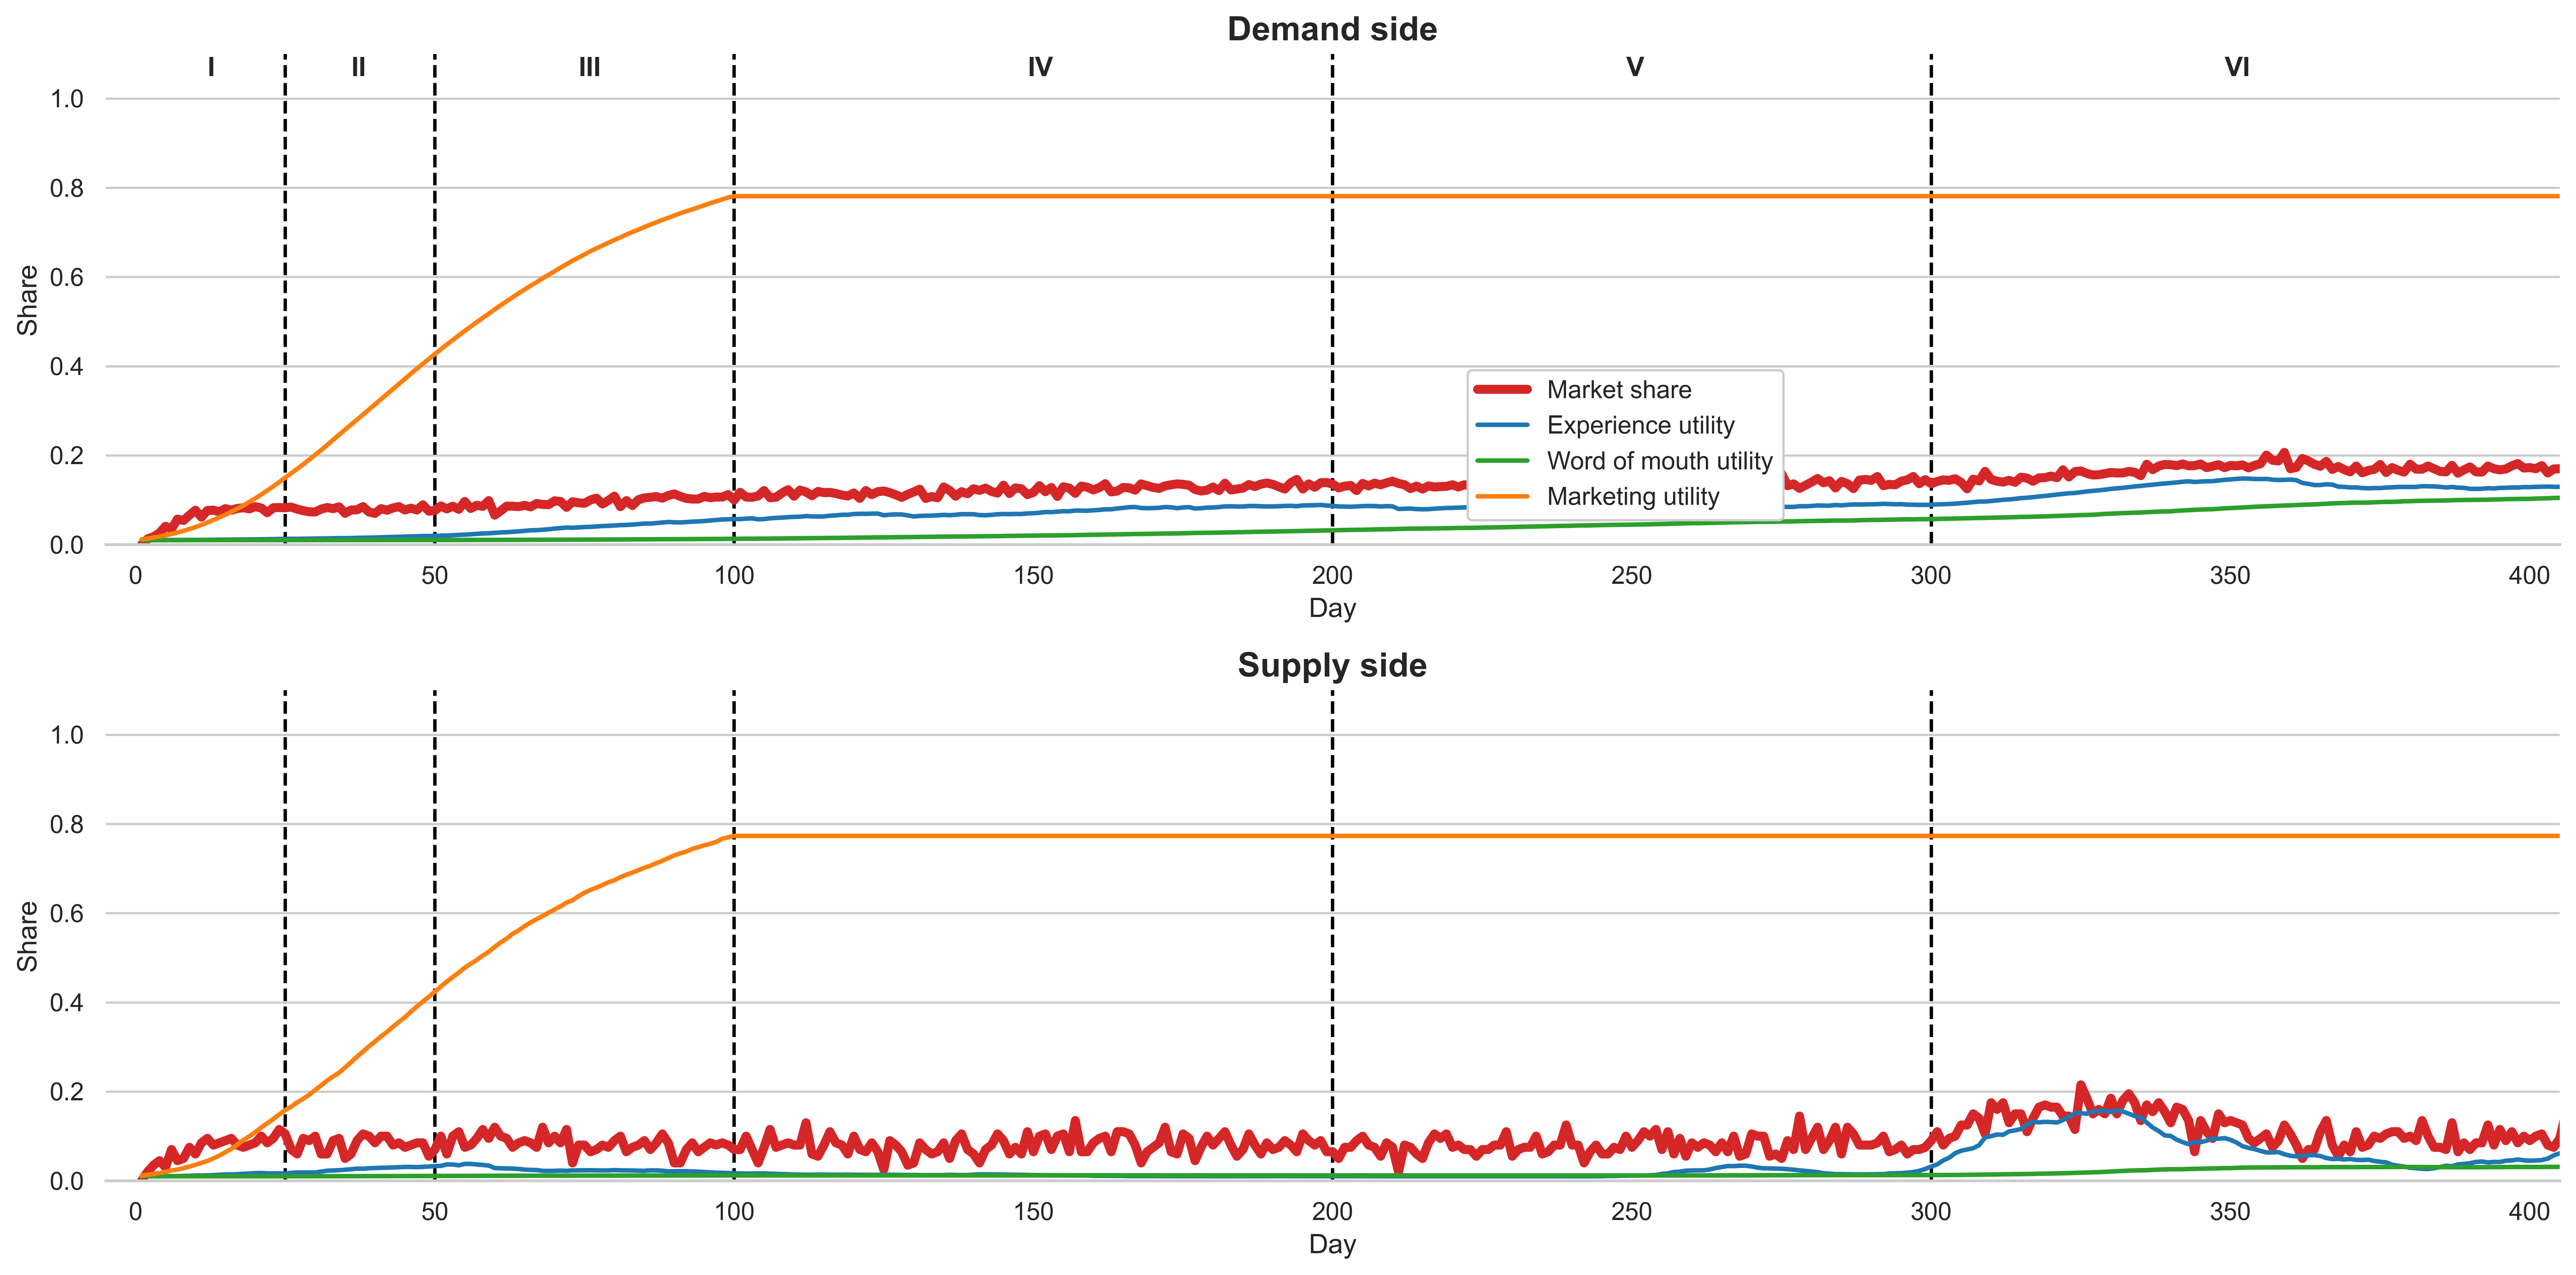

In [11]:
sim0 = sim_rln
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].pax_exp.WOM_U.mean())
            ym.append(sim0.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim0.params.nD):
            yw.append(sim0.res[d].veh_exp.WOM_U.mean())
            ym.append(sim0.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim0.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim0.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

In [18]:
sim = sim_rln

In [19]:
sim.res[100].veh_exp

nRIDES  nREJECTED  nDAYS_WORKED  DRIVING_TIME  IDLE_TIME  PICKUP_DIST  \
veh                                                                          
1       0.0        0.0          13.0           0.0        0.0         0.00   
2       0.0        0.0           8.0           0.0        0.0         0.00   
3       0.0        0.0           6.0           0.0        0.0         0.00   
4       0.0        0.0          10.0           0.0        0.0         0.00   
5       0.0        0.0          10.0           0.0        0.0         0.00   
..      ...        ...           ...           ...        ...          ...   
196     0.0        0.0          11.0           0.0        0.0         0.00   
197     0.0        0.0           5.0           0.0        0.0         0.00   
198    12.0        0.0           8.0       11319.0     9536.0        42.59   
199     0.0        0.0           8.0           0.0        0.0         0.00   
200     0.0        0.0           5.0           0.0        0.0         0.00   

     DRIVING_DIST  REVENUE     COST  COMMISSION  ...  \
veh                                              ...   
1            0.00    0.000   0.0000       0.000  ...   
2            0.00    0.000   0.0000       0.000  ...   
3            0.00    0.000   0.0000       0.000  ...   
4            0.00    0.000   0.0000       0.000  ...   
5            0.00    0.000   0.0000       0.000  ...   
..            ...      ...      ...         ...  ...   
196          0.00    0.000   0.0000       0.000  ...   
197          0.00    0.000   0.0000       0.000  ...   
198        113.19   60.912  28.2975      40.608  ...   
199          0.00    0.000   0.0000       0.000  ...   
200          0.00    0.000   0.0000       0.000  ...   

     IS_REJECTED_BY_TRAVELLER  ARRIVES_AT_PICKUP  MEETS_TRAVELLER_AT_PICKUP  \
veh                                                                           
1                           0                0.0                          0   
2                           0                0.0                          0   
3                           0                0.0                          0   
4                           0                0.0                          0   
5                           0                0.0                          0   
..                        ...                ...                        ...   
196                         0                0.0                          0   
197                         0                0.0                          0   
198                         0             4259.0                          0   
199                         0                0.0                          0   
200                         0                0.0                          0   

     DEPARTS_FROM_PICKUP ARRIVES_AT_DROPOFF  CONTINUES_SHIFT  \
veh                                                            
1                    0.0                0.0                0   
2                    0.0                0.0                0   
3                    0.0                0.0                0   
4                    0.0                0.0                0   
5                    0.0                0.0                0   
..                   ...                ...              ...   
196                  0.0                0.0                0   
197                  0.0                0.0                0   
198                360.0             7060.0                0   
199                  0.0                0.0                0   
200                  0.0                0.0                0   

     STARTS_REPOSITIONING  REPOSITIONED  DECIDES_NOT_TO_DRIVE  ENDS_SHIFT  
veh                                                                        
1                       0             0                     0         0.0  
2                       0             0                     0         0.0  
3                       0             0                     0         0.0  
4                   

In [20]:
df = pd.DataFrame()
np = []
nv = []
rev = []
for d in range(0,sim.params.nD):
    np.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
    nv.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    rev.append(sim.res[d].pax_exp.plat_revenue.sum())

df['nP_share'] = np
df['nV_share'] = nv
df['Platform_rev'] = rev

df.to_csv('csv/baseline_fast_rev_only.csv')

In [22]:
sim.res[100].pax_exp.plat_revenue

pax
0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
         ...   
1995    0.00000
1996    0.00000
1997    0.00000
1998    0.00000
1999    3.35744
Name: plat_revenue, Length: 2000, dtype: float64

In [ ]:
df = pd.read_csv('csv/baseline_fast_h.csv')

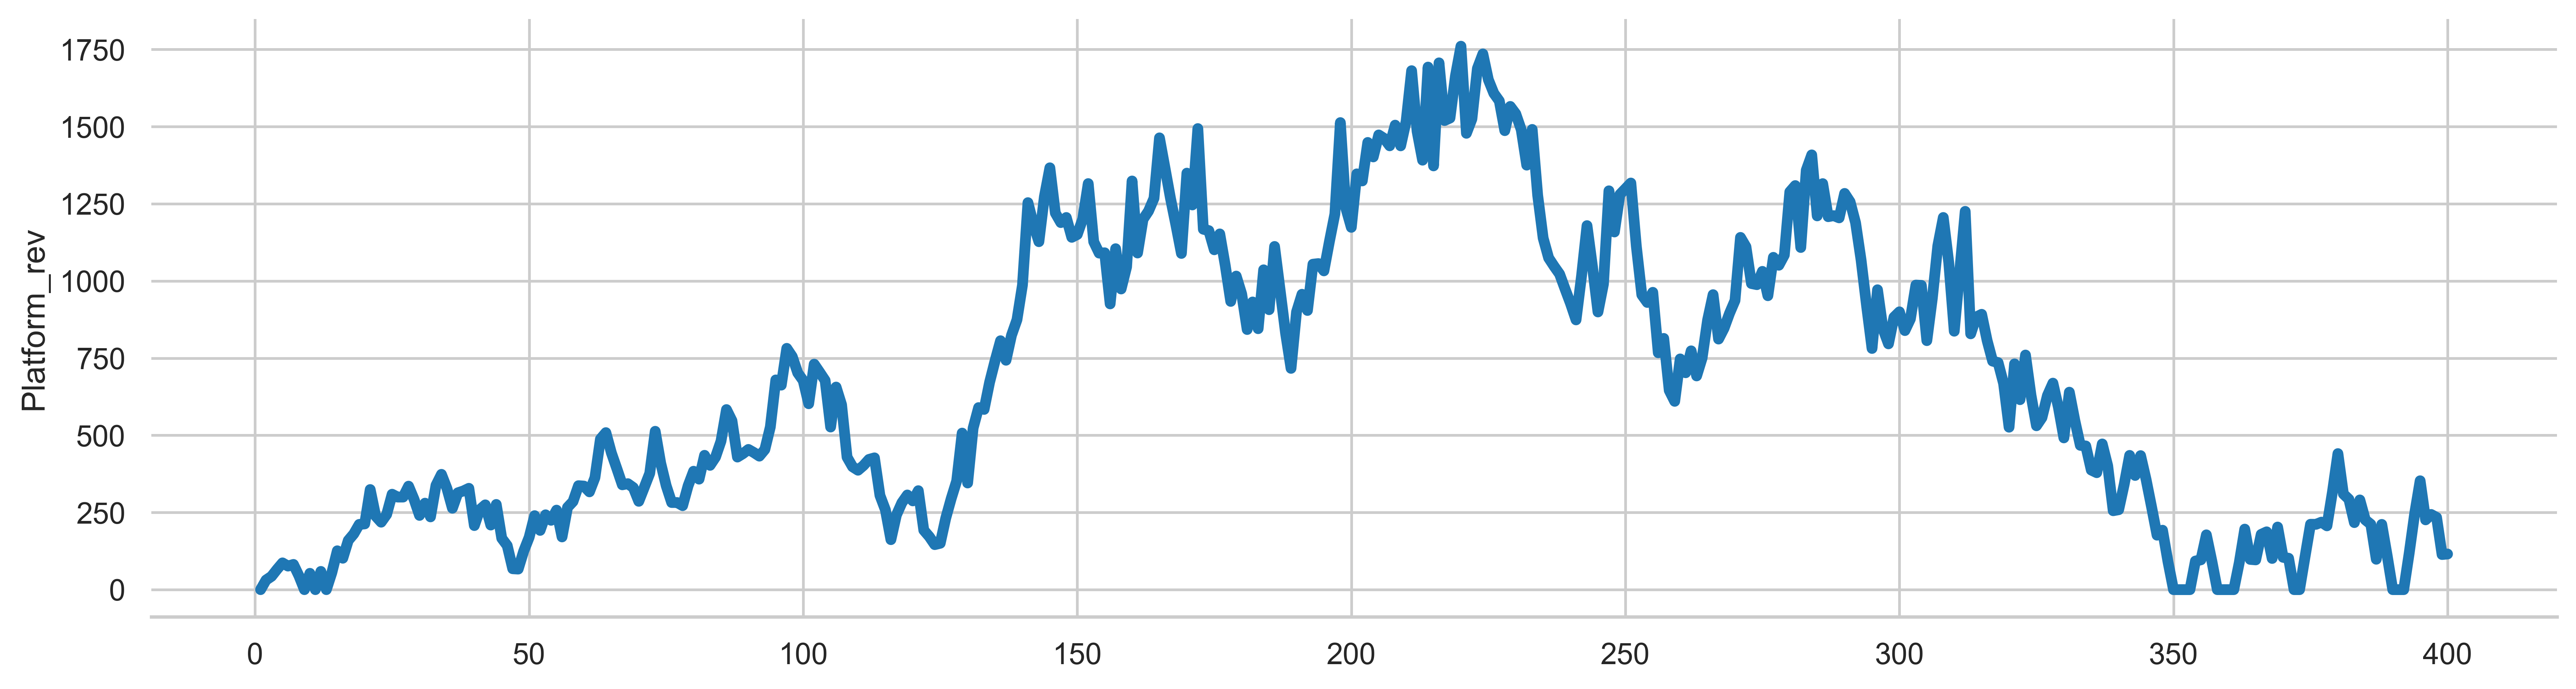

In [23]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev, lw=4)

<AxesSubplot:ylabel='Platform_rev'>

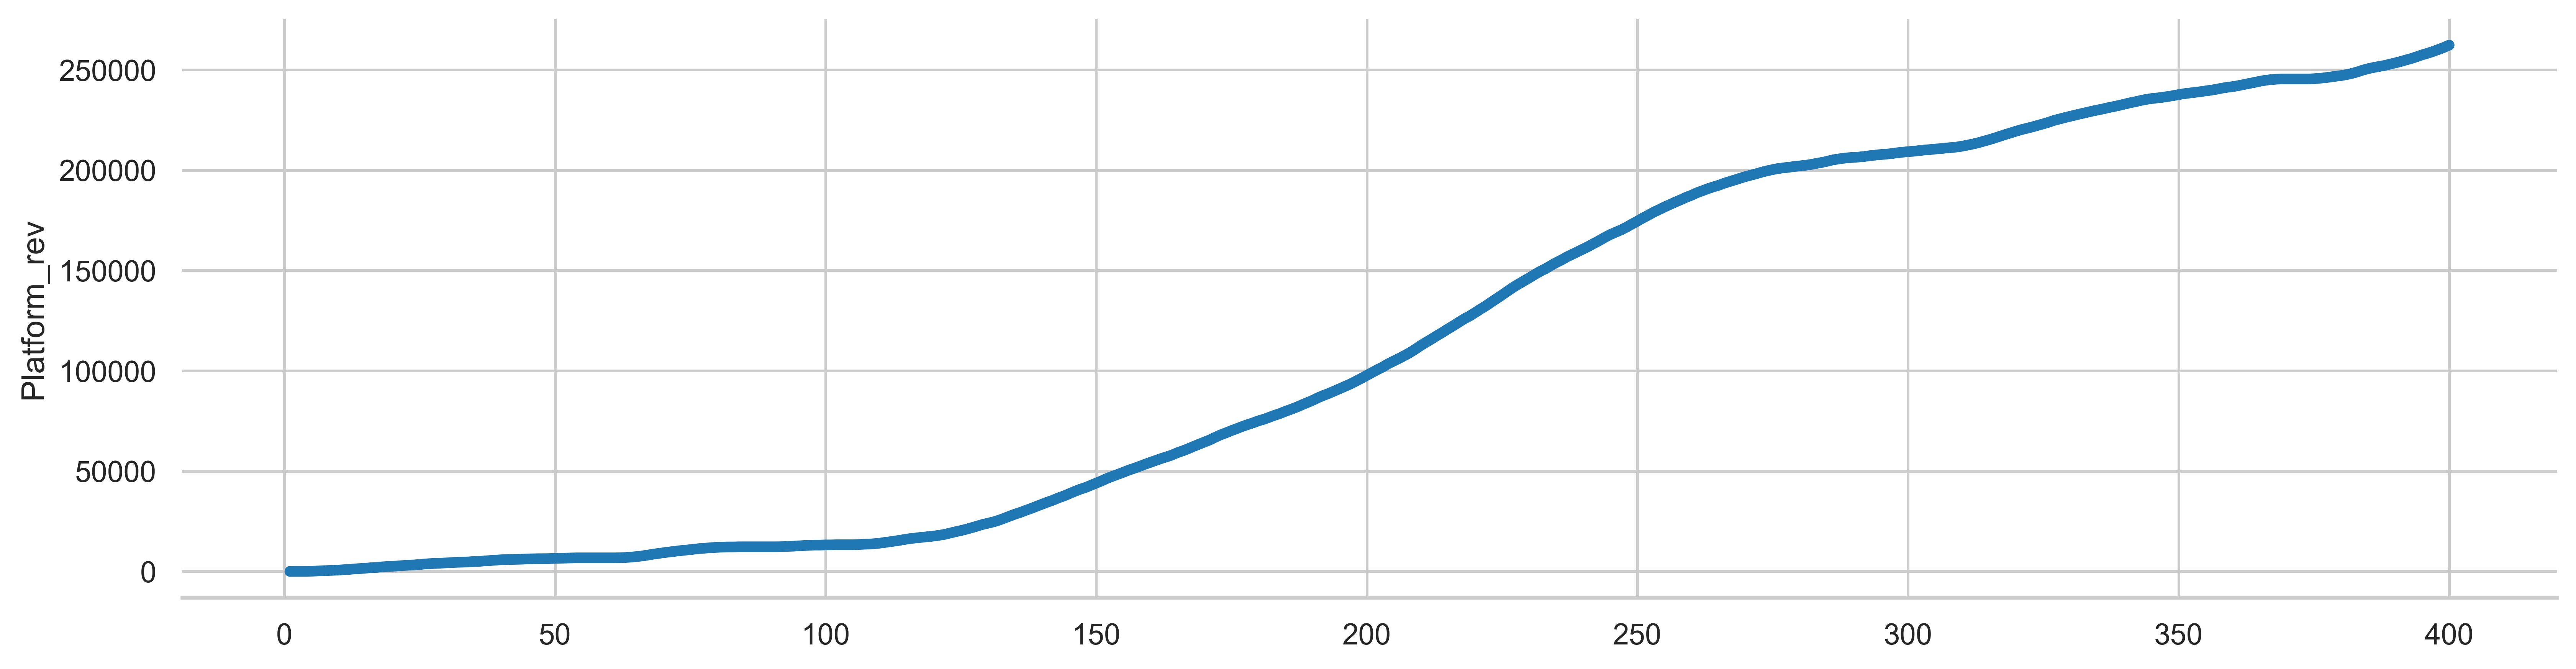

In [22]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=1, figsize=(16,4))
sns.despine(left=True)

sns.lineplot(x=lx,y=df.Platform_rev.cumsum(), lw=4)

In [46]:
sim.platforms.fare[1]

1.2

In [16]:
sim

In [34]:
df = pd.read_csv('csv/baseline_fast_rev_0.5nP_0.5nV.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0070     0.005      15.29592
2             2    0.0155     0.010      23.63168
3             3    0.0250     0.010      20.00924
4             4    0.0400     0.035      59.92720
..          ...       ...       ...           ...
395         395    0.2650     0.200    1031.77092
396         396    0.2720     0.210    1250.62672
397         397    0.2565     0.190    1178.18820
398         398    0.2725     0.115    1081.69752
399         399    0.2735     0.160    1266.17554

[400 rows x 4 columns]

In [20]:
df.Platform_rev.mean()

655.7543860000001

In [9]:
df.Platform_rev.mean()

604.4805835000008

In [10]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2           0.00000
3           0.00000
4          19.35682
           ...     
395    237676.85714
396    238813.95026
397    239708.00418
398    240677.55240
399    241792.23340
Name: Platform_rev, Length: 400, dtype: float64

In [30]:
df.Platform_rev.mean()

582.0985324000001

In [31]:
df.Platform_rev.cumsum()

0           0.00000
1          13.69388
2          44.78640
3          90.17320
4         149.92560
           ...     
395    228671.27896
396    229671.55656
397    230685.35376
398    231702.18296
399    232839.41296
Name: Platform_rev, Length: 400, dtype: float64

In [28]:
df.Platform_rev.mean()

553.2985028000002

In [35]:
df.Platform_rev.cumsum()

0           0.00000
1          15.29592
2          38.92760
3          58.93684
4         118.86404
           ...     
395    216542.71314
396    217793.33986
397    218971.52806
398    220053.22558
399    221319.40112
Name: Platform_rev, Length: 400, dtype: float64

In [26]:
df.Platform_rev.mean()

602.1789189999998

In [33]:
df.Platform_rev.cumsum()

0           0.00000
1           0.00000
2          13.21864
3          53.39316
4          80.25430
           ...     
395    236196.97054
396    237392.87096
397    238450.85096
398    239605.73920
399    240871.56760
Name: Platform_rev, Length: 400, dtype: float64

In [36]:
20/582

0.03436426116838488

In [ ]:
=====================================================================================

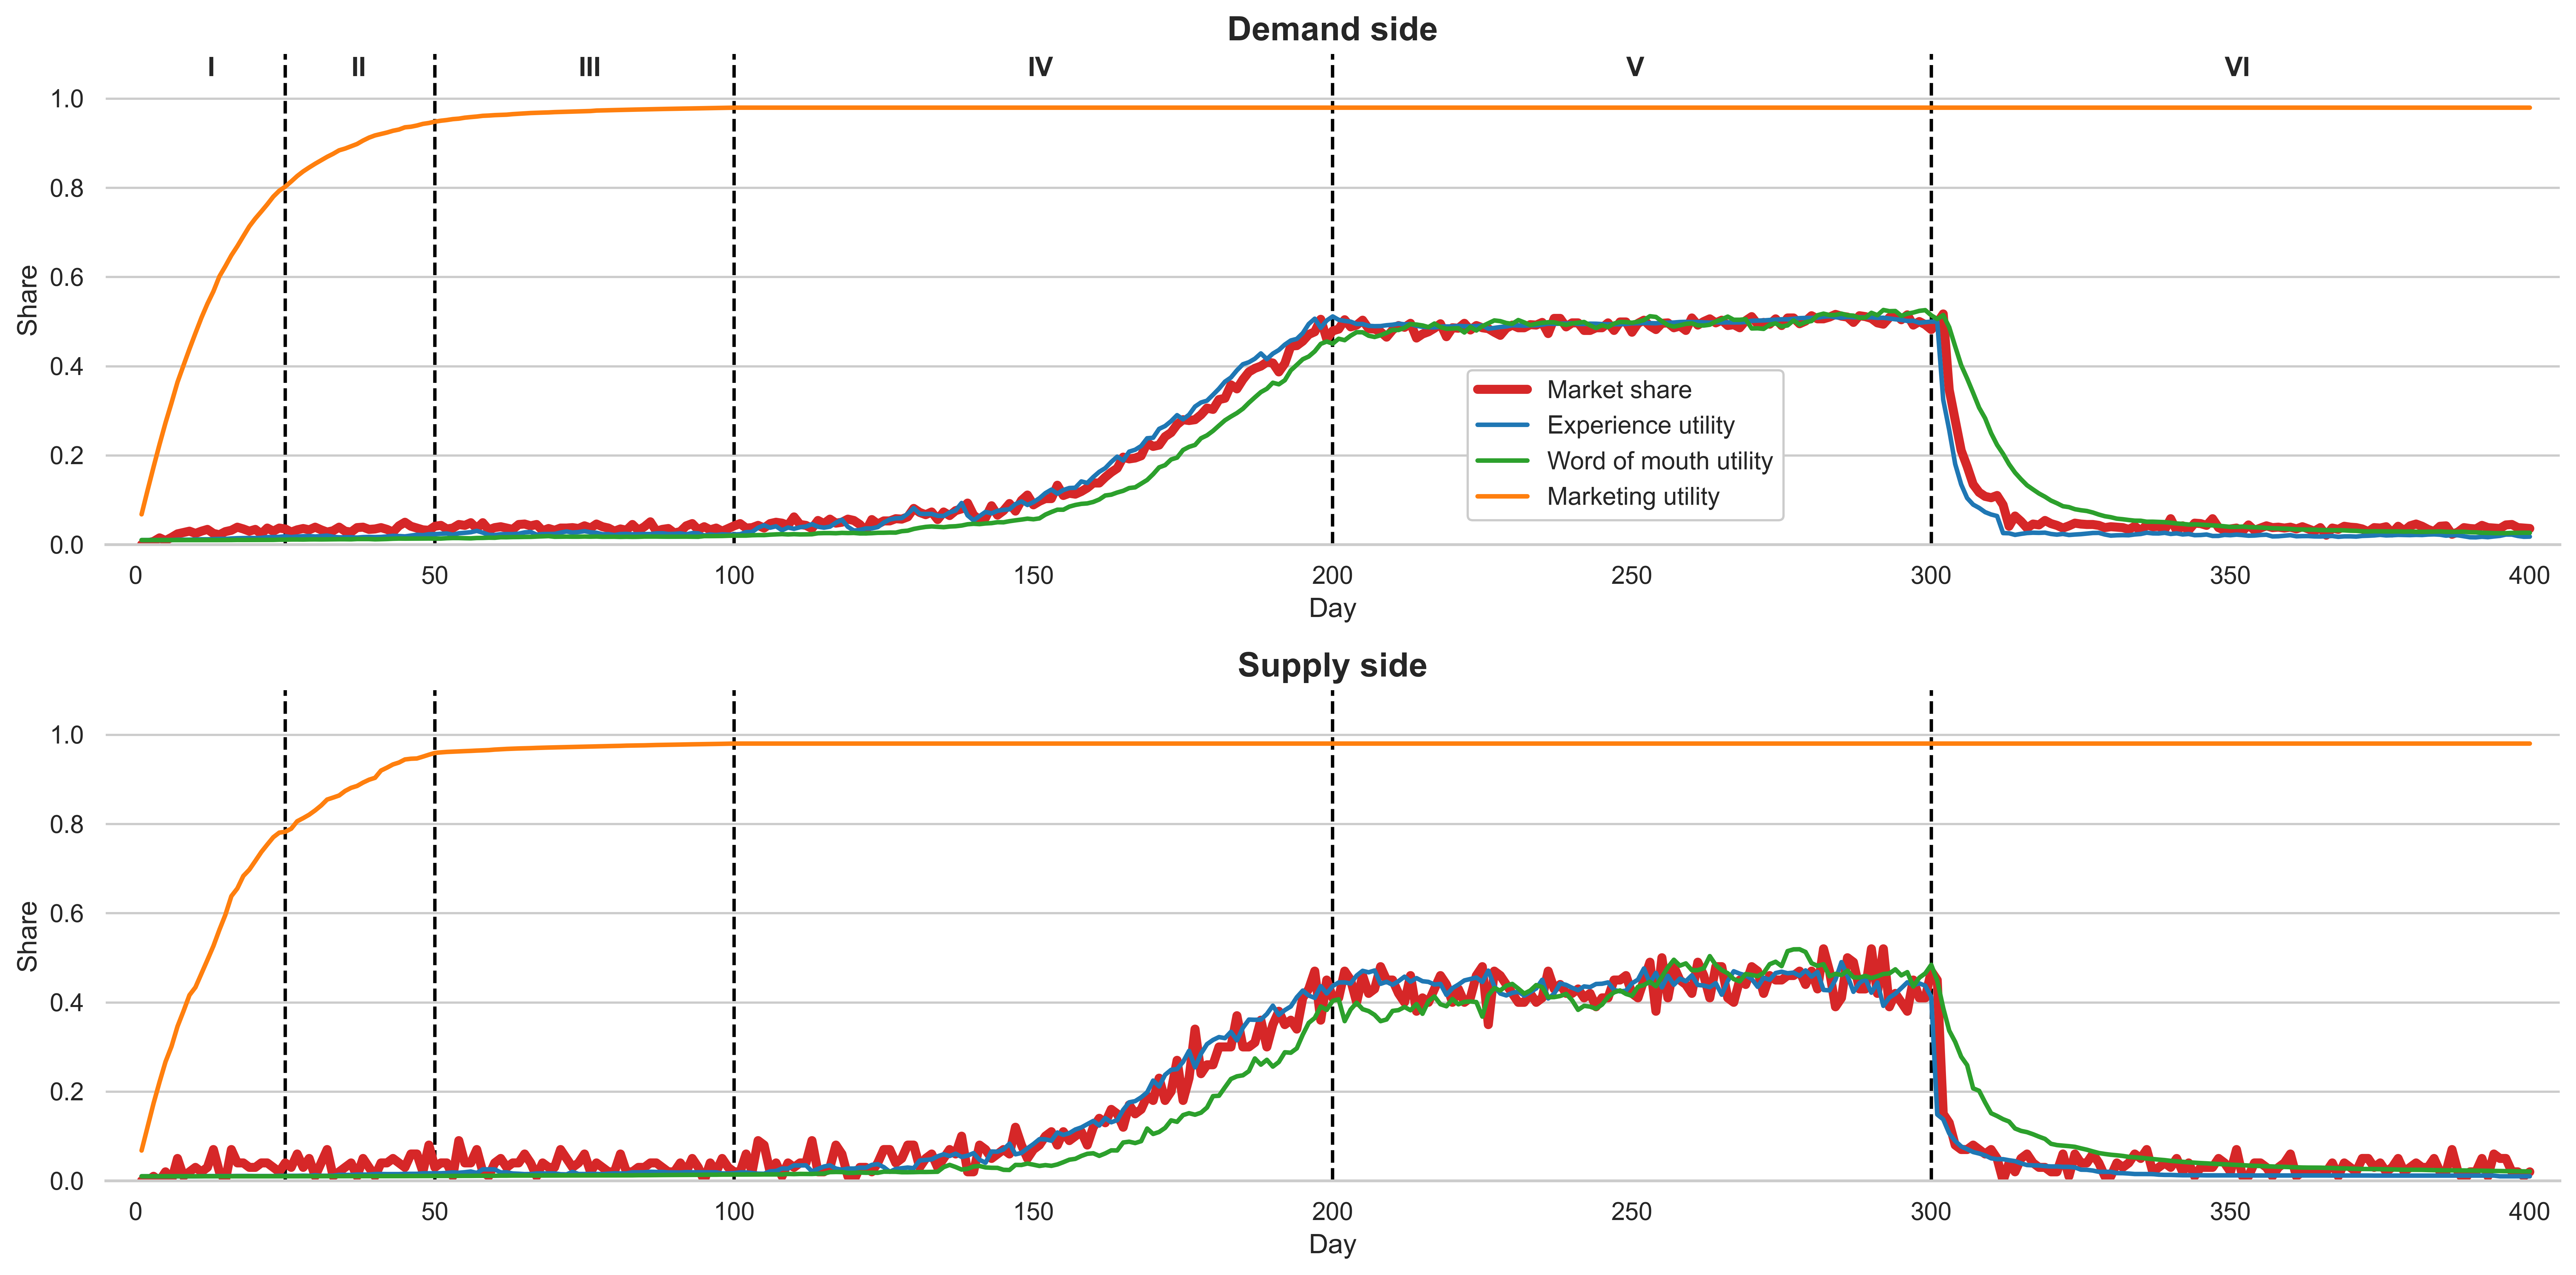

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 5
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

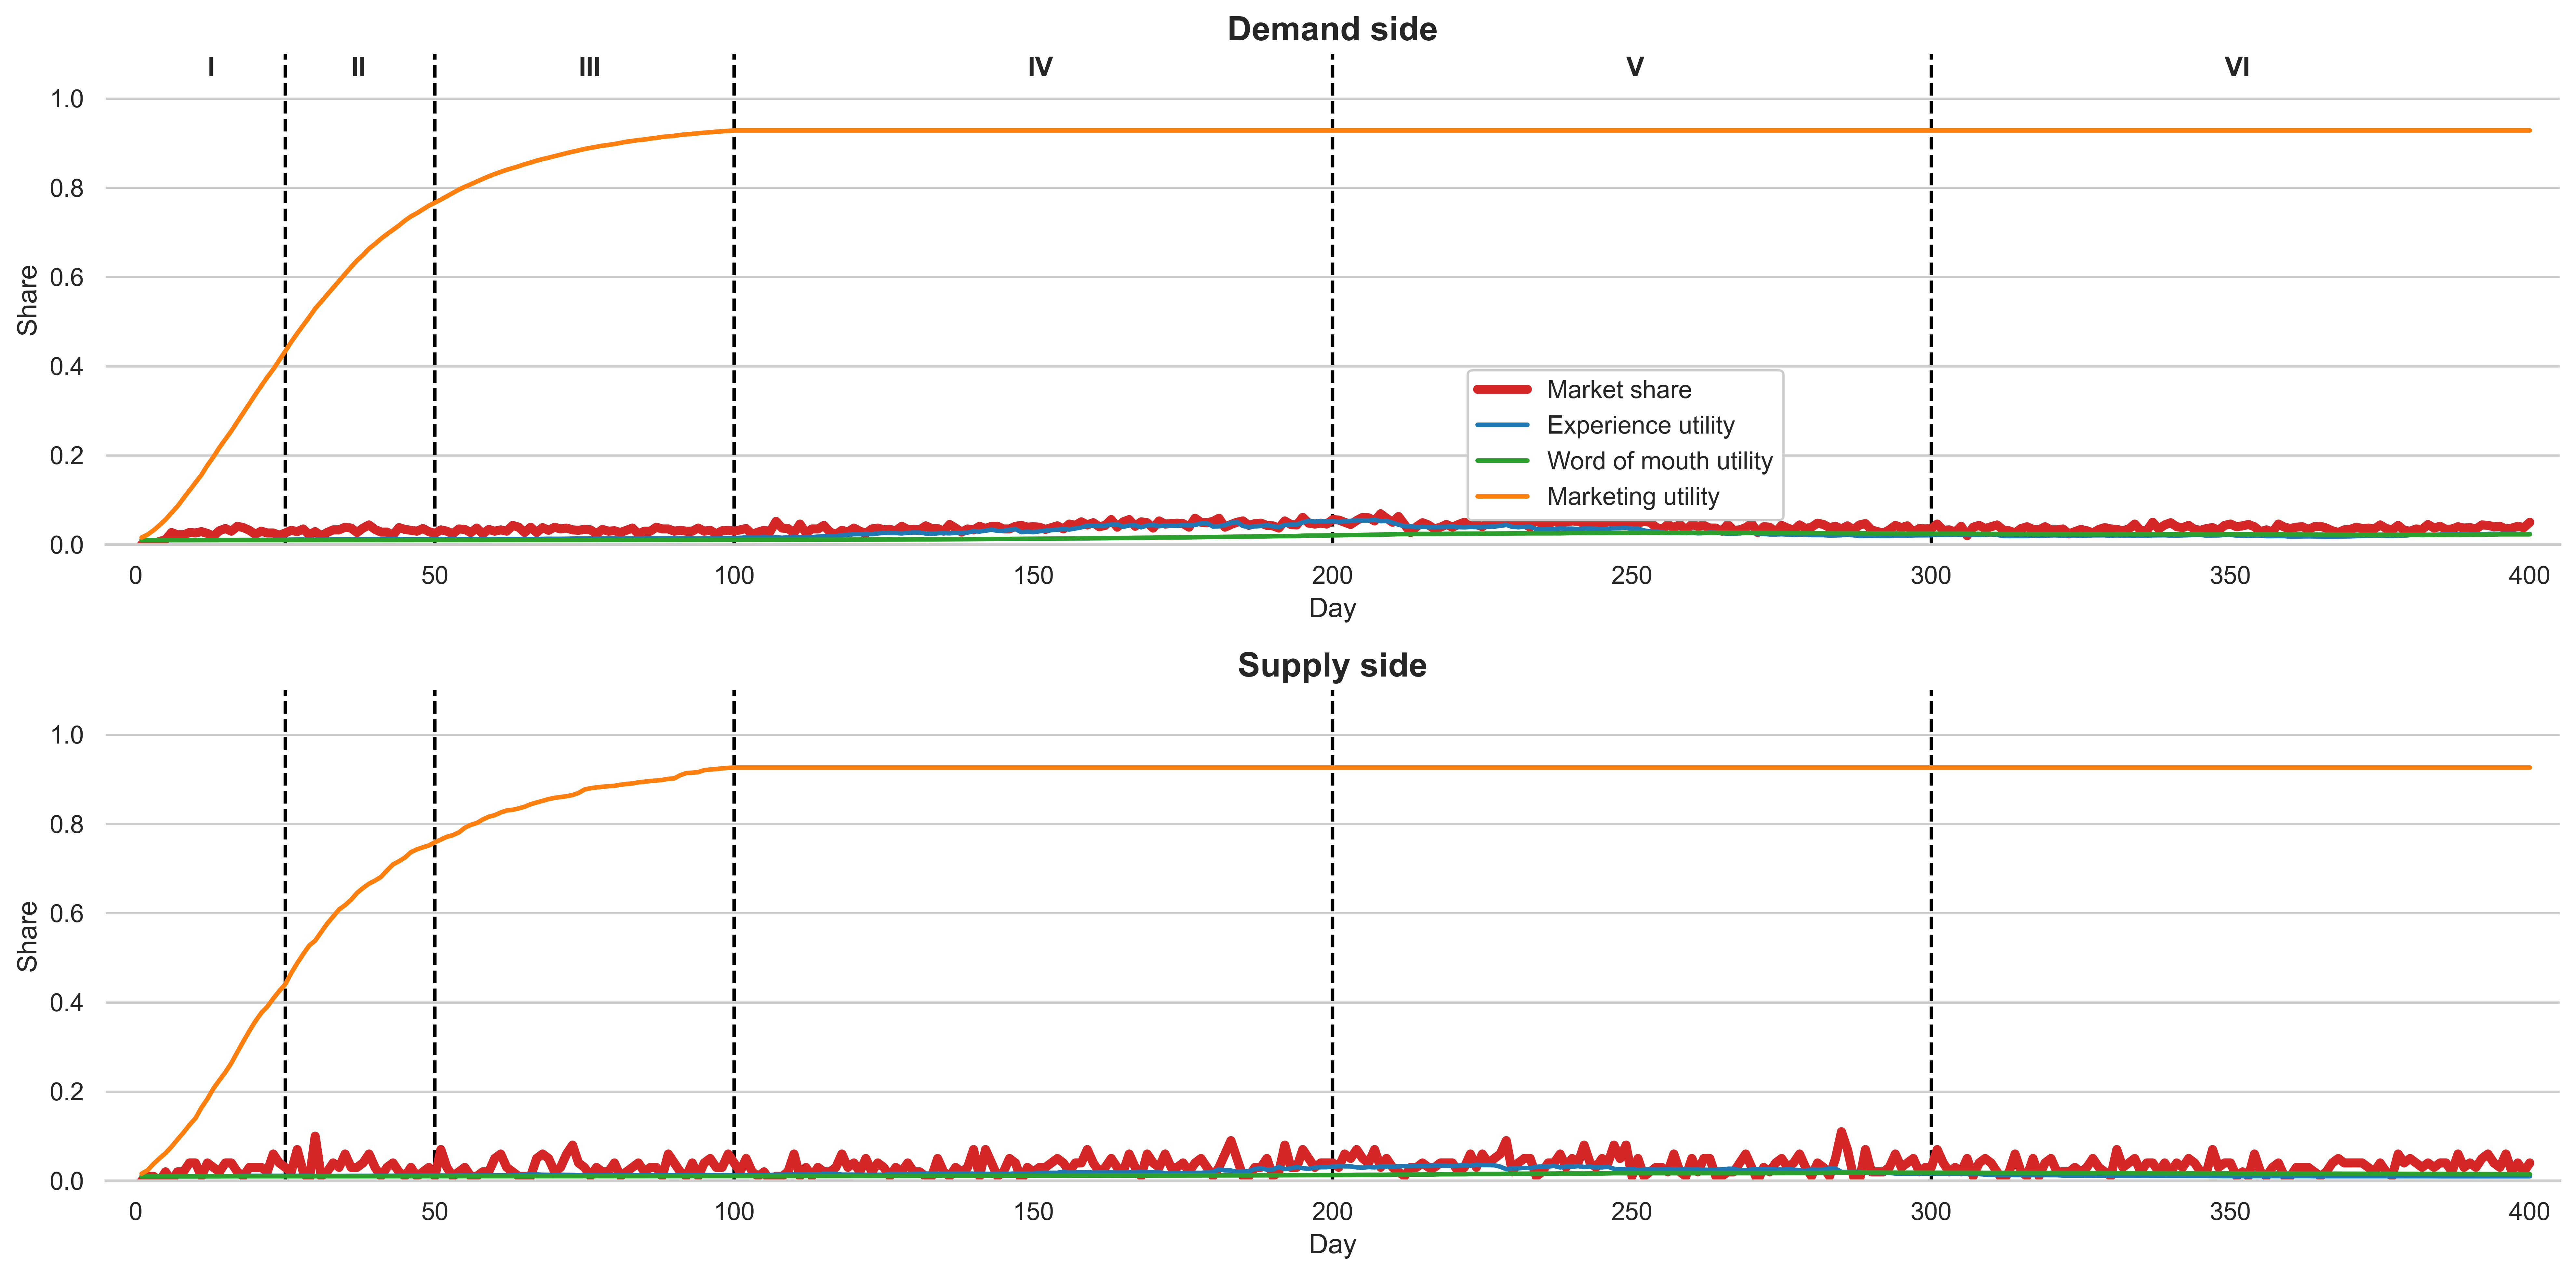

In [7]:
# nV=100, nP=1000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

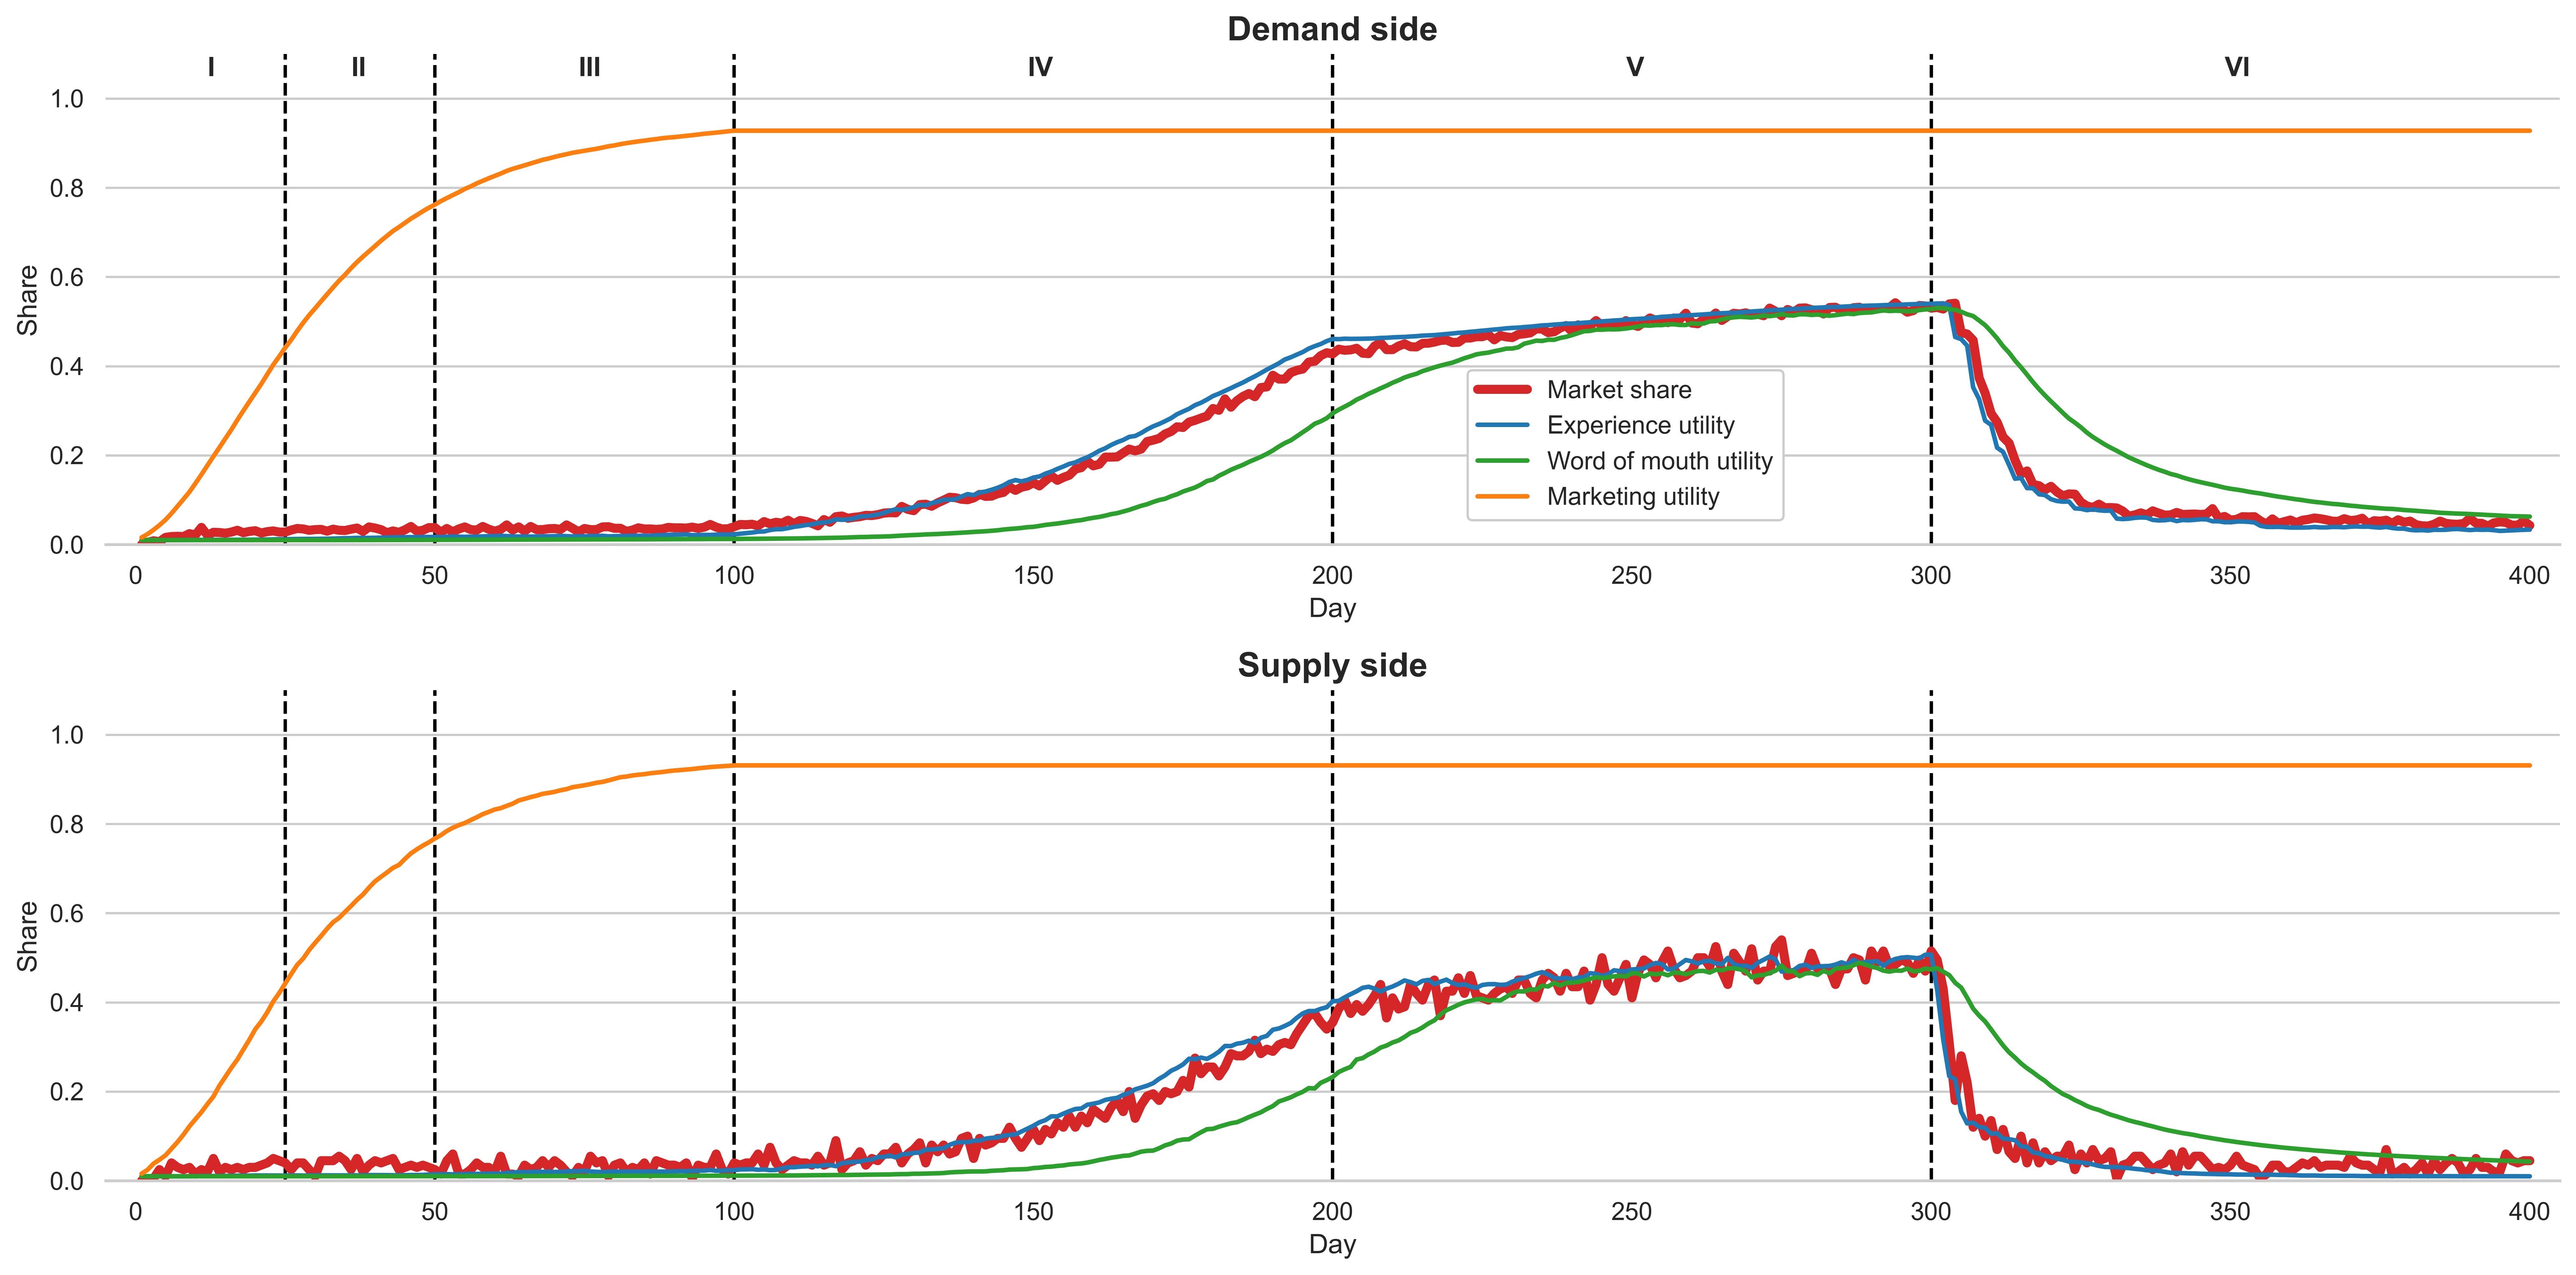

In [7]:
# nV=200, nP=2000, params.d2d.m = 7, and params.d2d.learning_d = 2
# marketing = 1-100, disc= 100-200, coms_0.5=300-400 

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')
fig, ax = plt.subplots(nrows=2, figsize=(16,8))
# plt.subplots_adjust(wspace=0.3, hspace=0.4)
sns.despine(left=True)

for ax_n in [0,1]:
    
    x = []; ye = []; ym = []; yw = []; yms = []
    if ax_n==0:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].pax_exp.WOM_U.mean())
            ym.append(sim.res[d].pax_exp.MARKETING_U.mean())
            ye.append(sim.res[d].pax_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].pax_exp.OUT.value_counts().get(False, 0)/params.nP)
            
    if ax_n==1:
        for d in range(0,sim.params.nD):
            yw.append(sim.res[d].veh_exp.WOM_U.mean())
            ym.append(sim.res[d].veh_exp.MARKETING_U.mean())
            ye.append(sim.res[d].veh_exp.EXPERIENCE_U.mean())
            yms.append(sim.res[d].veh_exp.OUT.value_counts().get(False, 0)/params.nV)
    
    lx = [i for i in range(1,len(ye)+1)]
    sns.lineplot(x=lx, y=yms, label = 'Market share', color='C3', lw=4, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ye, label = 'Experience utility', color='C0', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=yw, label = 'Word of mouth utility', color='C2', lw=2, ax=ax[ax_n])#, marker='o')
    sns.lineplot(x=lx, y=ym, label = 'Marketing utility', color='C1', lw=2, ax=ax[ax_n])#, marker='o')
   
    ax[ax_n].vlines([25, 50, 100, 200, 300], 0, 1.1, linestyles='dashed', colors='black')
    ax[ax_n].grid(axis='x')
    ax[ax_n].set(xlabel='Day', ylabel='Share', ylim=(0,1.1),  xlim=(-5,405))
    
ax[0].set_title('Demand side',fontweight='bold', loc='center',fontsize=15);ax[1].set_title('Supply side',fontweight='bold', loc='center',fontsize=15)
ax[0].legend(frameon=True,framealpha=1, loc=(0.555,0.05))#,  bbox_to_anchor=(0.75, 1.24), ncol=4)
ax[1].get_legend().set_visible(False)
for i in range(0,6):
    value = ['I','II','III','IV','V','VI']
    coords = [(12,1.05),(36,1.05),(74,1.05),(149,1.05),(249,1.05),(349,1.05)]
    ax[0].annotate(value[i], xy =coords[i], fontweight='bold')

# plt.yticks([0,1])

plt.tight_layout()
# plt.savefig('Fig1.png')

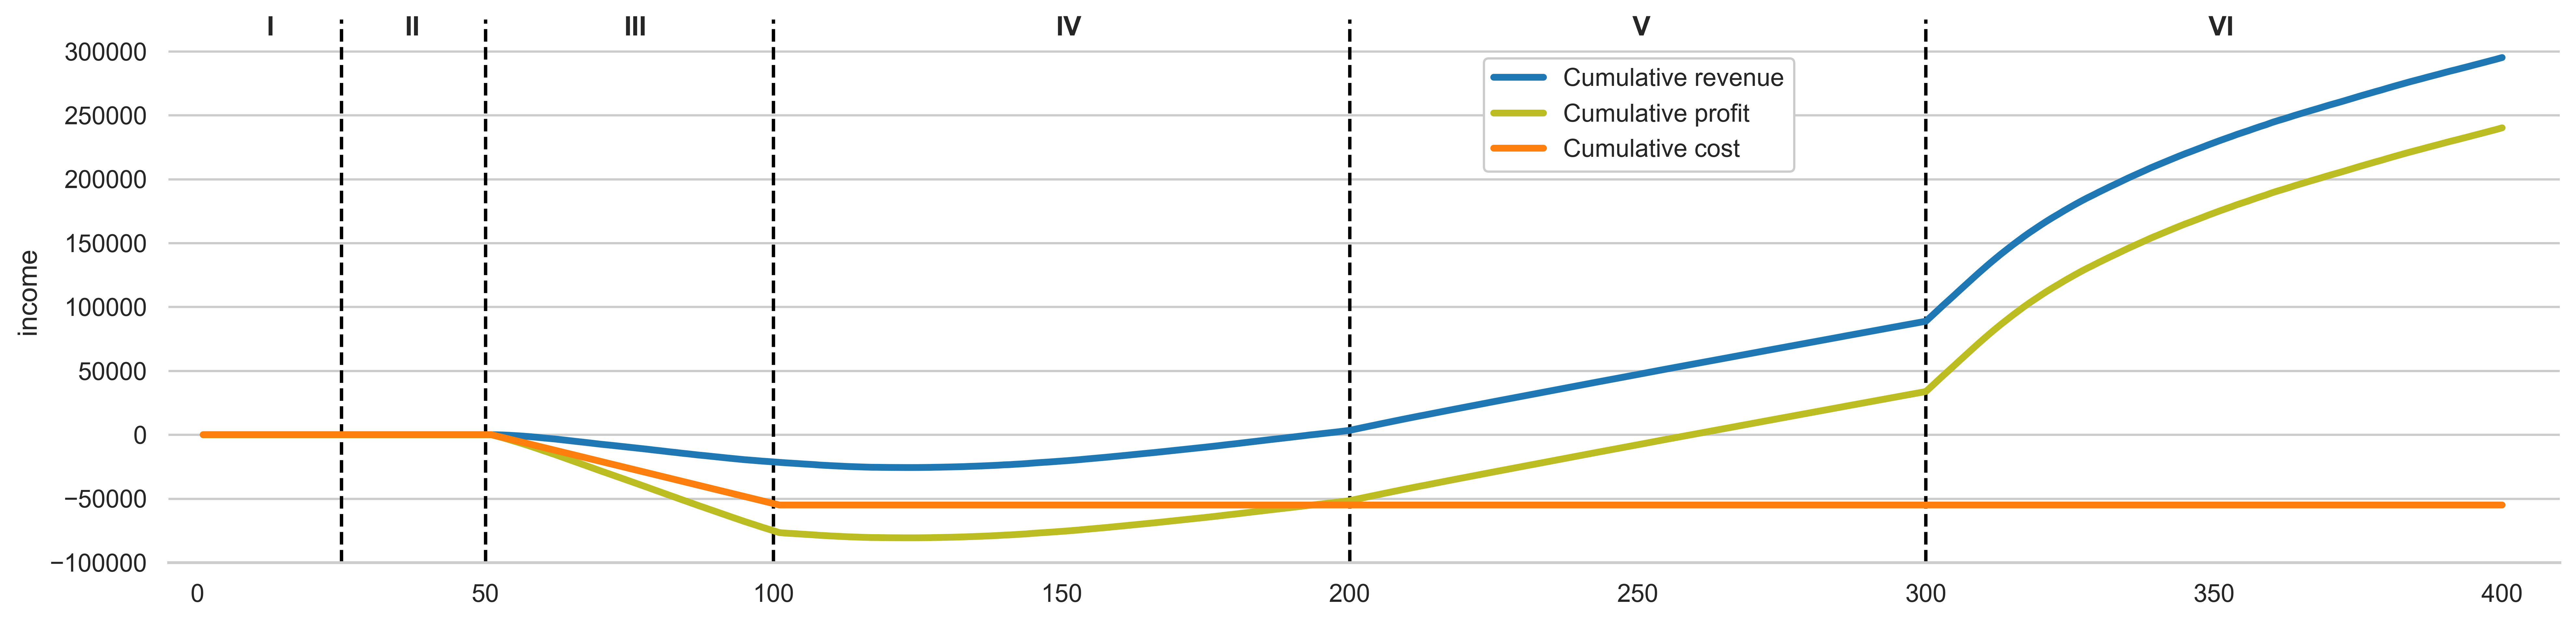

In [177]:
sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1)#, rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'},)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,4))
sns.despine(left=True)

x = []
ypr = []

for d in range(0,sim.params.nD):
    df = sim.res[d].pax_exp
    ypr.append(df[df.OUT==False].plat_profit.sum())
x = [i for i in range(1,len(ypr)+1)]

df = pd.Series(ypr).to_frame()
df.columns = ['income']
marketing_costs = 0.5
df['marketing costs']=df.apply(lambda x: -marketing_costs*2200 if x.name >50 and x.name<=100 else 0, axis = 1).astype(int)
df['profit']=df.income + df['marketing costs']

sns.lineplot(x=x, y=df.income.cumsum(), lw=3, label = 'Cumulative revenue', color='C0')#, marker='o')
sns.lineplot(x=x, y=df.profit.cumsum(), lw=3, label = 'Cumulative profit', color='C8')#, marker='o')
sns.lineplot(x=x, y=df['marketing costs'].astype(int).cumsum(), lw=3, label = 'Cumulative cost', color='C1')#, marker='o')

ax.grid(axis='x')
ax.vlines([25, 50, 100, 200, 300], -100000, 325000, linestyles='dashed', colors='black')
# sns.lineplot(x=x, y=ypr, label = 'plat_profit')#, marker='o')
sns.despine(left=True)
ax.set(xlim=(-5,410), ylim=(-100000,325000))
ax.legend(framealpha=1, loc=(0.55,0.72))

value = ['I','II','III','IV','V','VI']
for i in range(0,6):
    coords = [(12,312500),(36,312500),(74,312500),(149,312500),(249,312500),(349,312500)]
    ax.annotate(value[i], xy =coords[i], fontweight='bold')

plt.tight_layout()
# plt.savefig('Fig5.png')

In [21]:
df = pd.read_csv('csv/baseline_fast.csv')
df

Unnamed: 0  nP_share  nV_share  Platform_rev
0             0    0.0000     0.000       0.00000
1             1    0.0120     0.005      21.47460
2             2    0.0220     0.015      34.04332
3             3    0.0300     0.025      42.06120
4             4    0.0325     0.015      49.05952
..          ...       ...       ...           ...
395         395    0.1665     0.115    1123.47240
396         396    0.1555     0.080    1085.47640
397         397    0.1495     0.105     993.22100
398         398    0.1590     0.060    1099.28520
399         399    0.1540     0.090    1055.16860

[400 rows x 4 columns]

In [22]:
df.Platform_rev.max()

4098.8442

In [ ]:
2638.8502